# 음주 여부에 따라 건강검진 수치 차이가 있을까?

# 키와 허리둘레의 크기는 체중과 상관관계가 있을까?

# 라이브러리 호출

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 한글폰트 설정

In [2]:
# mac 한글폰트
plt.rc('font', family='AppleGothic')
# 마이너스 폰트 깨지는 경우
plt.rc('axes', unicode_minus=False)
# 선명한 폰트를 위해
%config InlineBackend.figure_format = 'retina'

# 데이터 불러오기

In [3]:
# 다운로드 받은 파일을 read_csv()로 읽기 
# 파일을 읽고, shape을 확인
# encoding='cp949' -> 한글 인코딩 방식
df = pd.read_csv('data/건강검진정보.csv', encoding='cp949')
df.shape

(1000000, 34)

## 데이터 미리보기

In [4]:
df.head(1)

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  시력(좌)  \
0  2017        1     1            8    43        170         75  90.0    1.0   

   시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  치아마모증유무  \
0    1.0  ...   40.0   1.0     Y         Y      NaN    NaN      NaN   

   제3대구치(사랑니)이상  치석     데이터공개일자  
0           NaN   Y  2018-11-26  

[1 rows x 34 columns]

In [5]:
df.tail()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  \
999995  2017   999996     1           10    48        175         80  92.1   
999996  2017   999997     1            8    41        170         75  86.0   
999997  2017   999998     2            9    26        155         50  68.0   
999998  2017   999999     1            6    29        175         60  72.0   
999999  2017  1000000     1           11    41        160         70  90.5   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
999995    1.5    1.5  ...   27.0   1.0     N         N      NaN    NaN   
999996    1.0    1.5  ...   15.0   1.0     N         N      NaN    NaN   
999997    1.0    0.7  ...   17.0   3.0     Y         N      NaN    NaN   
999998    1.5    1.0  ...   17.0   1.0     N         N      NaN    NaN   
999999    1.0    1.5  ...   36.0   3.0     Y         N      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석     데이터공개일자  
999995      NaN           NaN  NaN  2018-11-26  
999996      NaN           NaN  NaN  2018-11-26  
999997      NaN           NaN  NaN  2018-11-26  
999998      NaN           NaN  NaN  2018-11-26  
999999      NaN           NaN  NaN  2018-11-26  

[5 rows x 34 columns]

In [6]:
df.sample()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  \
699616  2017   699617     2            8    46        160         55  76.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
699616    0.8    0.9  ...   17.0   1.0     N         N      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석     데이터공개일자  
699616      NaN           NaN  NaN  2018-11-26  

[1 rows x 34 columns]

# 기본정보 확인

In [7]:
# info()는 데이터의 크기, 형식, 메모리 사용량을 알 수 있다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [8]:
# 컬럼만 따로 출력
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [9]:
# dtypes를 통해 데이터형식 출력
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)         int64
체중(5Kg단위)         int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부             object
구강검진수검여부         object
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석               object
데이터공개일자          object
dtype: object

# 결측치 보기

In [10]:
True + True + False

2

In [11]:
# isnull을 통해 bool 값으로 표시하고, sum을 하면 컬럼마다 결측치의 수를 확인
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               621422
데이터공개일자               0
dtype: int64

In [12]:
# isna로 결측치 여부를 확인하고, sum()을 통해 결측치 수 집계가 가능
df.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               621422
데이터공개일자               0
dtype: int64

<AxesSubplot: >

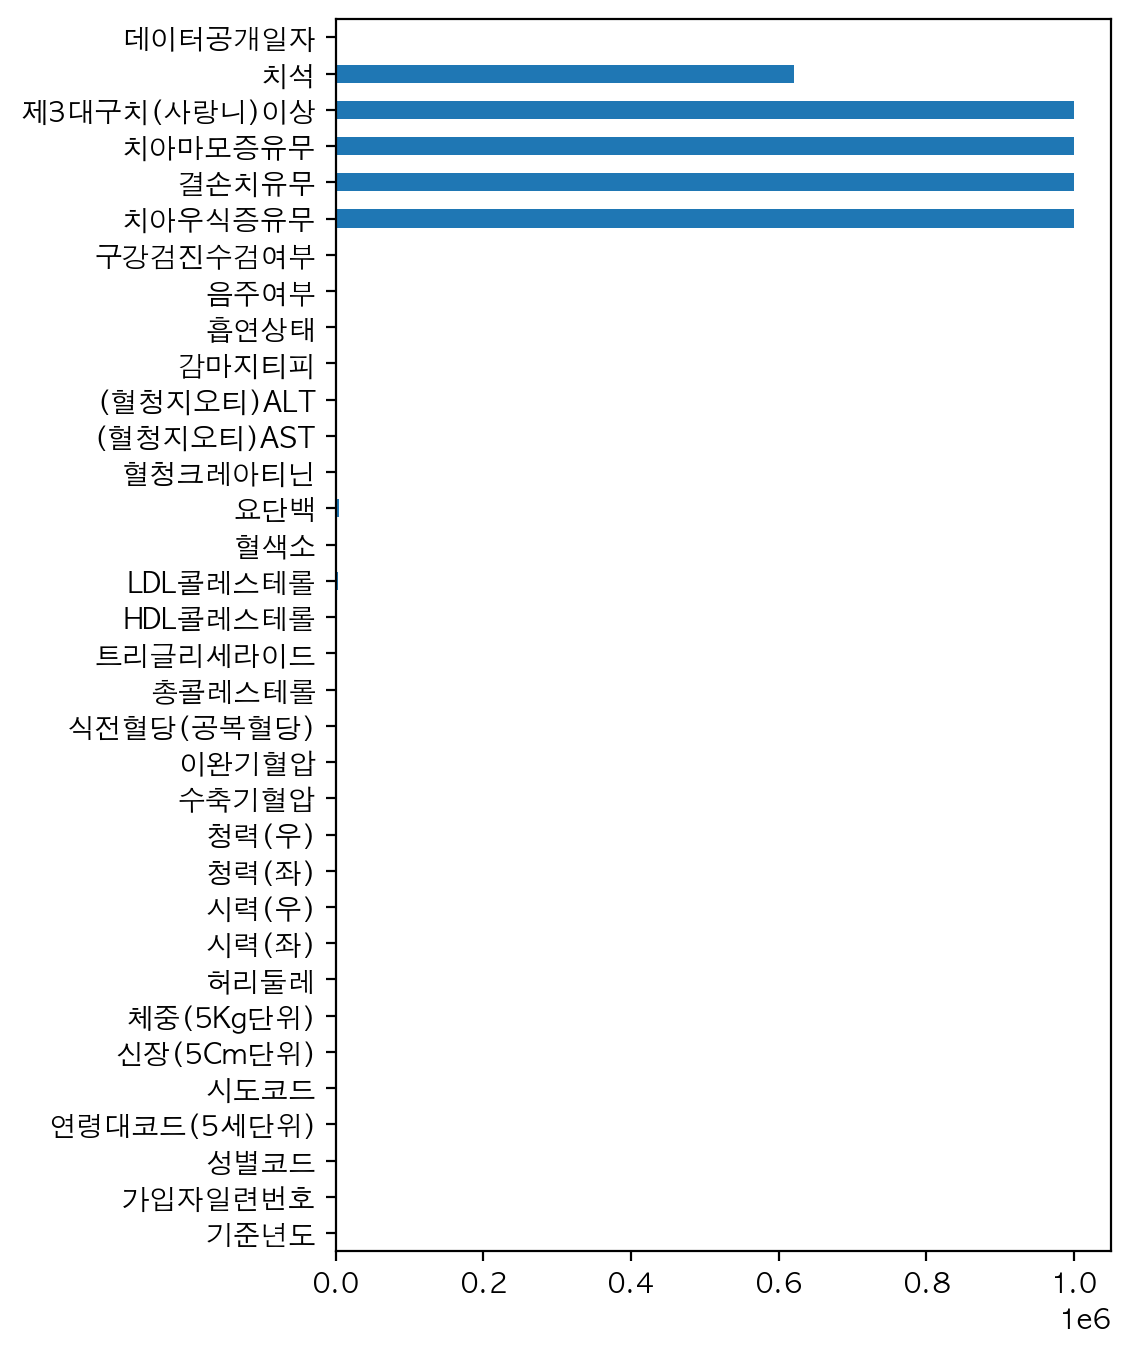

In [13]:
# pandas plot()
df.isnull().sum().plot.barh(figsize=(5,8))

# 일부데이터 요약

In [14]:
# 여러 컬럼을 가져와서
# '(혈청지오티)AST', '(혈청지오티)ALT'를 가져와서 미리보기
print(type(df[['(혈청지오티)ALT', '(혈청지오티)AST']]))
df[['(혈청지오티)ALT', '(혈청지오티)AST']].head()

<class 'pandas.core.frame.DataFrame'>


(혈청지오티)ALT  (혈청지오티)AST
0        35.0        21.0
1        36.0        20.0
2        32.0        47.0
3        34.0        29.0
4        12.0        19.0

In [15]:
df[['(혈청지오티)ALT', '(혈청지오티)AST']].describe()

(혈청지오티)ALT     (혈청지오티)AST
count  999958.000000  999959.000000
mean       25.749509      25.994671
std        26.294770      23.587469
min         1.000000       1.000000
25%        15.000000      19.000000
50%        20.000000      23.000000
75%        29.000000      28.000000
max      7210.000000    9999.000000

# value_counts()

In [16]:
# value_counts()로 성별코드를 그룹화하고 집계하기
df['성별코드'].value_counts()

1    530410
2    469590
Name: 성별코드, dtype: int64

In [17]:
# value_counts()로 흡연상태를 그룹화하고 집계하기
df['흡연상태'].value_counts()

1.0    607942
3.0    215702
2.0    176212
Name: 흡연상태, dtype: int64

# group by 와 pivot_table


## group by

In [18]:
# group by를 통해 데이터를 그룹화
# 성별코드로 그룹화한 데이터를 세어보기
df.groupby(['성별코드'])['가입자일련번호'].count()

성별코드
1    530410
2    469590
Name: 가입자일련번호, dtype: int64

In [19]:
# 성별코드와 음주여부로 그룹화를 하고 개수를 파악
df.groupby(['성별코드', '음주여부'])['가입자일련번호'].count()

성별코드  음주여부
1     N       173612
      Y       356587
2     N       326827
      Y       142438
Name: 가입자일련번호, dtype: int64

In [20]:
df.groupby(['성별코드', '흡연상태'])['가입자일련번호'].count()

성별코드  흡연상태
1     1.0     165904
      2.0     165186
      3.0     199277
2     1.0     442038
      2.0      11026
      3.0      16425
Name: 가입자일련번호, dtype: int64

In [21]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피(간수치관련)의 평균
df.groupby(['성별코드', '음주여부'])['감마지티피'].mean()

성별코드  음주여부
1     N       34.739868
      Y       56.610981
2     N       22.612408
      Y       25.001018
Name: 감마지티피, dtype: float64

In [22]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피(간수치관련)의 요약수치
df.groupby(['성별코드', '음주여부'])['감마지티피'].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    N     173604.0  34.739868  37.606197  1.0  18.0  25.0  38.0  999.0
     Y     356576.0  56.610981  68.851128  1.0  24.0  37.0  63.0  999.0
2    N     326813.0  22.612408  25.203579  1.0  13.0  17.0  24.0  999.0
     Y     142429.0  25.001018  36.725100  1.0  13.0  17.0  25.0  999.0

In [23]:
# agg 는 여러 수치를 함께 구할 수 있다.
# 성별코드와 음주여부로 그룹화를 하고 감마지티피(간수치관련)의 평균
df.groupby(['성별코드', '음주여부'])['감마지티피'].agg(['count','mean','median'])

count       mean  median
성별코드 음주여부                           
1    N     173604  34.739868    25.0
     Y     356576  56.610981    37.0
2    N     326813  22.612408    17.0
     Y     142429  25.001018    17.0

## pivot_table

In [24]:
# 음주여부에 따른 그룹화된 수를 피봇테이블로 구하기
df.pivot_table(index='음주여부', values='가입자일련번호', aggfunc='count')

가입자일련번호
음주여부         
N      500439
Y      499025

In [25]:
# 음주여부에 따른 감마지티피의 평균
df.pivot_table(index='음주여부', values='감마지티피', aggfunc='mean')

감마지티피
음주여부           
N     26.819650
Y     47.588675

In [26]:
# aggfunc=''의 기본값은 mean이지만 지정해줄 수 있다.
df.pivot_table(index='음주여부', values='감마지티피', aggfunc=['mean', 'median'])

mean median
          감마지티피  감마지티피
음주여부                  
N     26.819650   19.0
Y     47.588675   30.0

In [27]:
# aggfunc에 describe를 사용해 통계량을 요약할 수 있다.
#df.pivot_table(index='음주여부', values='감마지티피', aggfunc='describe')
df.pivot_table(index=['성별코드','음주여부'], values='감마지티피', aggfunc='describe')

25%   50%   75%     count    max       mean  min        std
성별코드 음주여부                                                              
1    N     18.0  25.0  38.0  173604.0  999.0  34.739868  1.0  37.606197
     Y     24.0  37.0  63.0  356576.0  999.0  56.610981  1.0  68.851128
2    N     13.0  17.0  24.0  326813.0  999.0  22.612408  1.0  25.203579
     Y     13.0  17.0  25.0  142429.0  999.0  25.001018  1.0  36.725100

# 전체 데이터 시각화
* 100만개가 넘는 데이터를 시각화 할때, 가급적 groupby 혹은 pivot_table로 연산을 하고 시각화하는 것이 좋다.
* seaborn 그래프는 내부에서 수학적 연산이 되기 때문에 데이터가 많으면 시간이 오래걸린다.

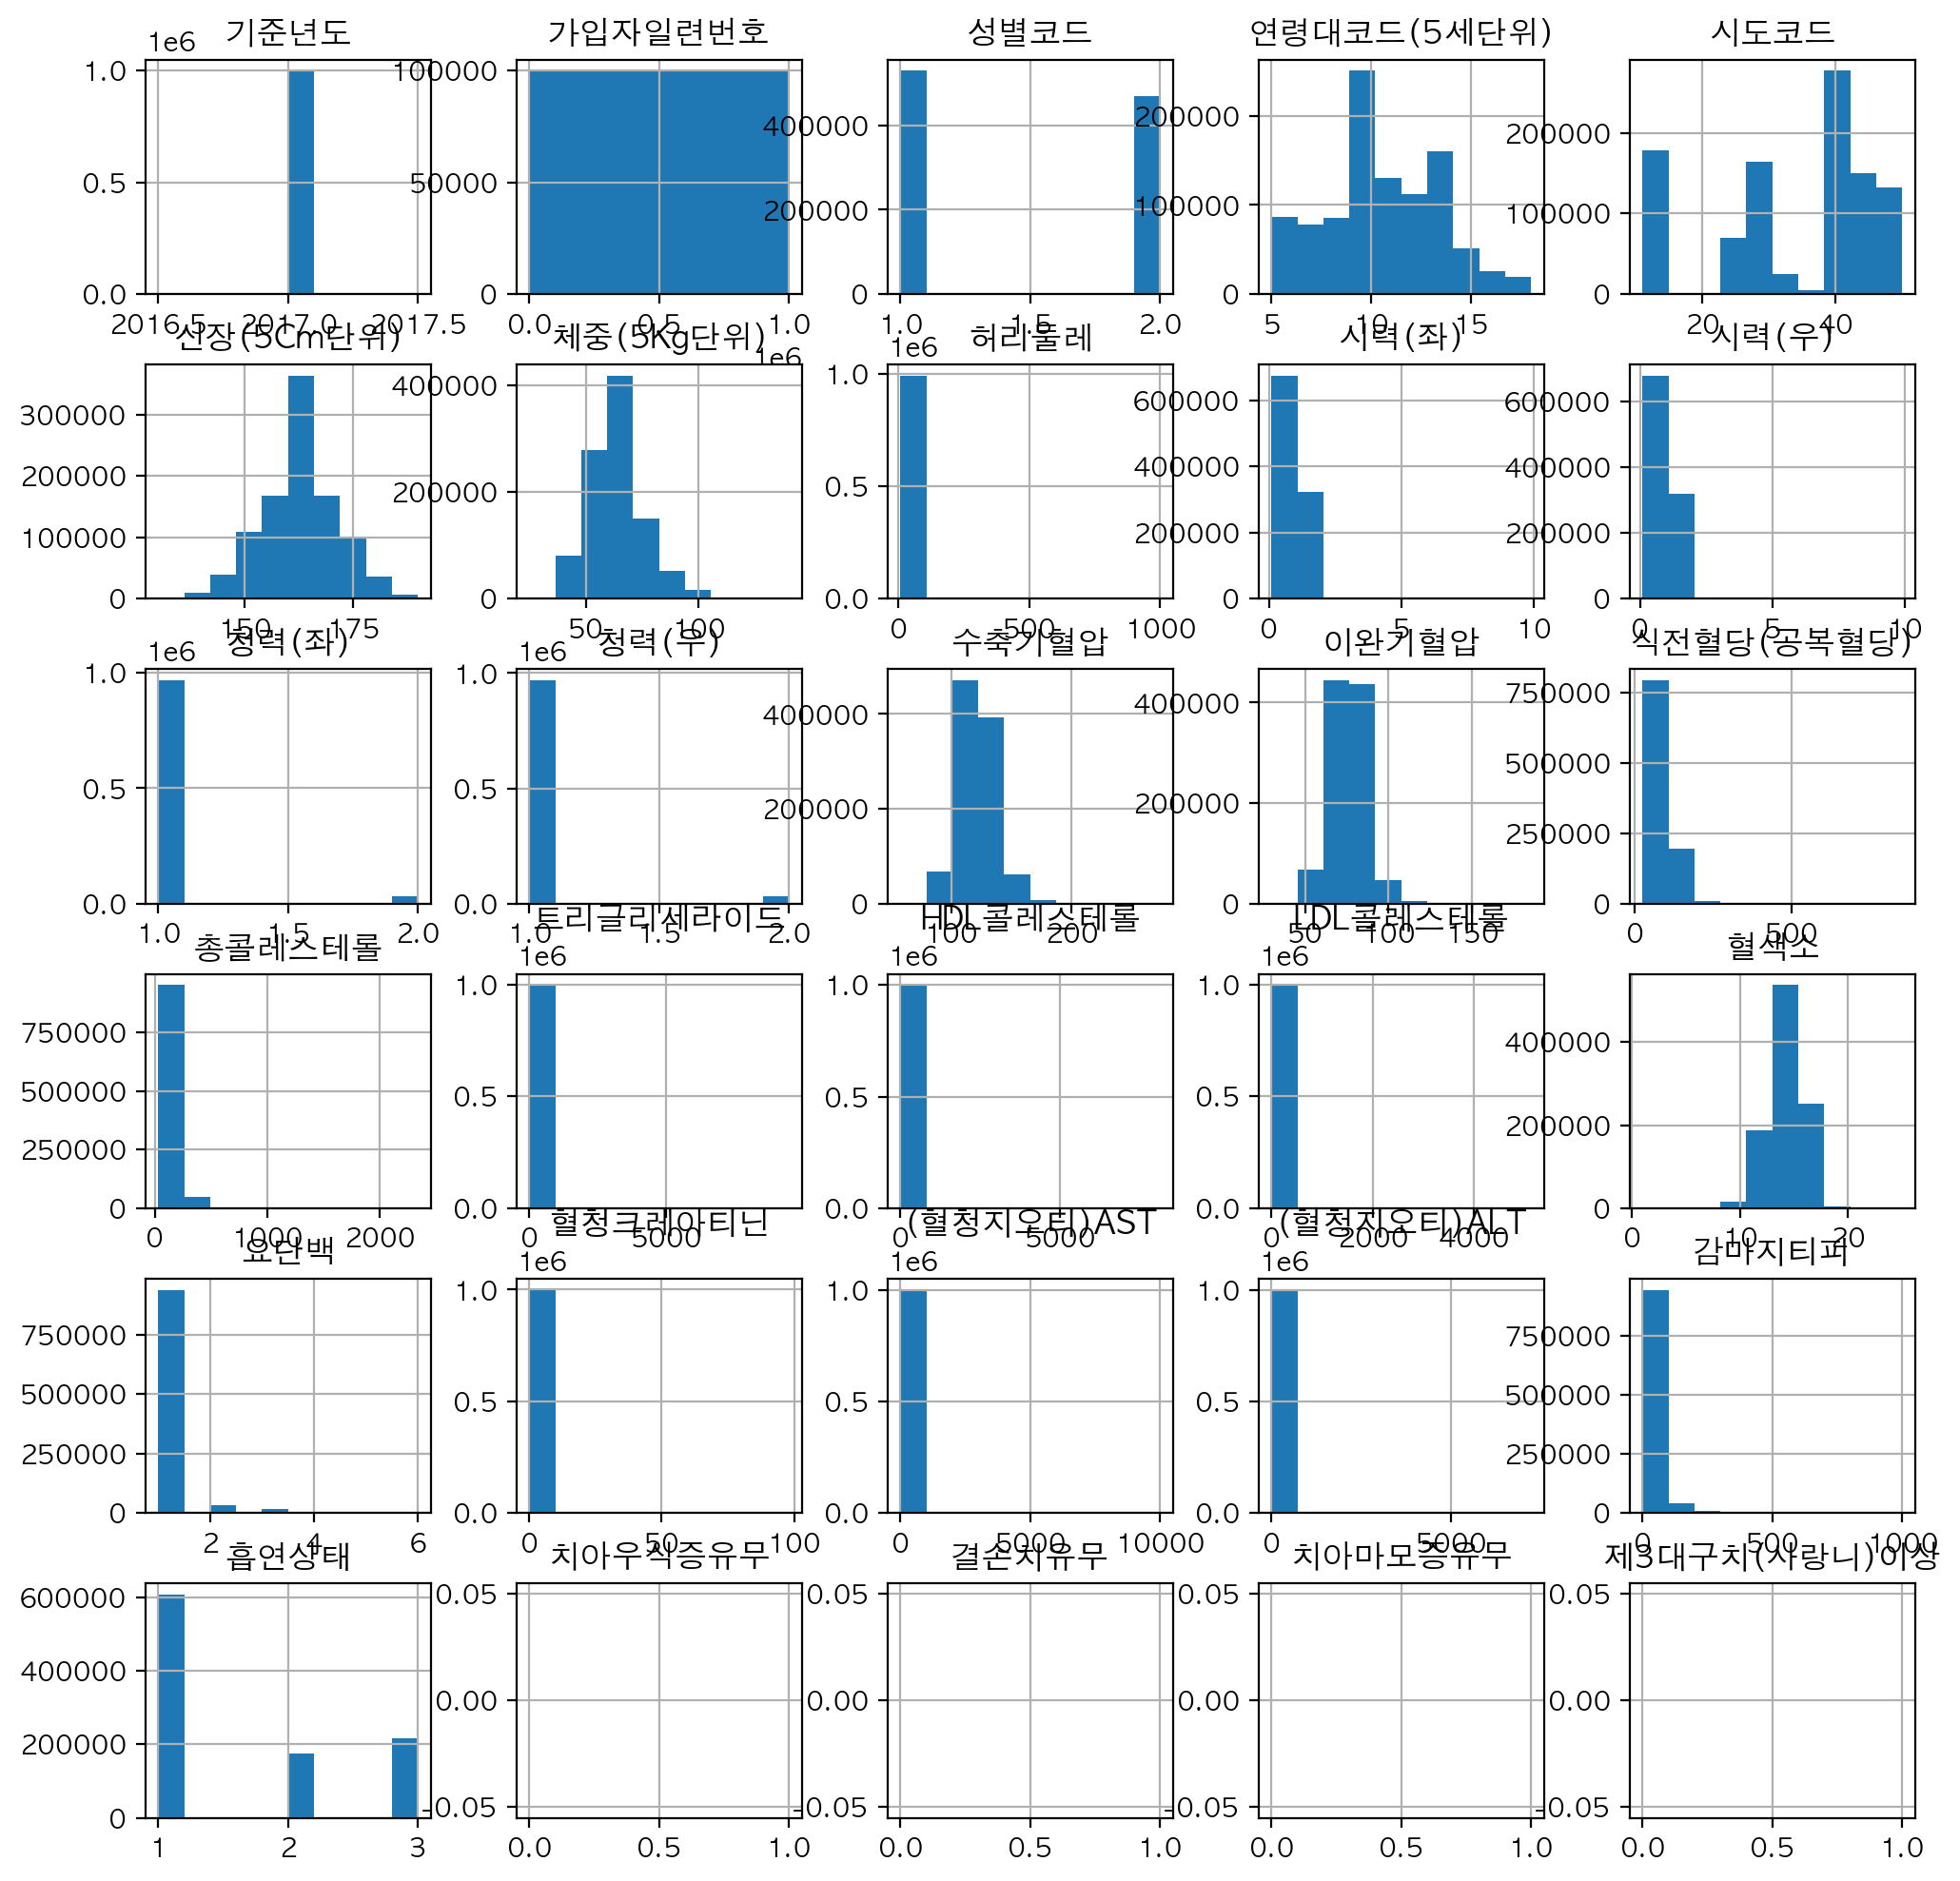

In [29]:
# 전체 데이터를 히스토그램으로
h = df.hist(figsize=(12,12))

## 슬라이싱을 사용하여 히스토그램 그리기
* 슬라이싱 사용시 iloc를 활용하면 순서대로 슬라이싱이 가능하다
* iloc[행, 열] 순서로 인덱스를 작성하면, 해당 인덱스만 불러오고, 전체 데이터를 불러오는 경우 [:,:]를 사용
* 슬라이싱을 해주는 대괄호 안의 콜론 앞뒤에 숫자를 쓰면 해당 시작인덱스:끝나는인덱스(+1)을 지정할 수 있다.

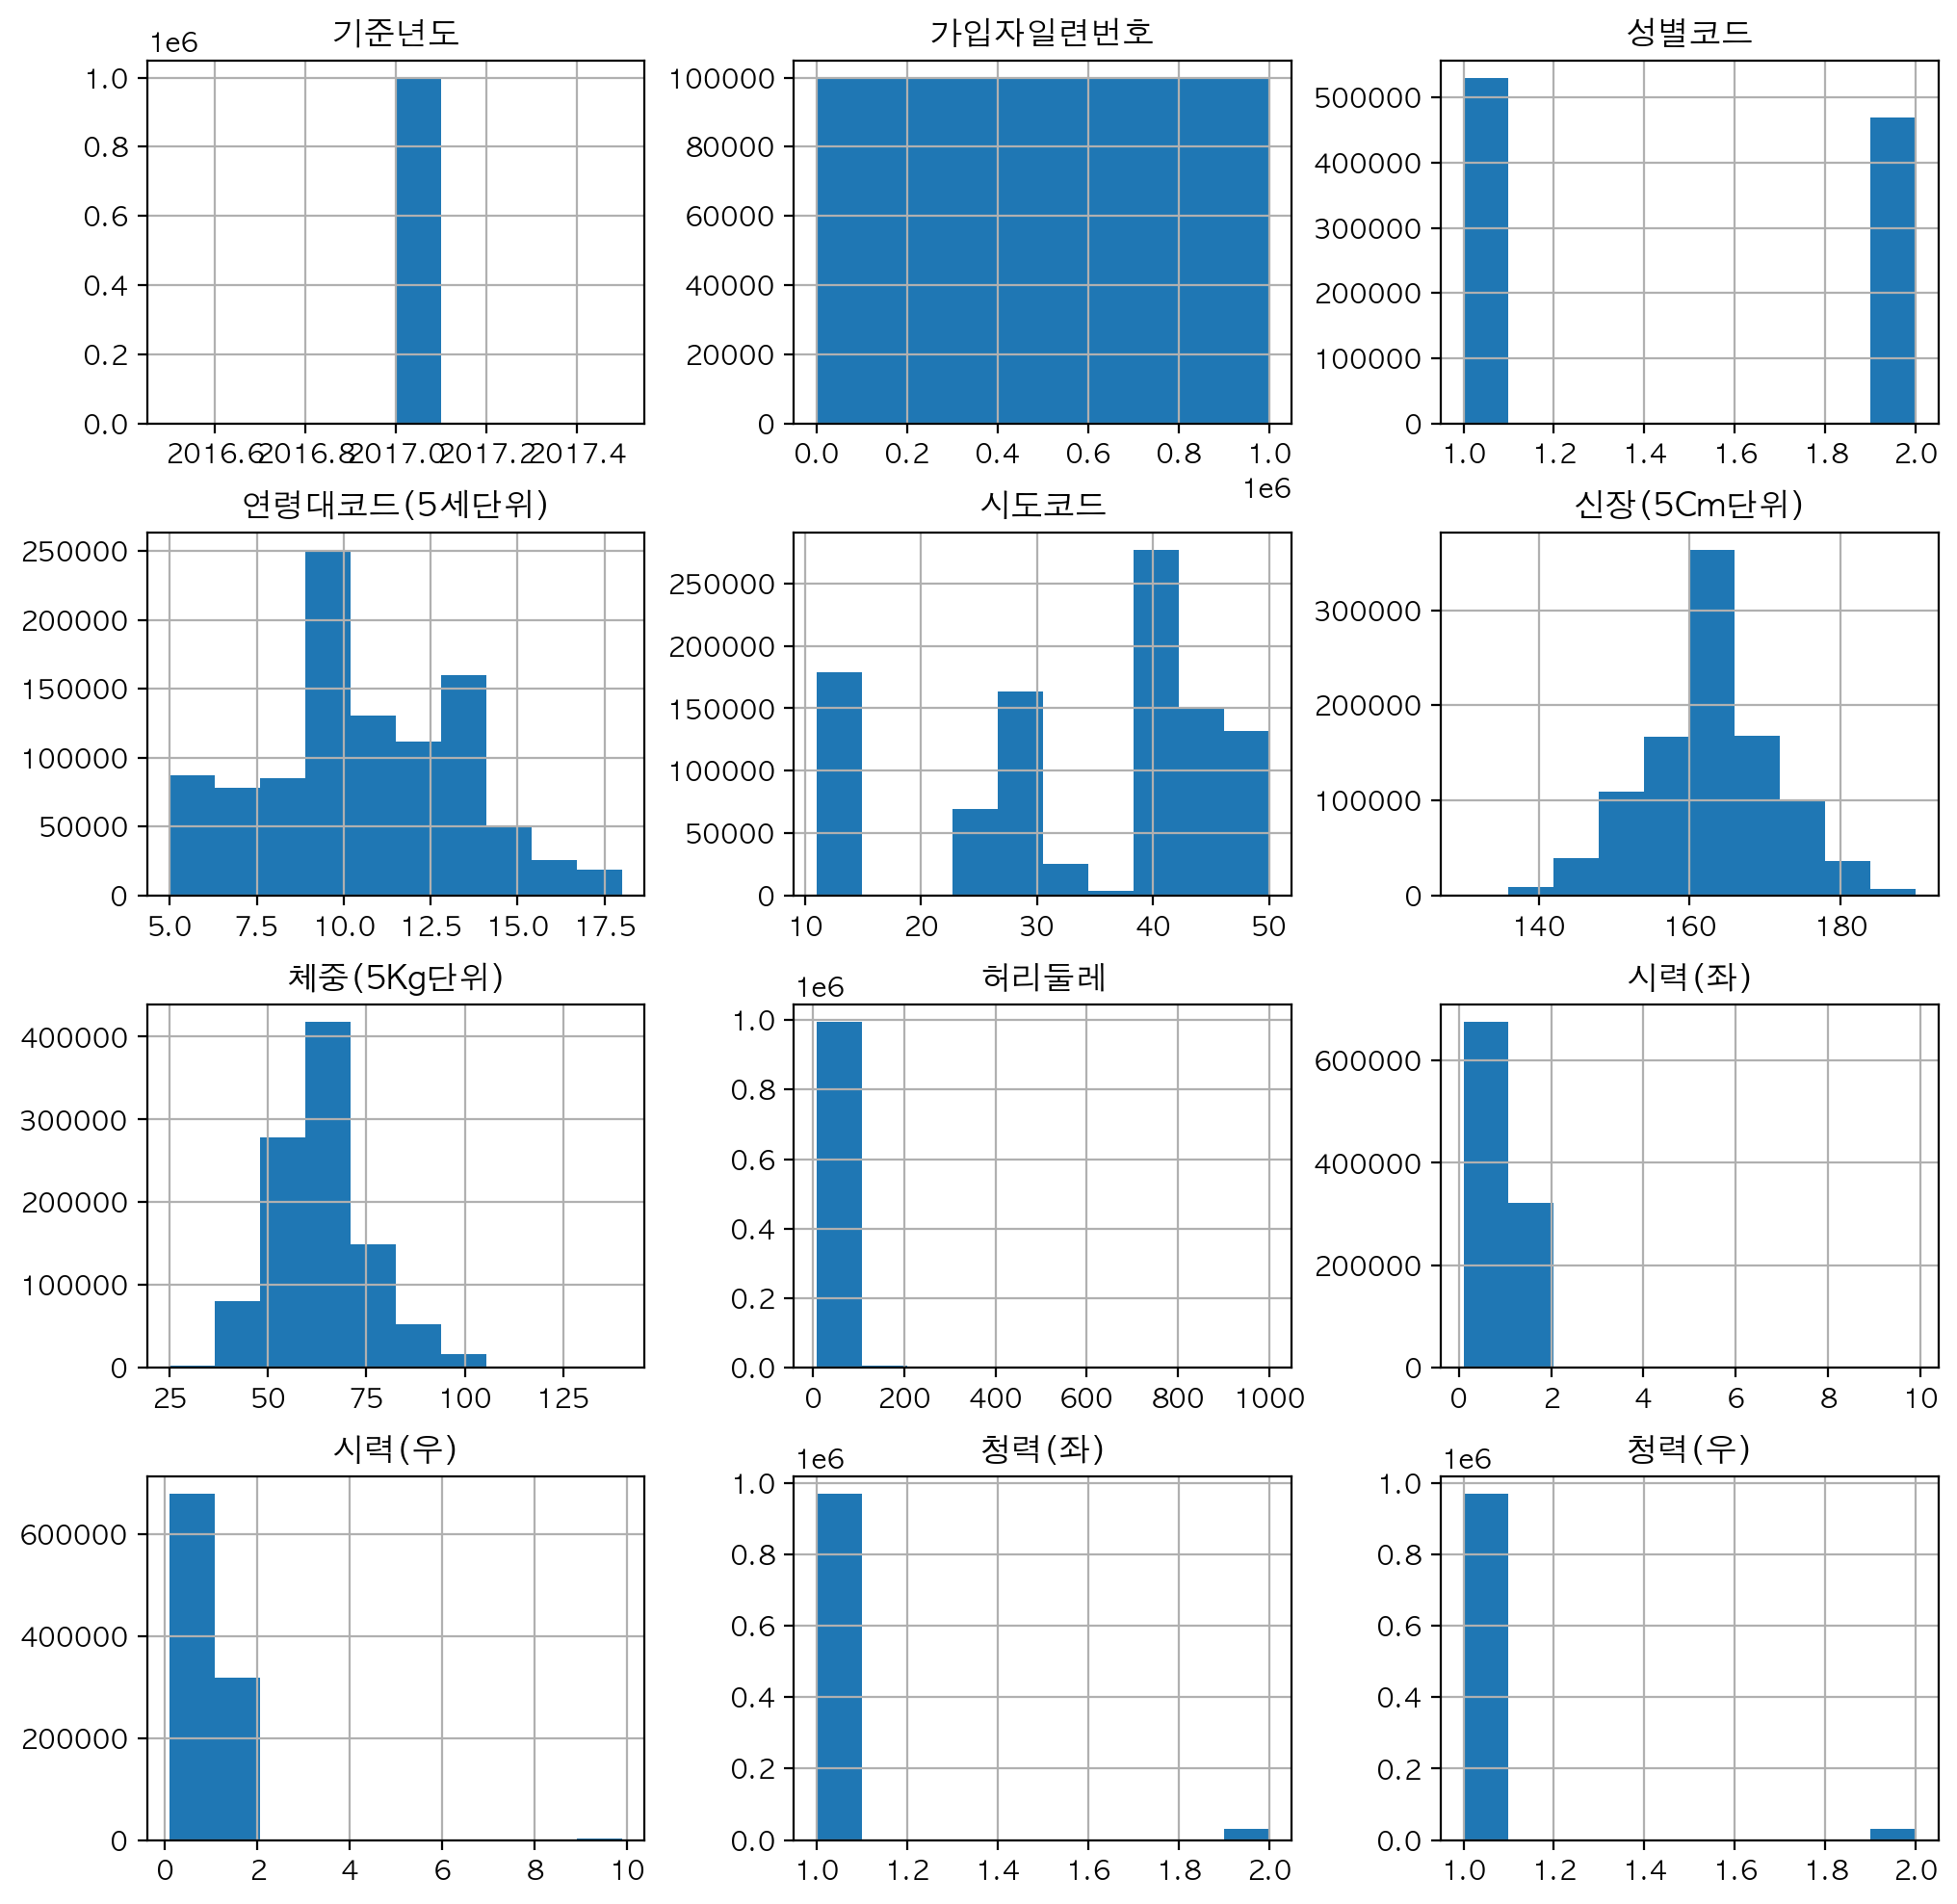

In [30]:
# 슬라이싱을 사용하여 12번째까지 컬럼에 대한 데이터를 히스토그램으로
# [행, 열]
# [:, :] -> 전체 데이터
h = df.iloc[:, :12].hist(figsize=(12,12))

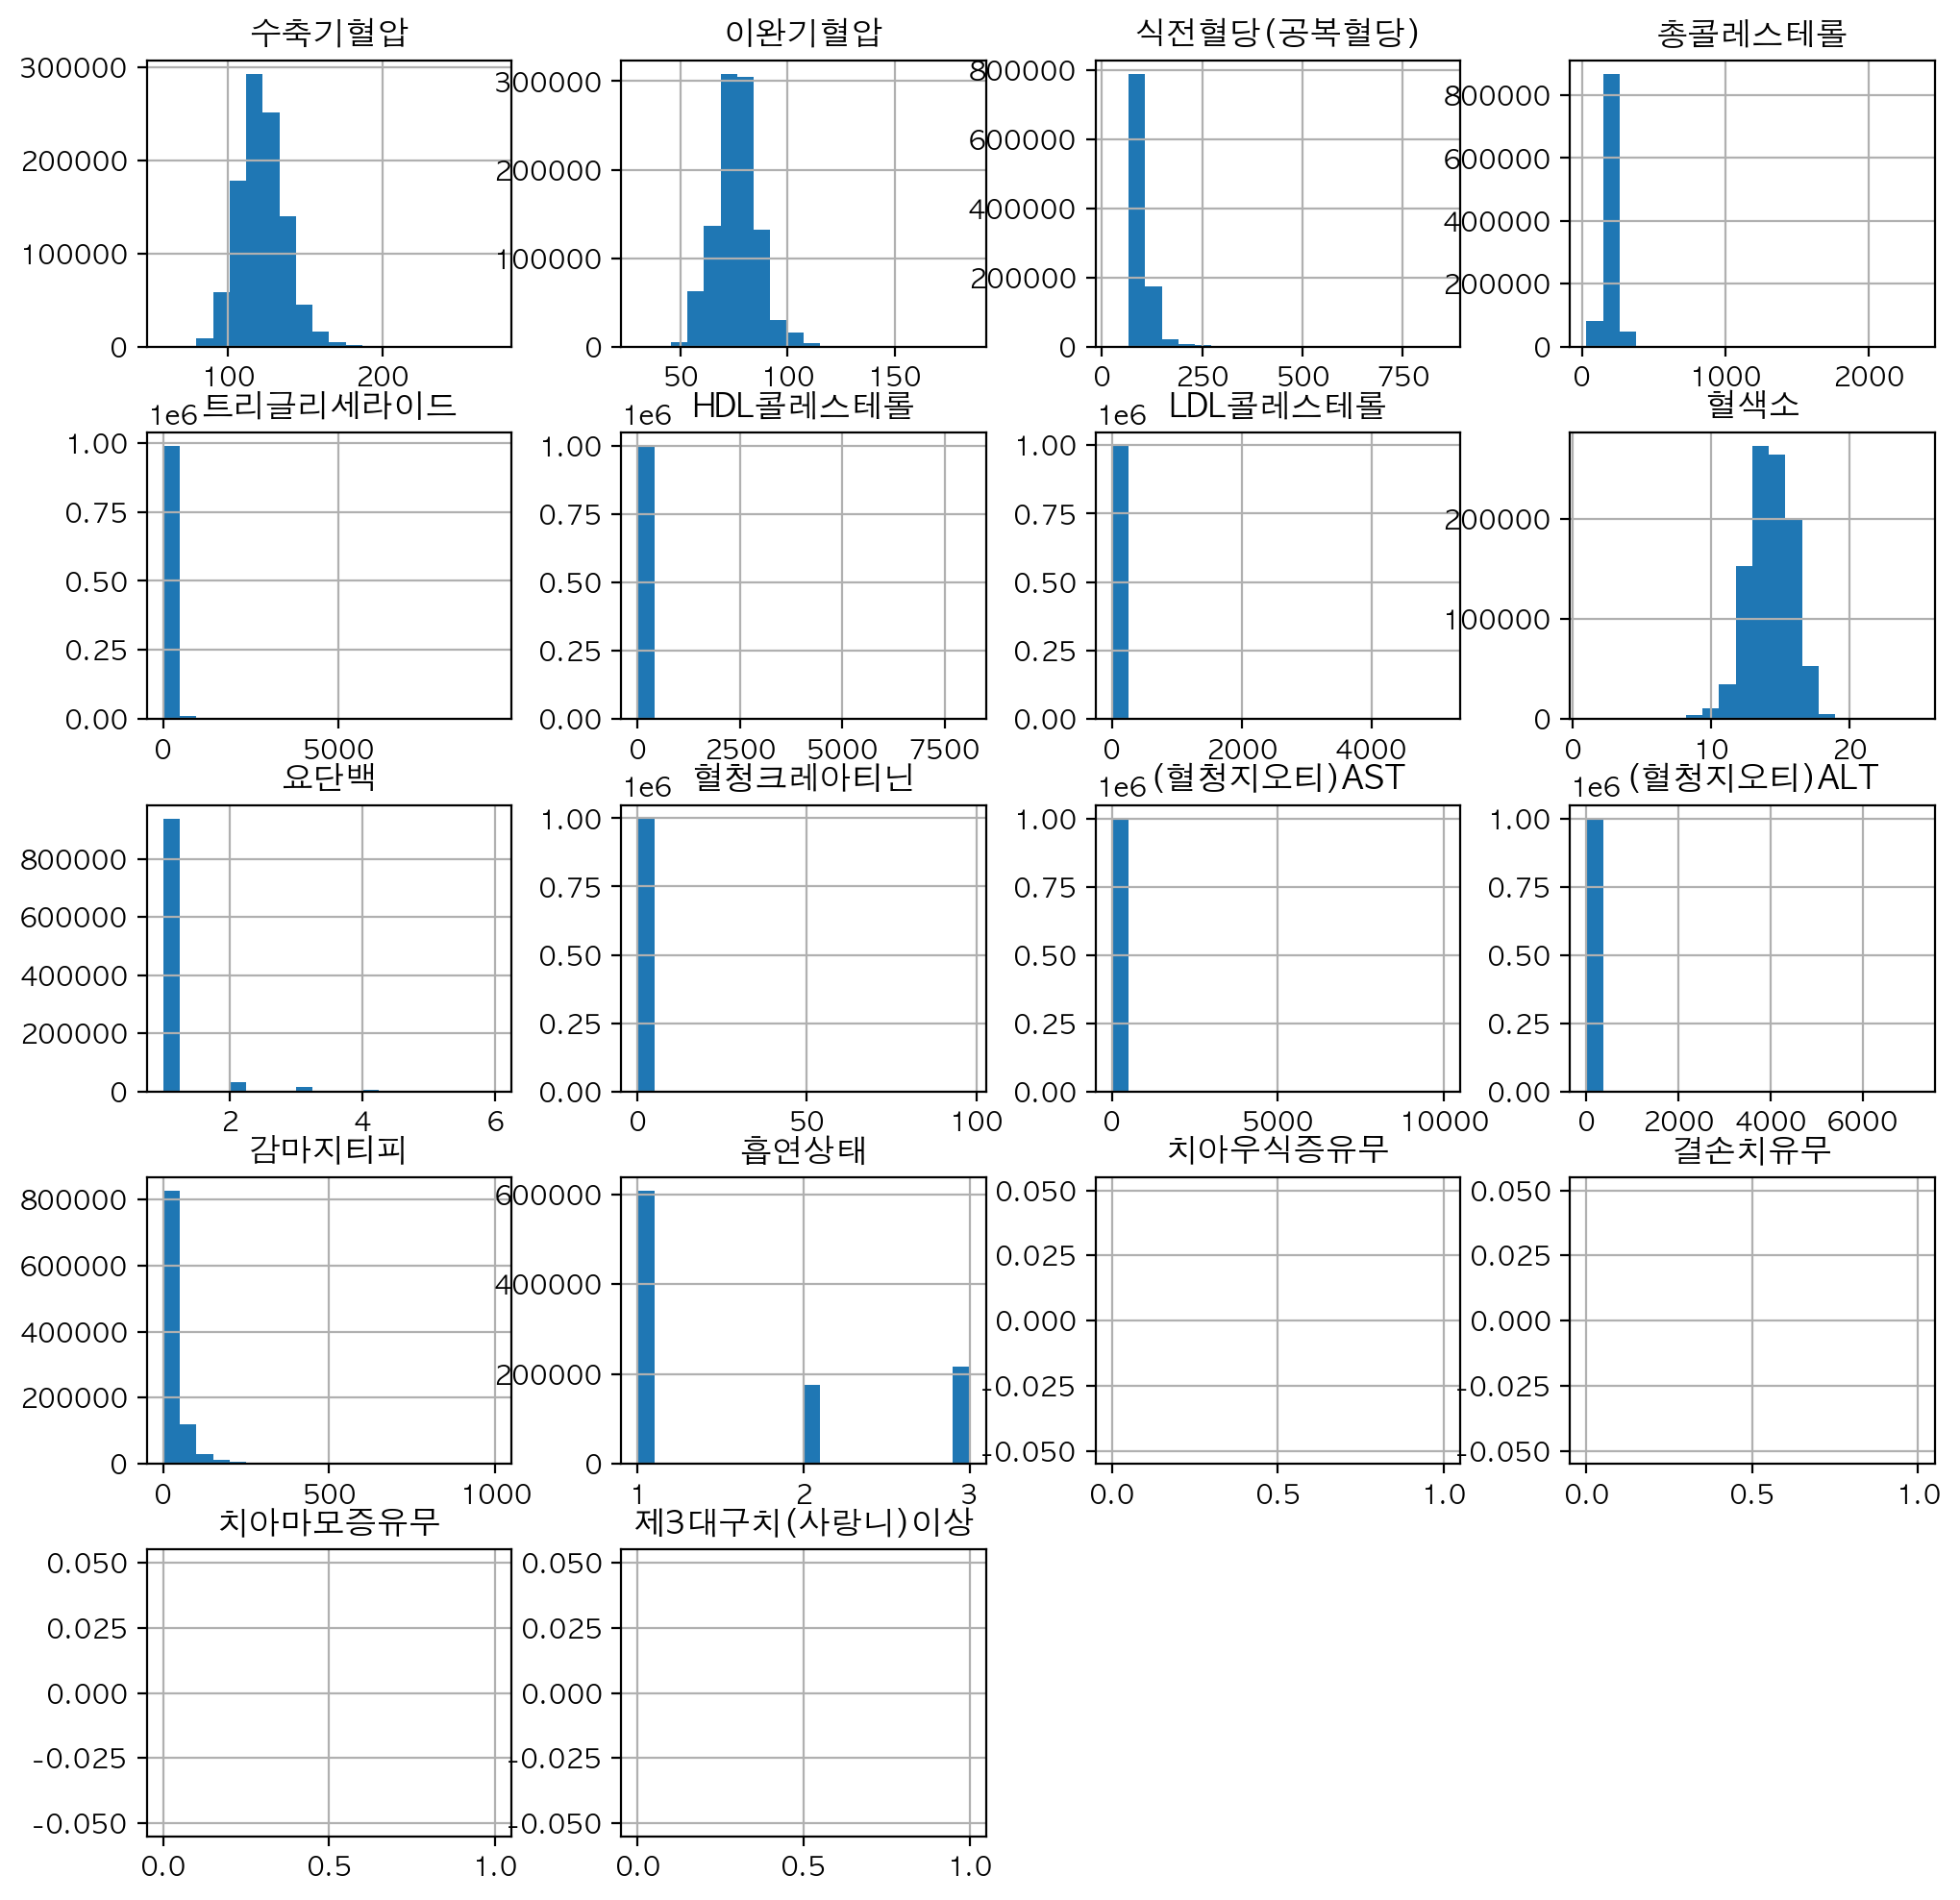

In [45]:
# 슬라이싱을 사용하여 12번째부터 컬럼에 대한 데이터를 히스토그램으로
h = df.iloc[:, 12:].hist(figsize=(12,12), bins=20)

# 샘플데이터 추출하기

In [48]:
# df.sample을 통해 일부 데이터만 추출
# random_state 를 사용해 샘플링되는 값을 고정할 수 있다.
# 실험을 통제하기 위하여 random_state를 고정할 수 있음. -> random_state=1
df_sample = df.sample(1000, random_state=1)
df_sample.shape

(1000, 34)

# Seaborn

# 범주형(카테고리) 데이터 시각화
* countplot은 범주형 데이터의 수를 더한 값을 그래프로 표현
* value_counts로 구한 값을 시각화 한다

## countplot - 음주여부

<AxesSubplot: >

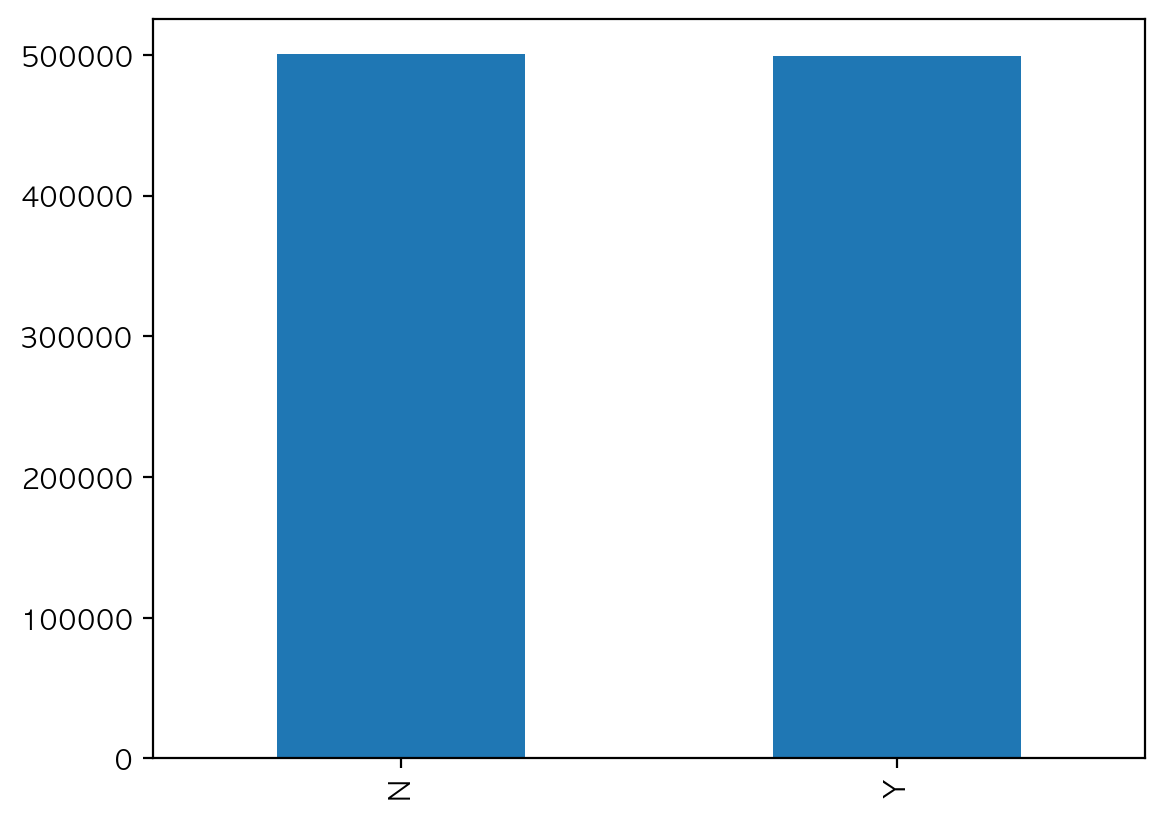

In [51]:
# 음주여부에 따른 countplot
df['음주여부'].value_counts().plot.bar()

<AxesSubplot: xlabel='음주여부', ylabel='count'>

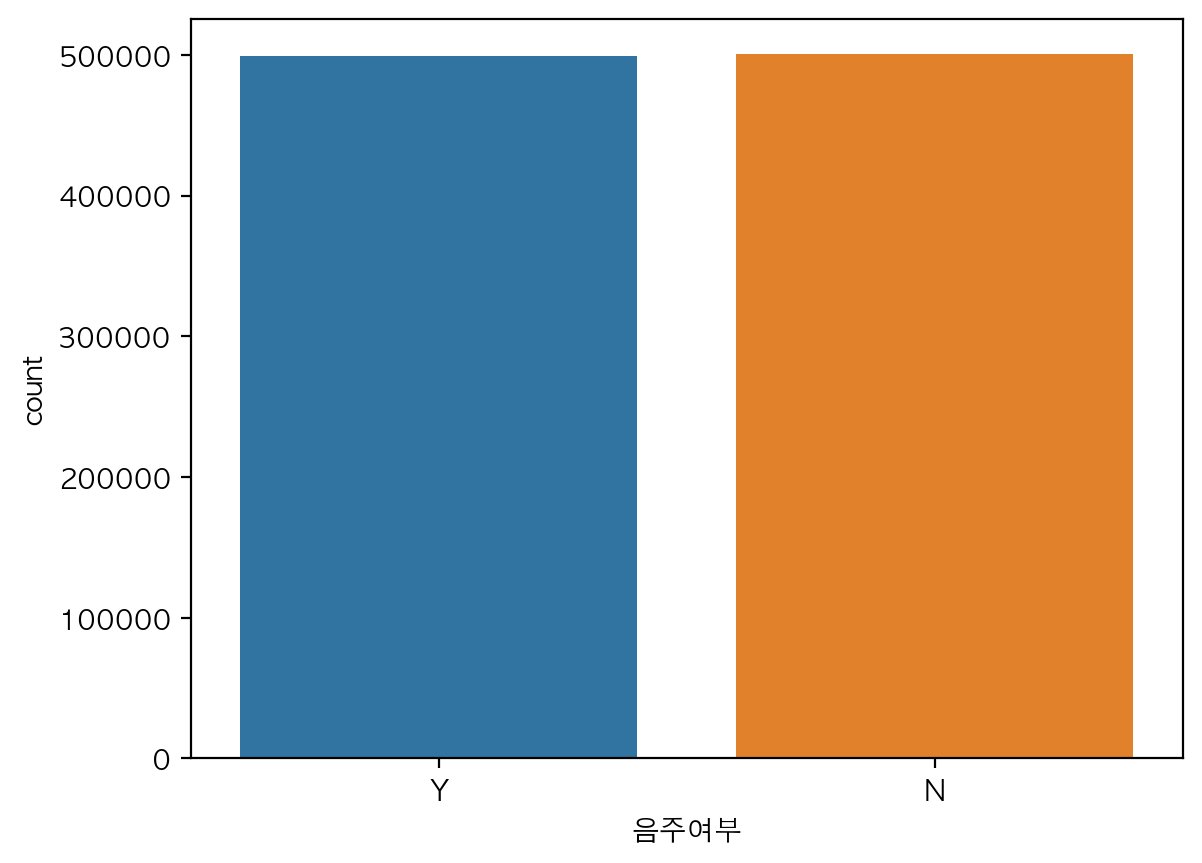

In [55]:
sns.countplot(x='음주여부', data=df)

## hue 옵션

<AxesSubplot: xlabel='음주여부', ylabel='count'>

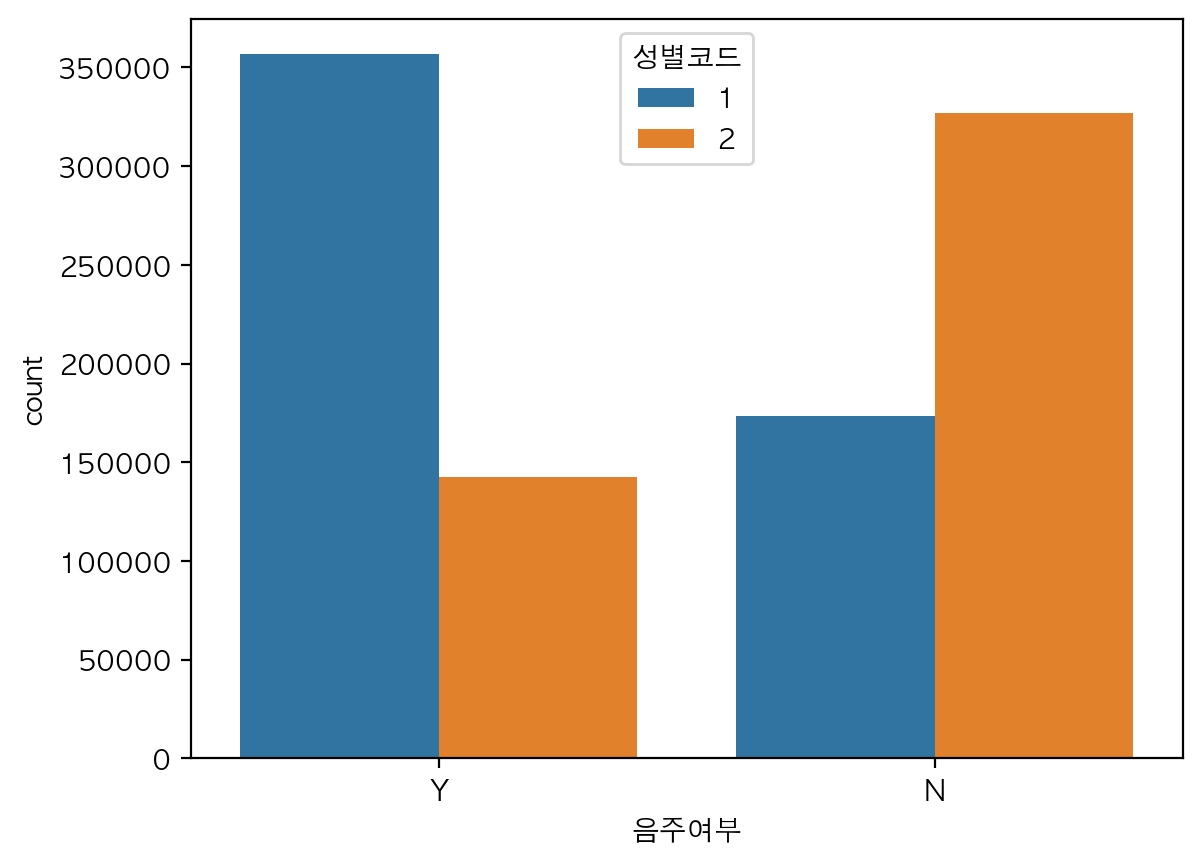

In [57]:
# 음주여부에 따른 countplot을 그리고 hue를 사용해 성별코드 색상을 구분
sns.countplot(data=df, x='음주여부', hue='성별코드')

<AxesSubplot: xlabel='연령대코드(5세단위)', ylabel='count'>

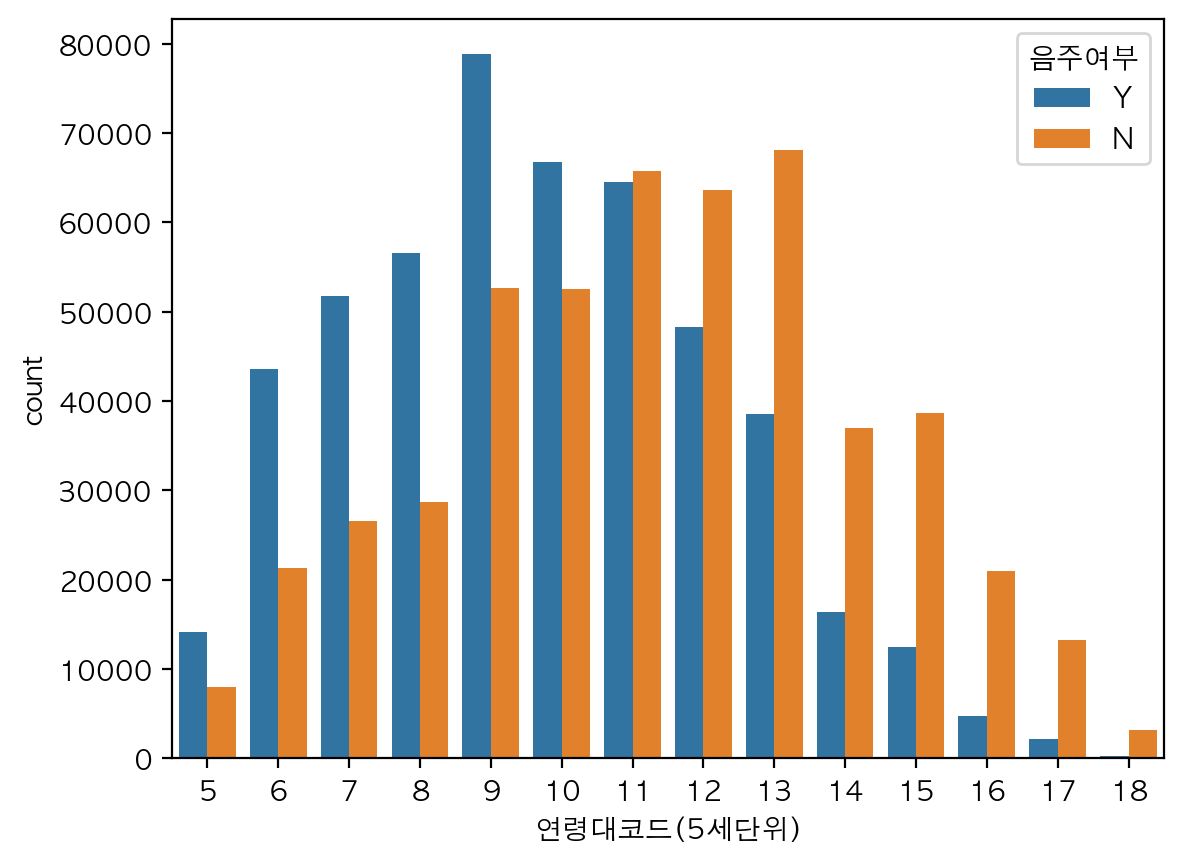

In [59]:
# countplot으로 연령대별 음주여부
# hue를 사용하여 색상을 표현
sns.countplot(data=df, x='연령대코드(5세단위)', hue='음주여부')

## countplot - 키와 몸무게
* 키와 몸무게는 연속형 데이터라고 볼 수 있지만,
* 데이터에따라 범주형 데이터가 될 수 있다
* 즉, 데이터의 구조를 한번 더 확인할 필요가 있다

<AxesSubplot: xlabel='신장(5Cm단위)', ylabel='count'>

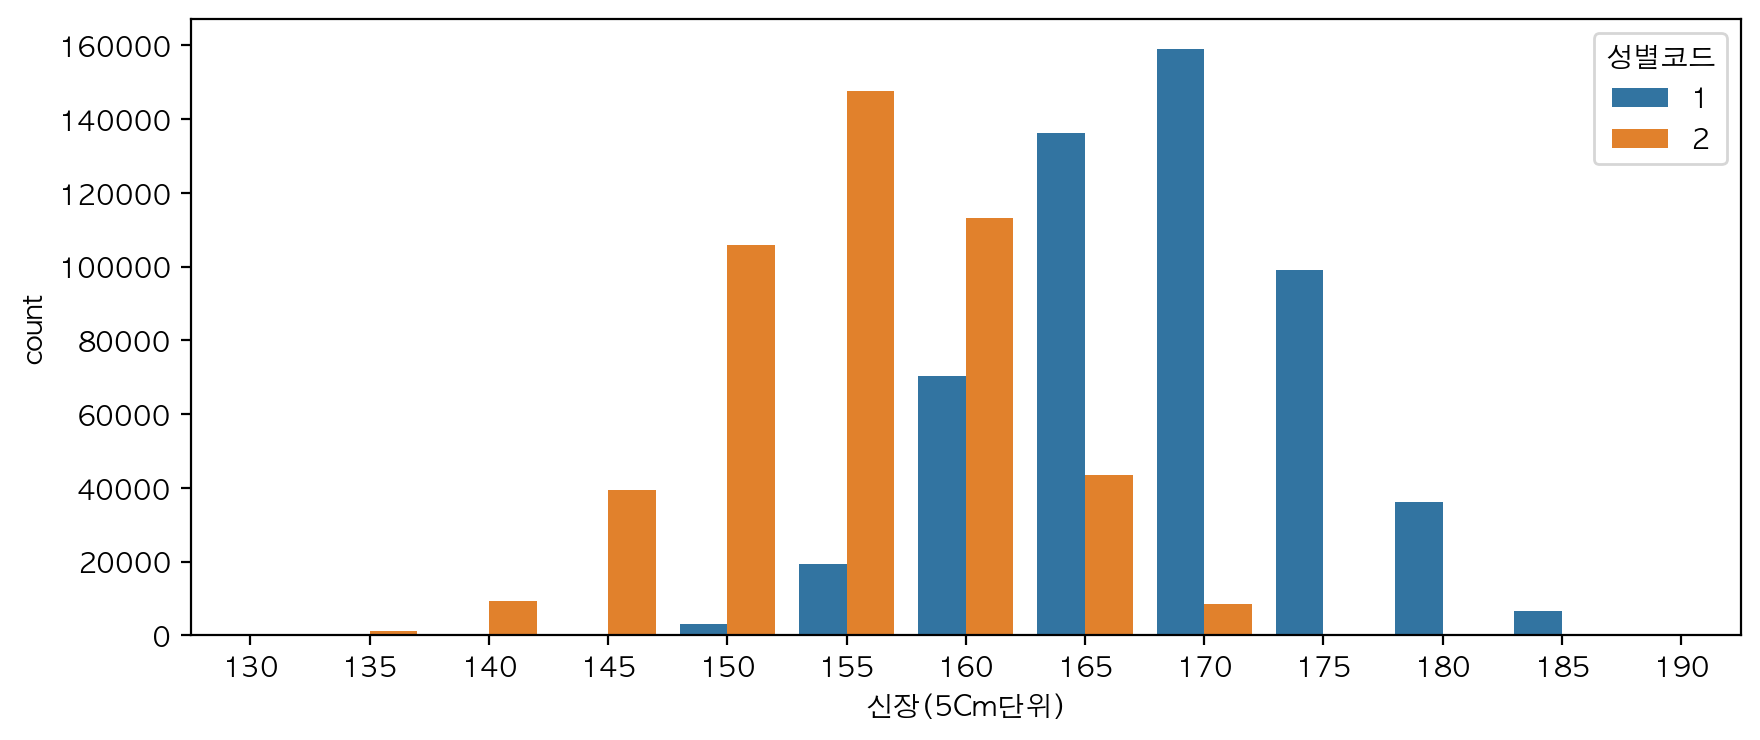

In [68]:
# countplot - 키
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='신장(5Cm단위)', hue='성별코드')

<AxesSubplot: xlabel='체중(5Kg단위)', ylabel='count'>

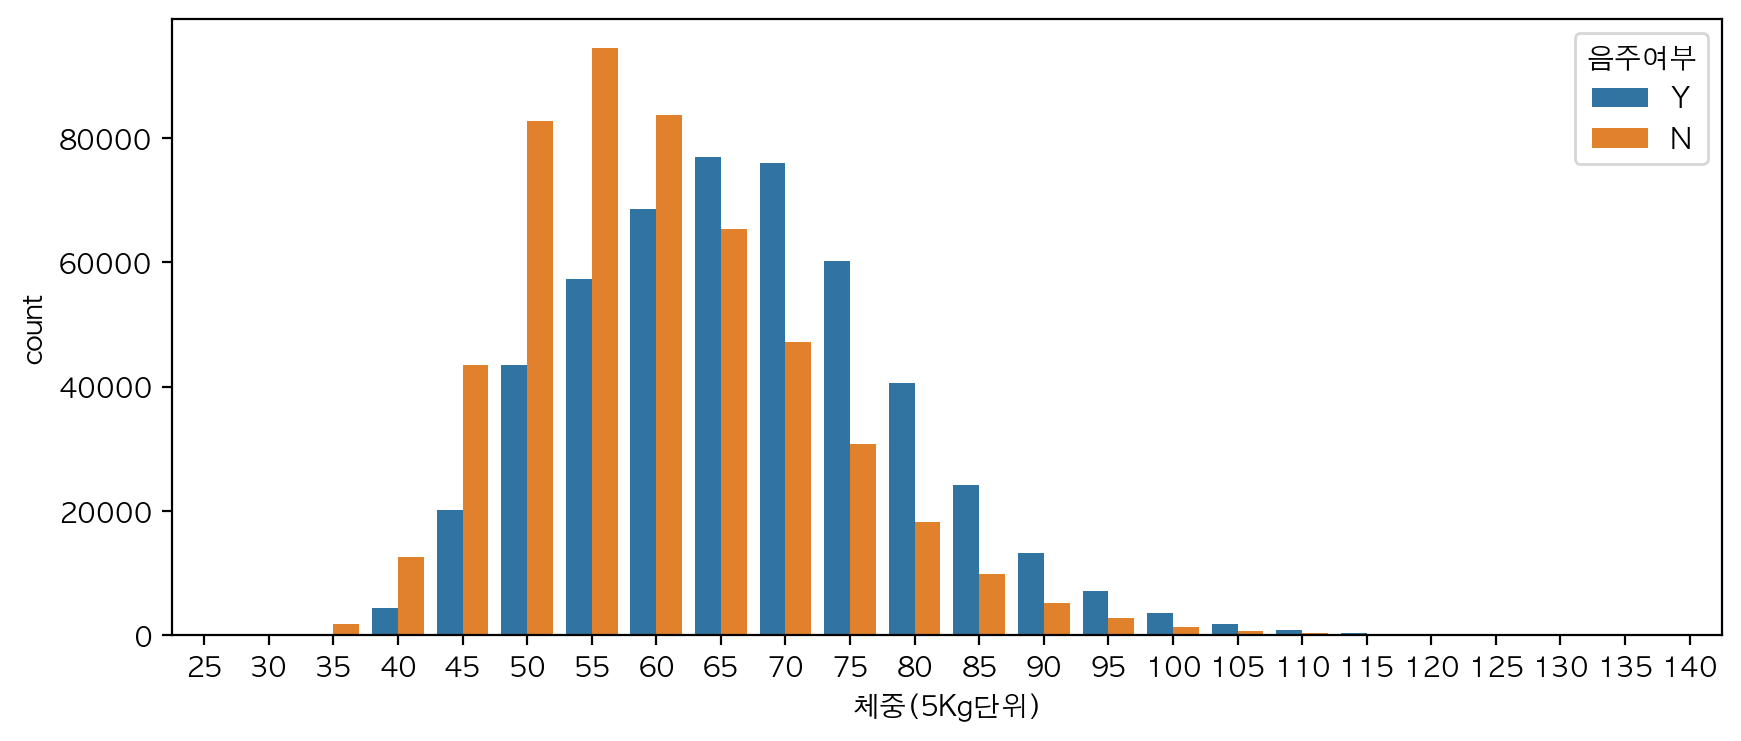

In [69]:
# countplot - 체중
plt.figure(figsize=(10,4))
sns.countplot(data=df, x='체중(5Kg단위)', hue='음주여부')

## barplot - 수치형 vs 범주형 데이터 시각화

<AxesSubplot: xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

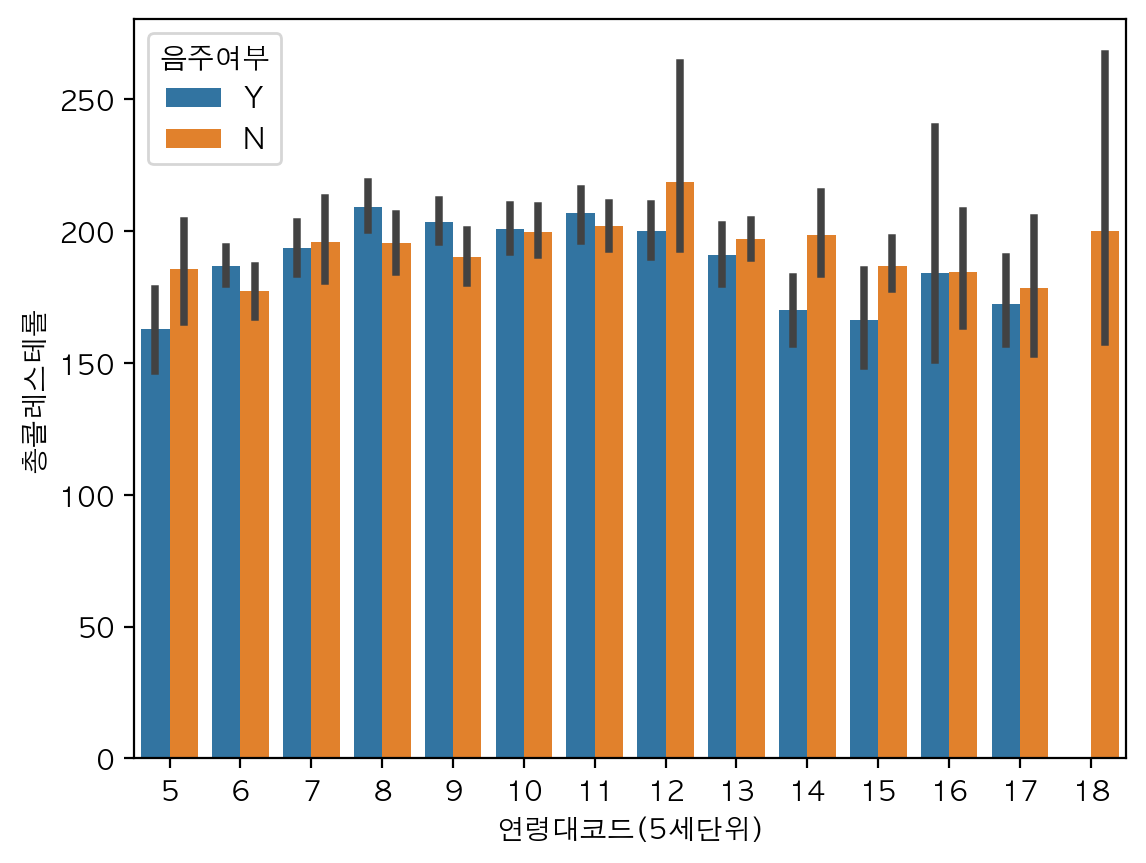

In [72]:
# 연령대코드와 총 콜레스테롤
# hue 로 색상을 다르게 표현하고, 음주여부를 함께 보기
sns.barplot(data=df_sample, x='연령대코드(5세단위)', y='총콜레스테롤', hue='음주여부')

<AxesSubplot: xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

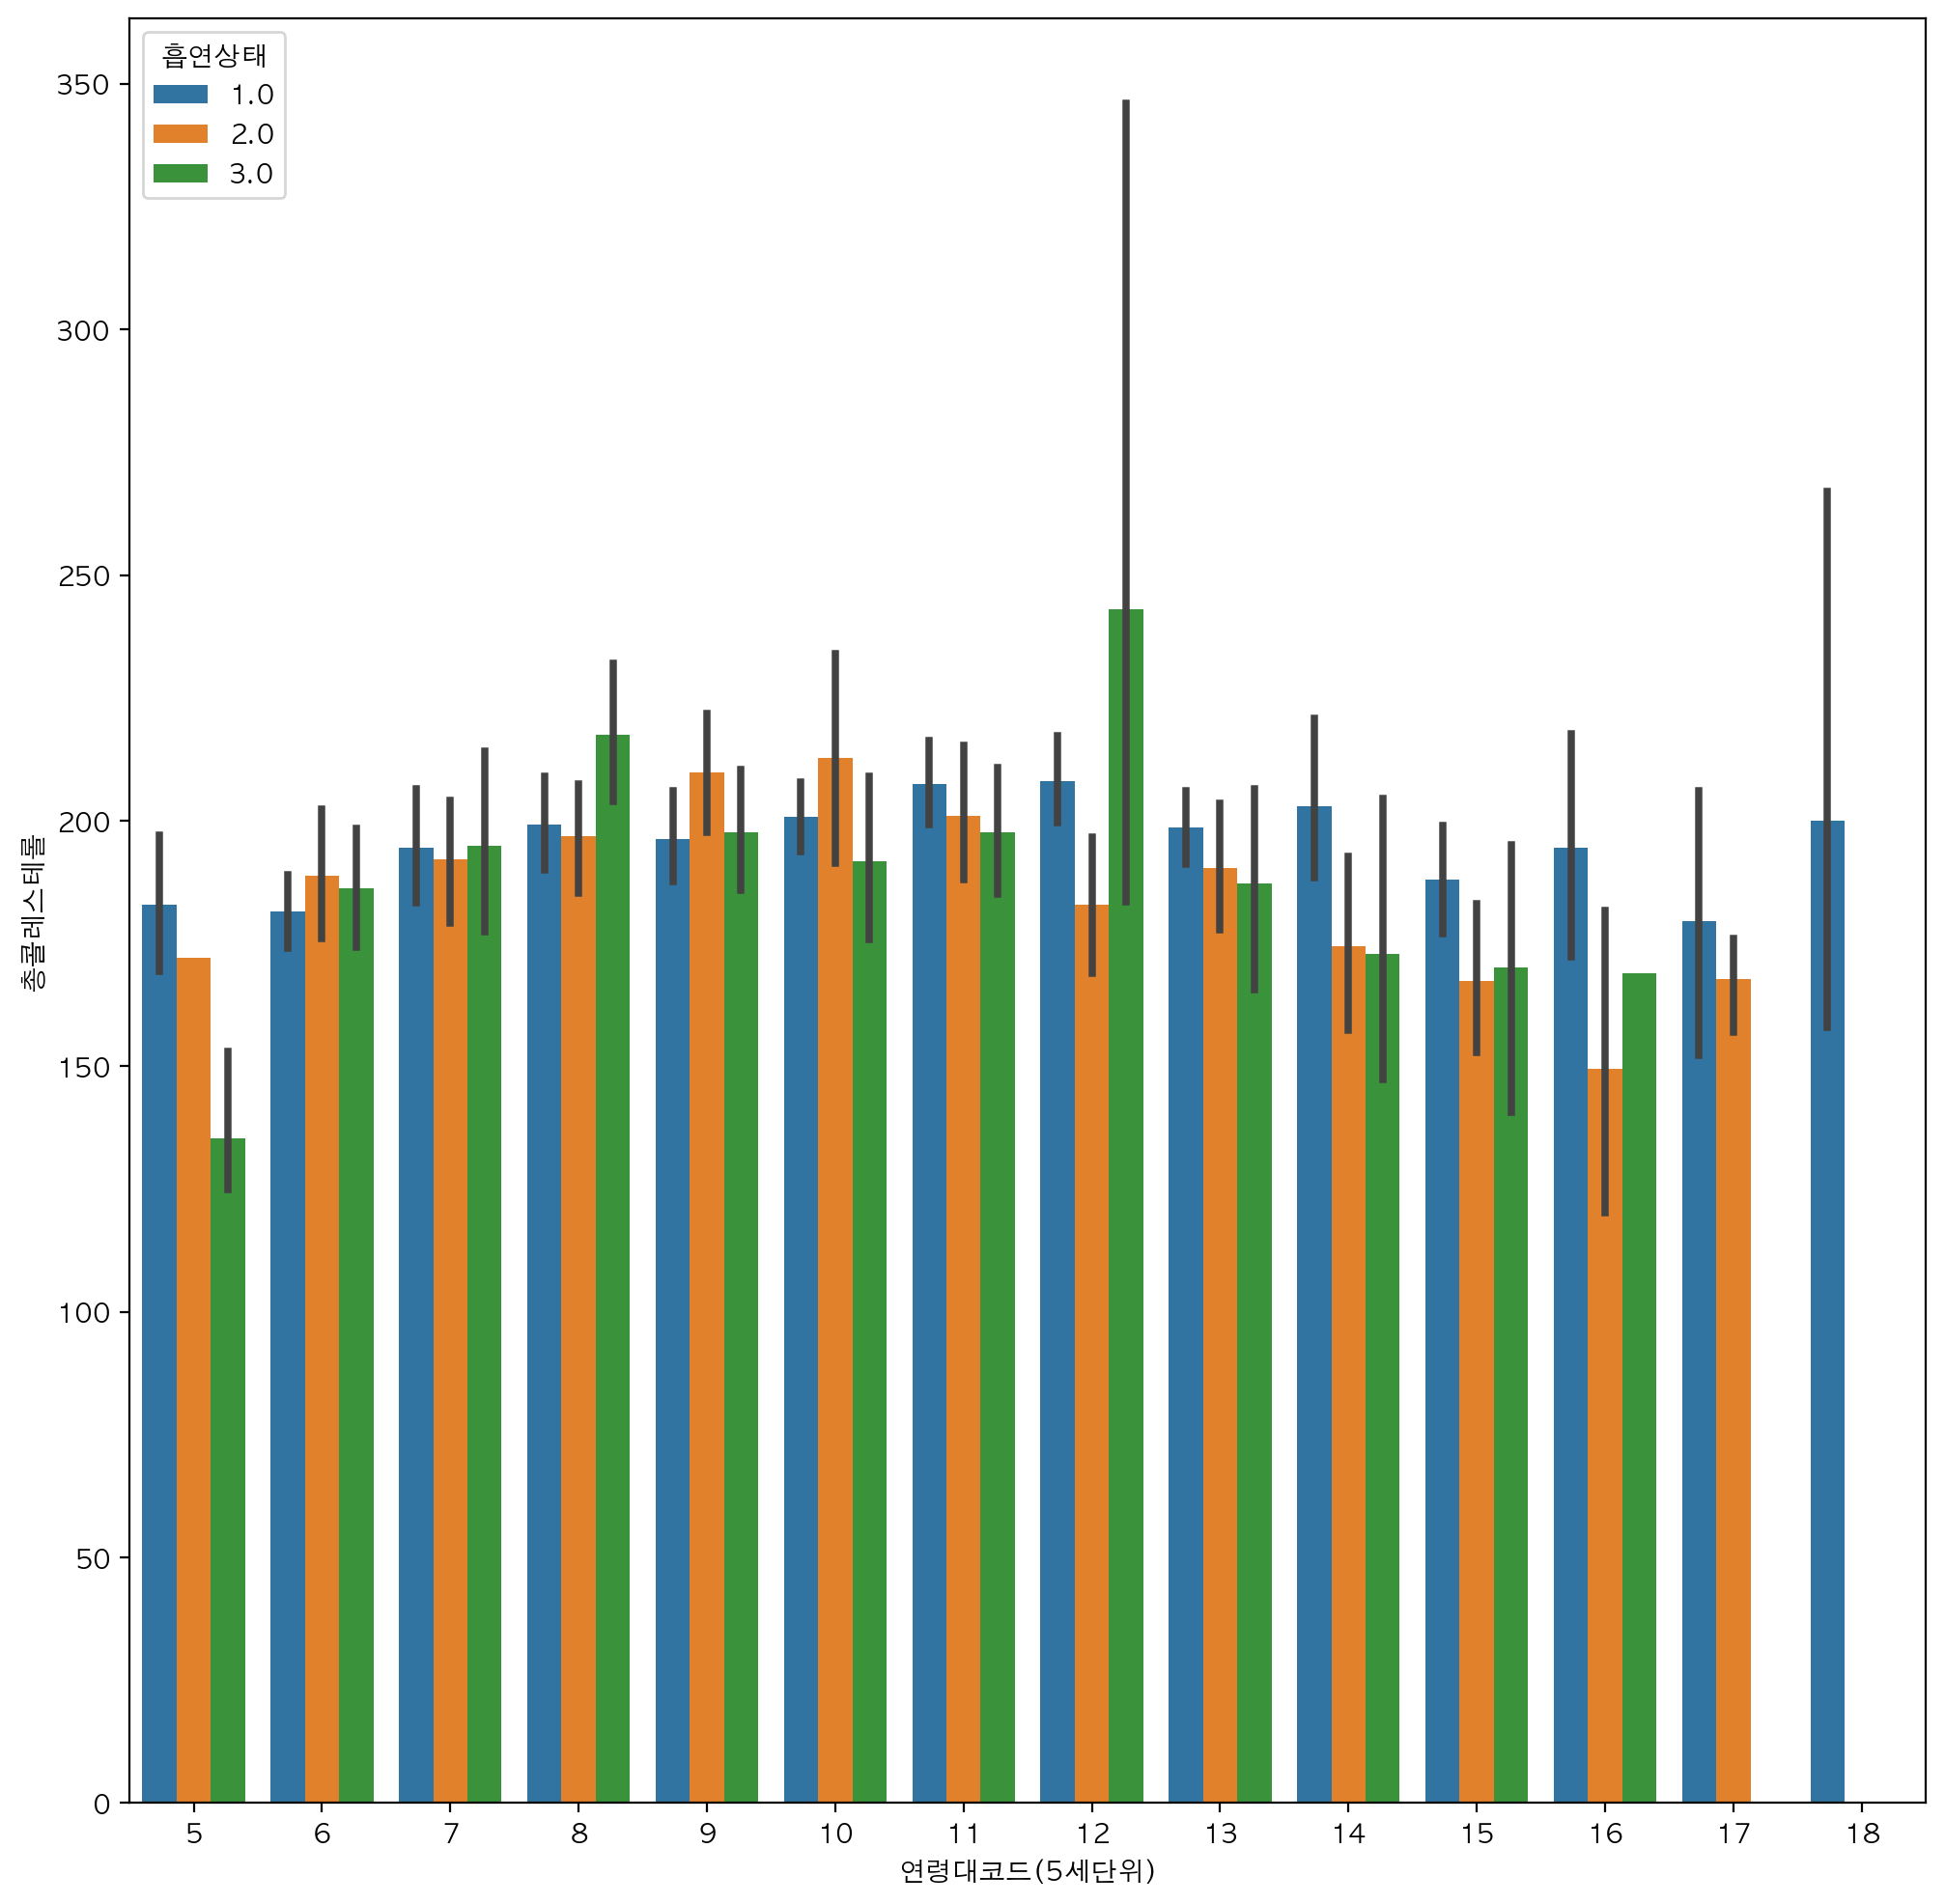

In [74]:
# 연령대코드와 총 콜레스테롤
# hue 로 색상을 다르게 표현하고, 흡연상태를 함께 보기
plt.figure(figsize=(12,12))
sns.barplot(data=df_sample, x='연령대코드(5세단위)', y='총콜레스테롤', hue='흡연상태')

<AxesSubplot: xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

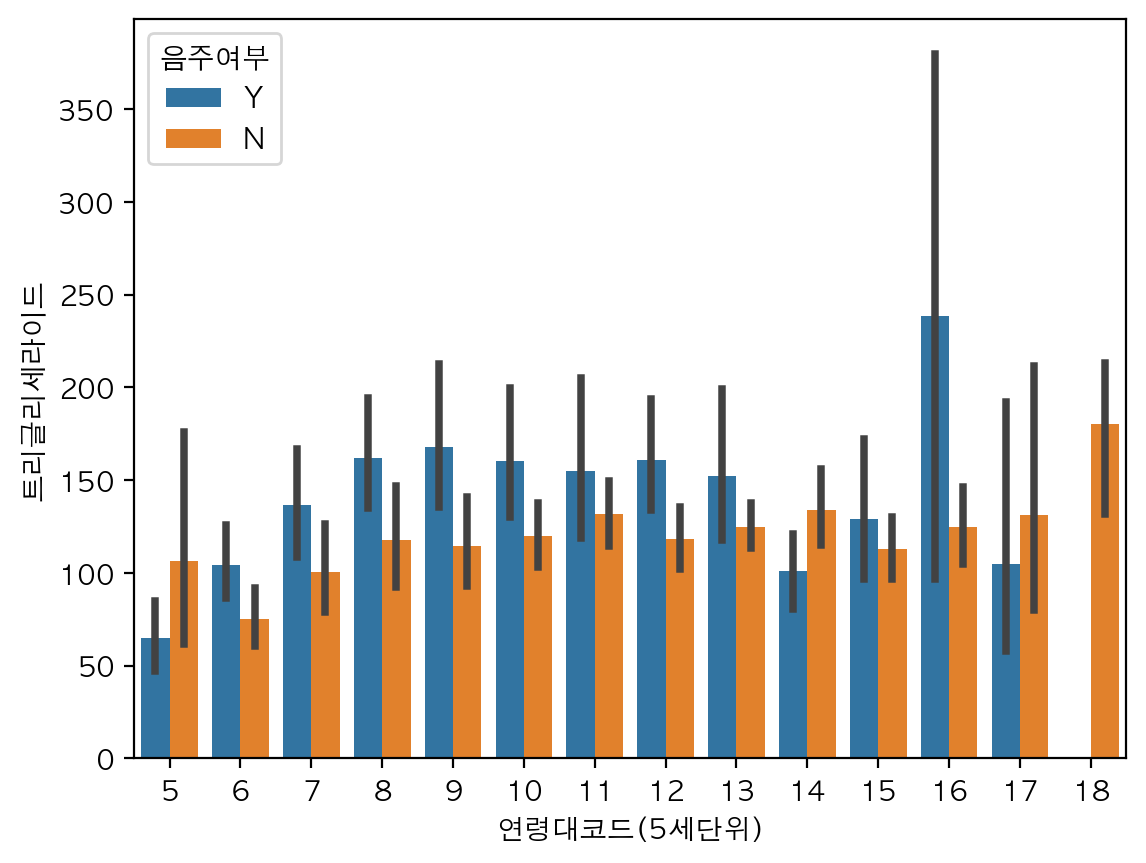

In [81]:
# 트리글리세라이드(중성지방)에 따른 연령대코드(5세단위)를 음주여부에 따라 barplot으로 그리기
sns.barplot(data=df_sample, x='연령대코드(5세단위)', y='트리글리세라이드', hue='음주여부', errorbar=('ci', 95))

<AxesSubplot: xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

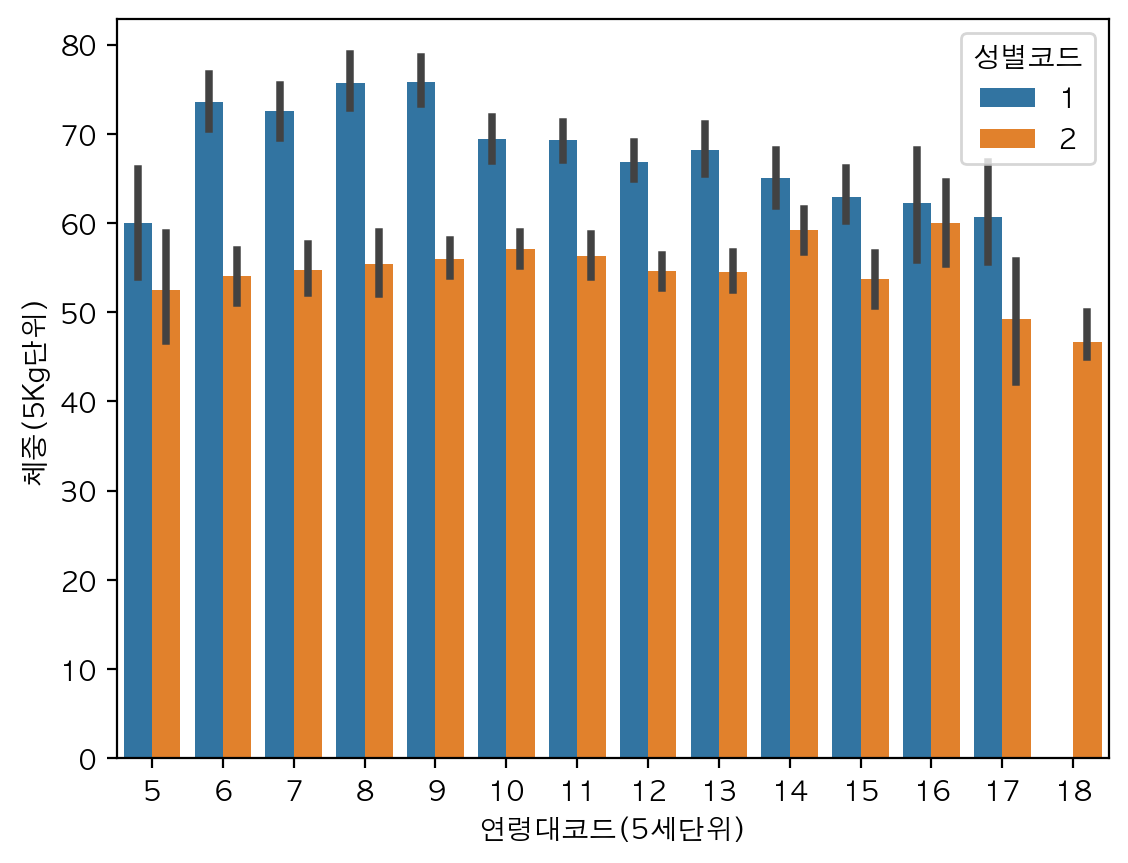

In [83]:
# 연령대코드와 체중(5Kg 단위)를 성별에 따라 보기
sns.barplot(data=df_sample, x='연령대코드(5세단위)', y='체중(5Kg단위)', hue='성별코드')

<AxesSubplot: xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

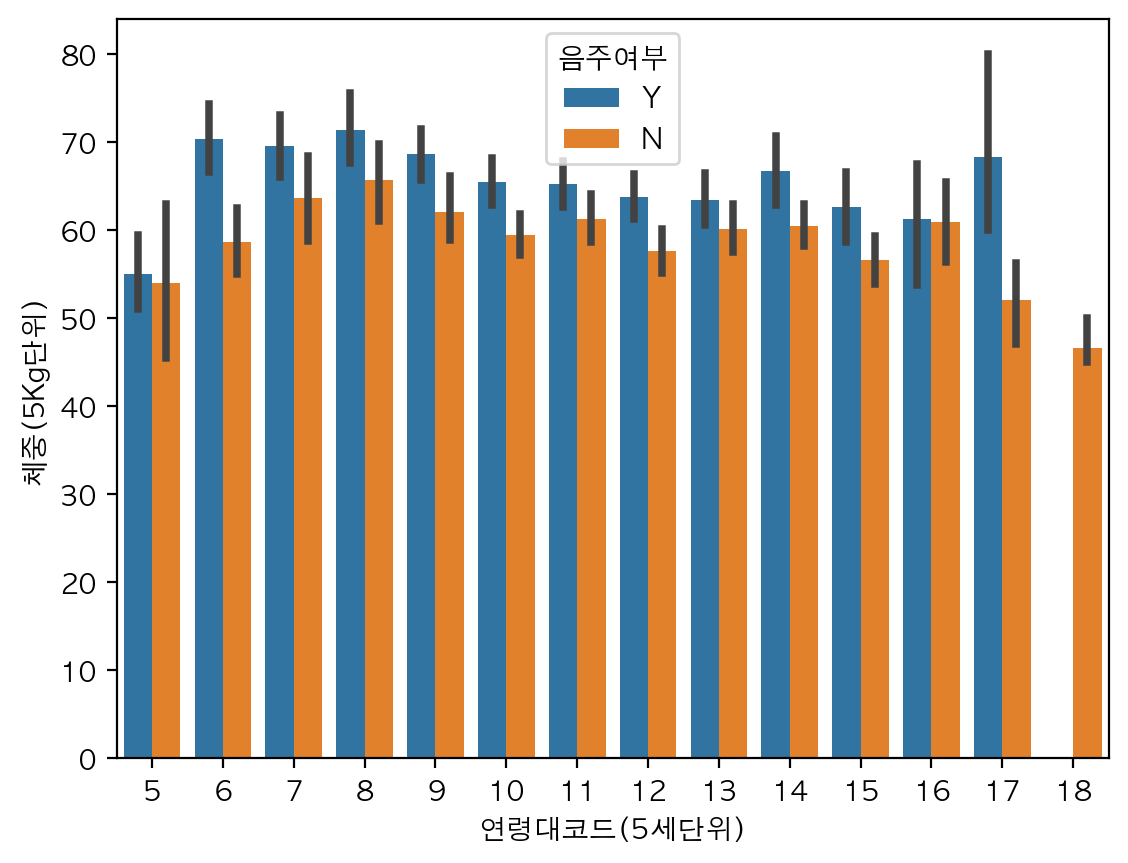

In [89]:
# 연령대코드와 체중(5Kg 단위)를 음주여부에 따라 보기
sns.barplot(data=df_sample, x='연령대코드(5세단위)', y='체중(5Kg단위)', hue='음주여부')

## lineplot and pointplot

<AxesSubplot: xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

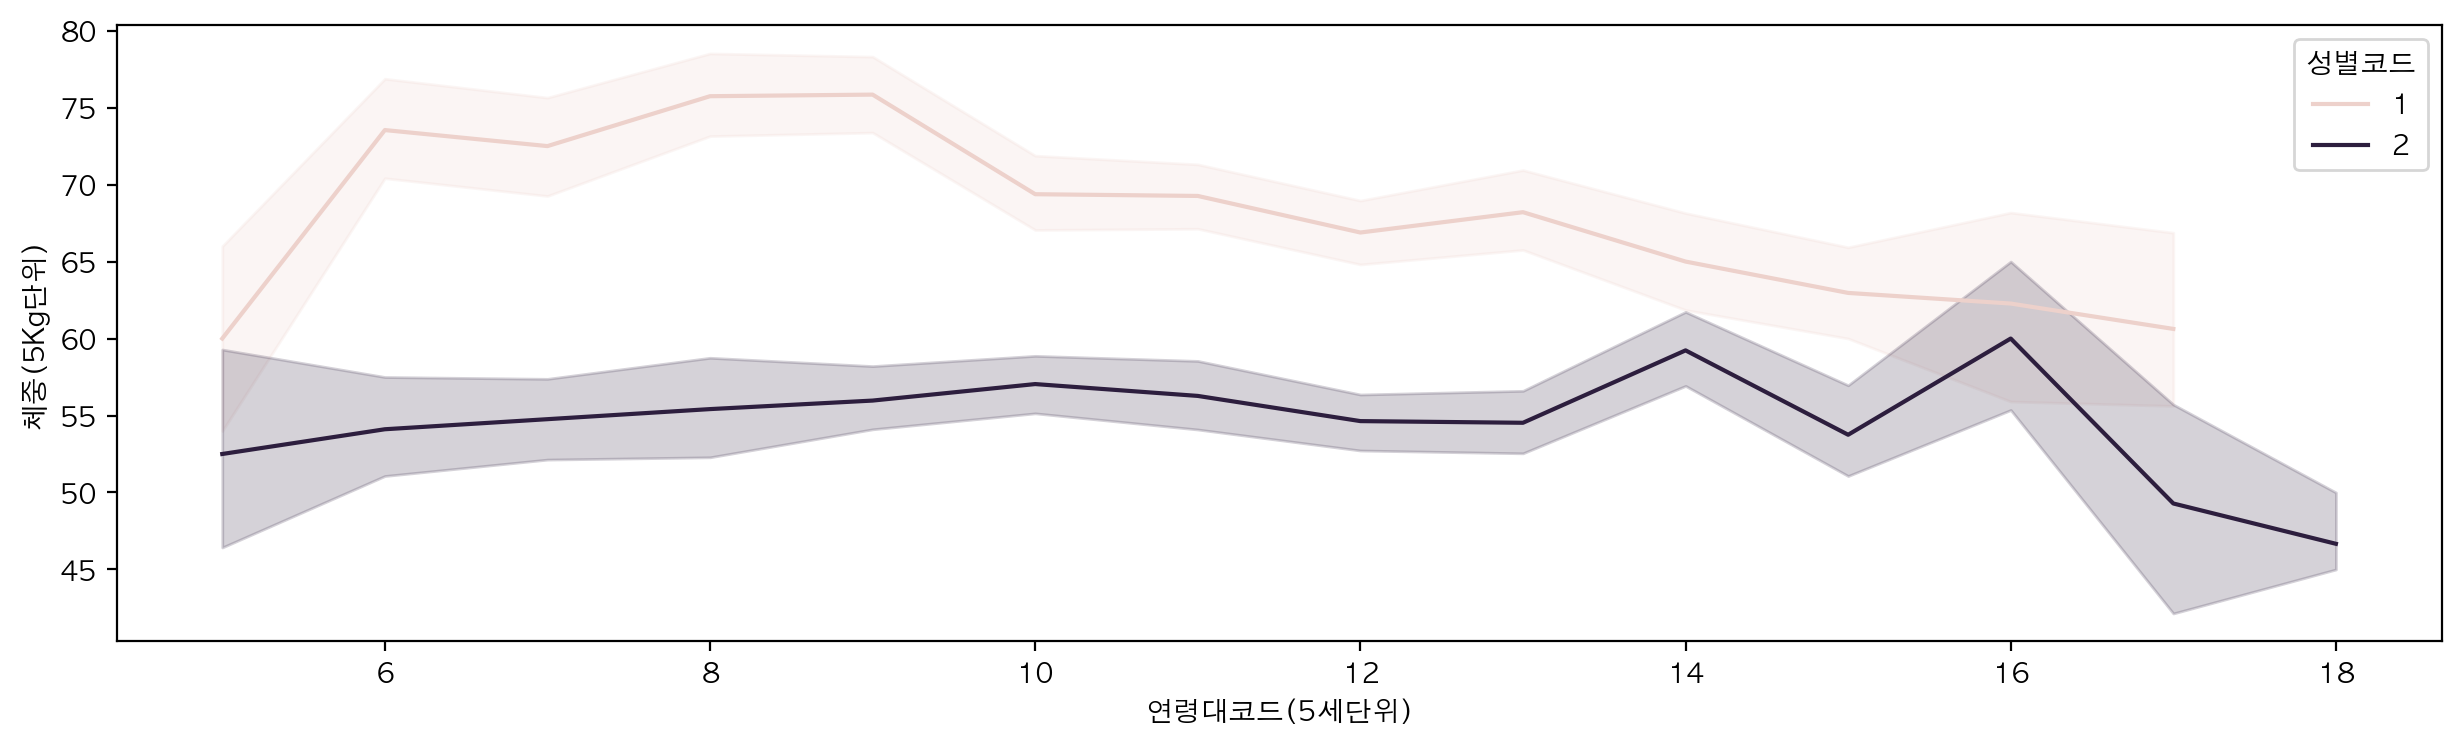

In [93]:
# 연령대코드(5세단위)에 따른 체중(5Kg단위)을 성별코드에 따라 lineplot으로 그리기
plt.figure(figsize=(15,4))
sns.lineplot(data=df_sample, x='연령대코드(5세단위)', y='체중(5Kg단위)', hue='성별코드', errorbar=('ci', 95))

<AxesSubplot: xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

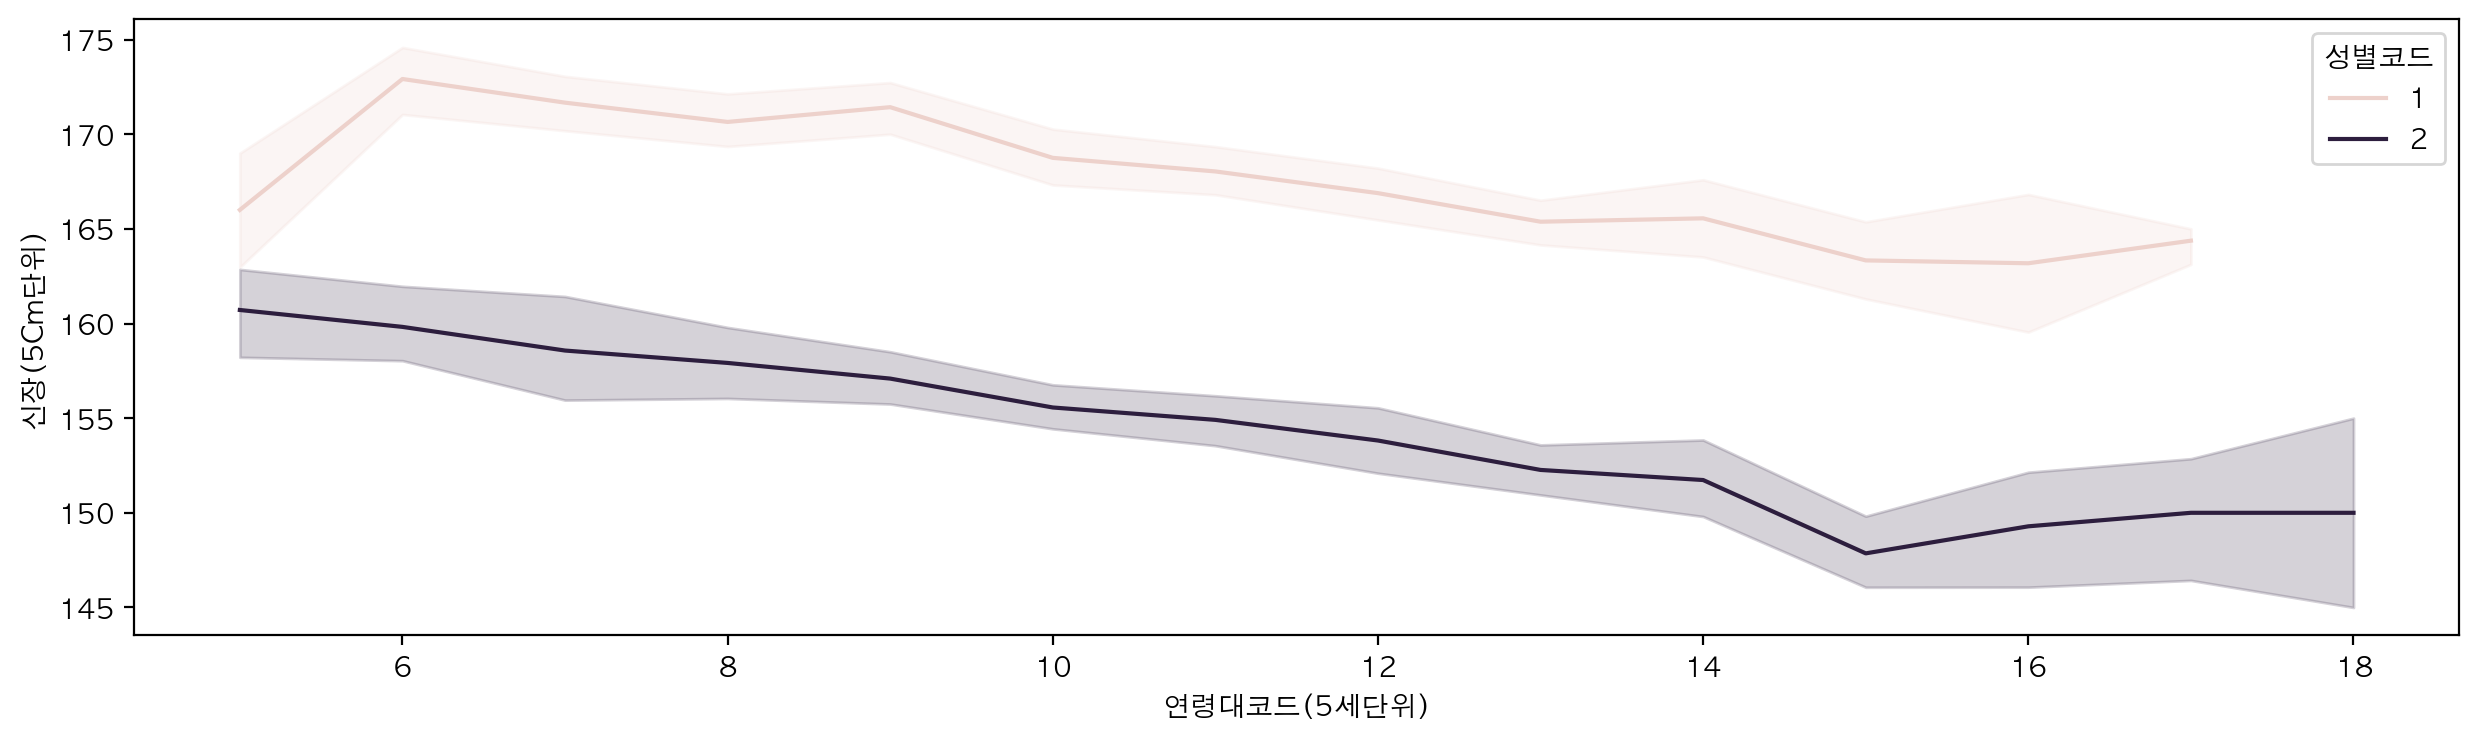

In [94]:
# 연령대코드(5세단위)에 따른 신장(5Cm단위)을 성별코드에 따라 lineplot으로 그리기
plt.figure(figsize=(15,4))
sns.lineplot(data=df_sample, x='연령대코드(5세단위)', y='신장(5Cm단위)', hue='성별코드', errorbar=('ci', 95))

<AxesSubplot: xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

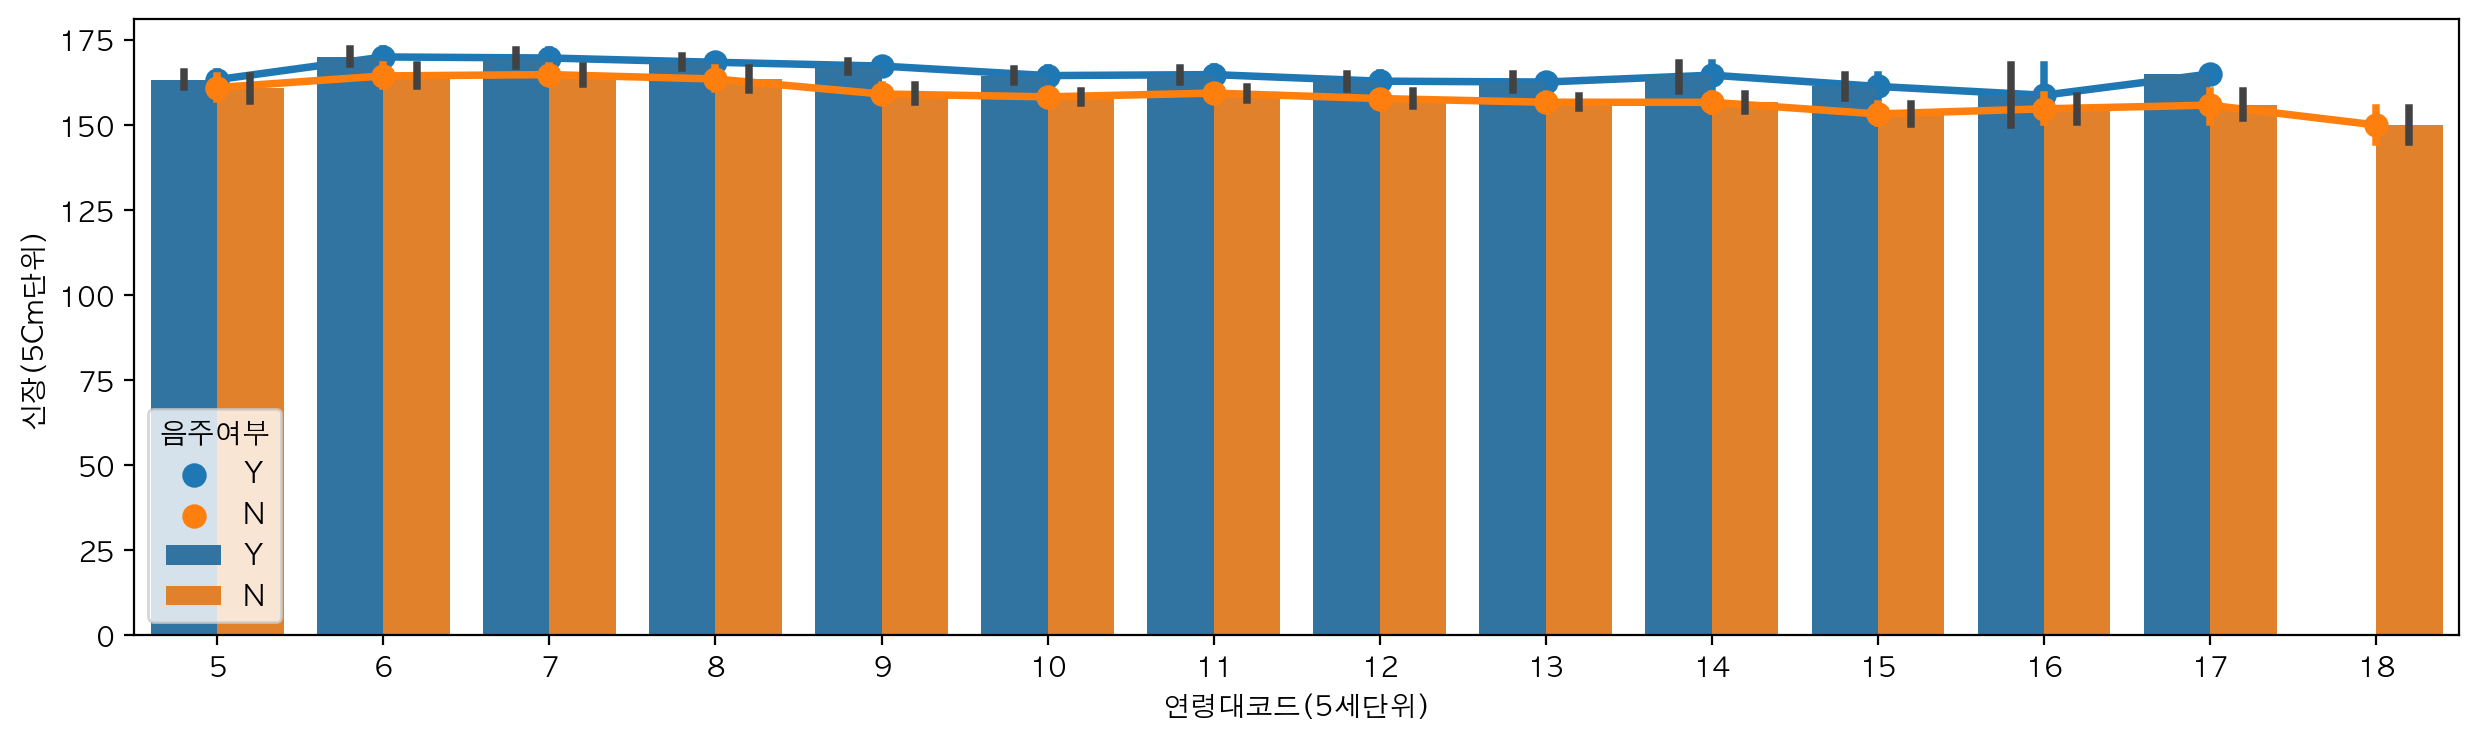

In [97]:
# 연령대코드(5세단위)에 따른 체중(5Kg단위)을 음주여부에 따라 pointplot과 barplot으로 그리기
plt.figure(figsize=(15,4))
sns.pointplot(data=df_sample, x='연령대코드(5세단위)', y='신장(5Cm단위)', hue='음주여부', errorbar=('ci', 95))
sns.barplot(data=df_sample, x='연령대코드(5세단위)', y='신장(5Cm단위)', hue='음주여부', errorbar=('ci', 95))

<AxesSubplot: xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

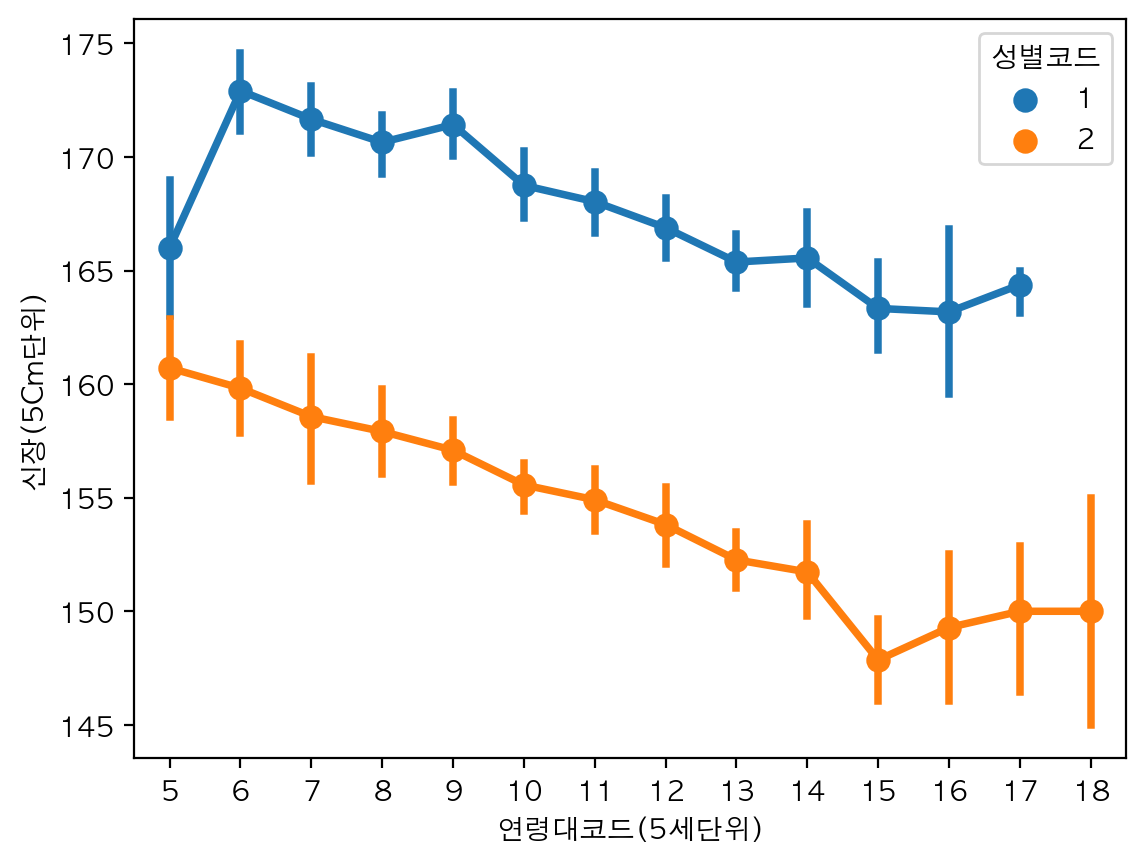

In [98]:
# 연령대코드(5세단위)에 따른 신장(5Cm단위)을 성별코드에 따라 pointplot으로 그리기
sns.pointplot(data=df_sample, x='연령대코드(5세단위)', y='신장(5Cm단위)', hue='성별코드', errorbar=('ci', 95))

<AxesSubplot: xlabel='연령대코드(5세단위)', ylabel='혈색소'>

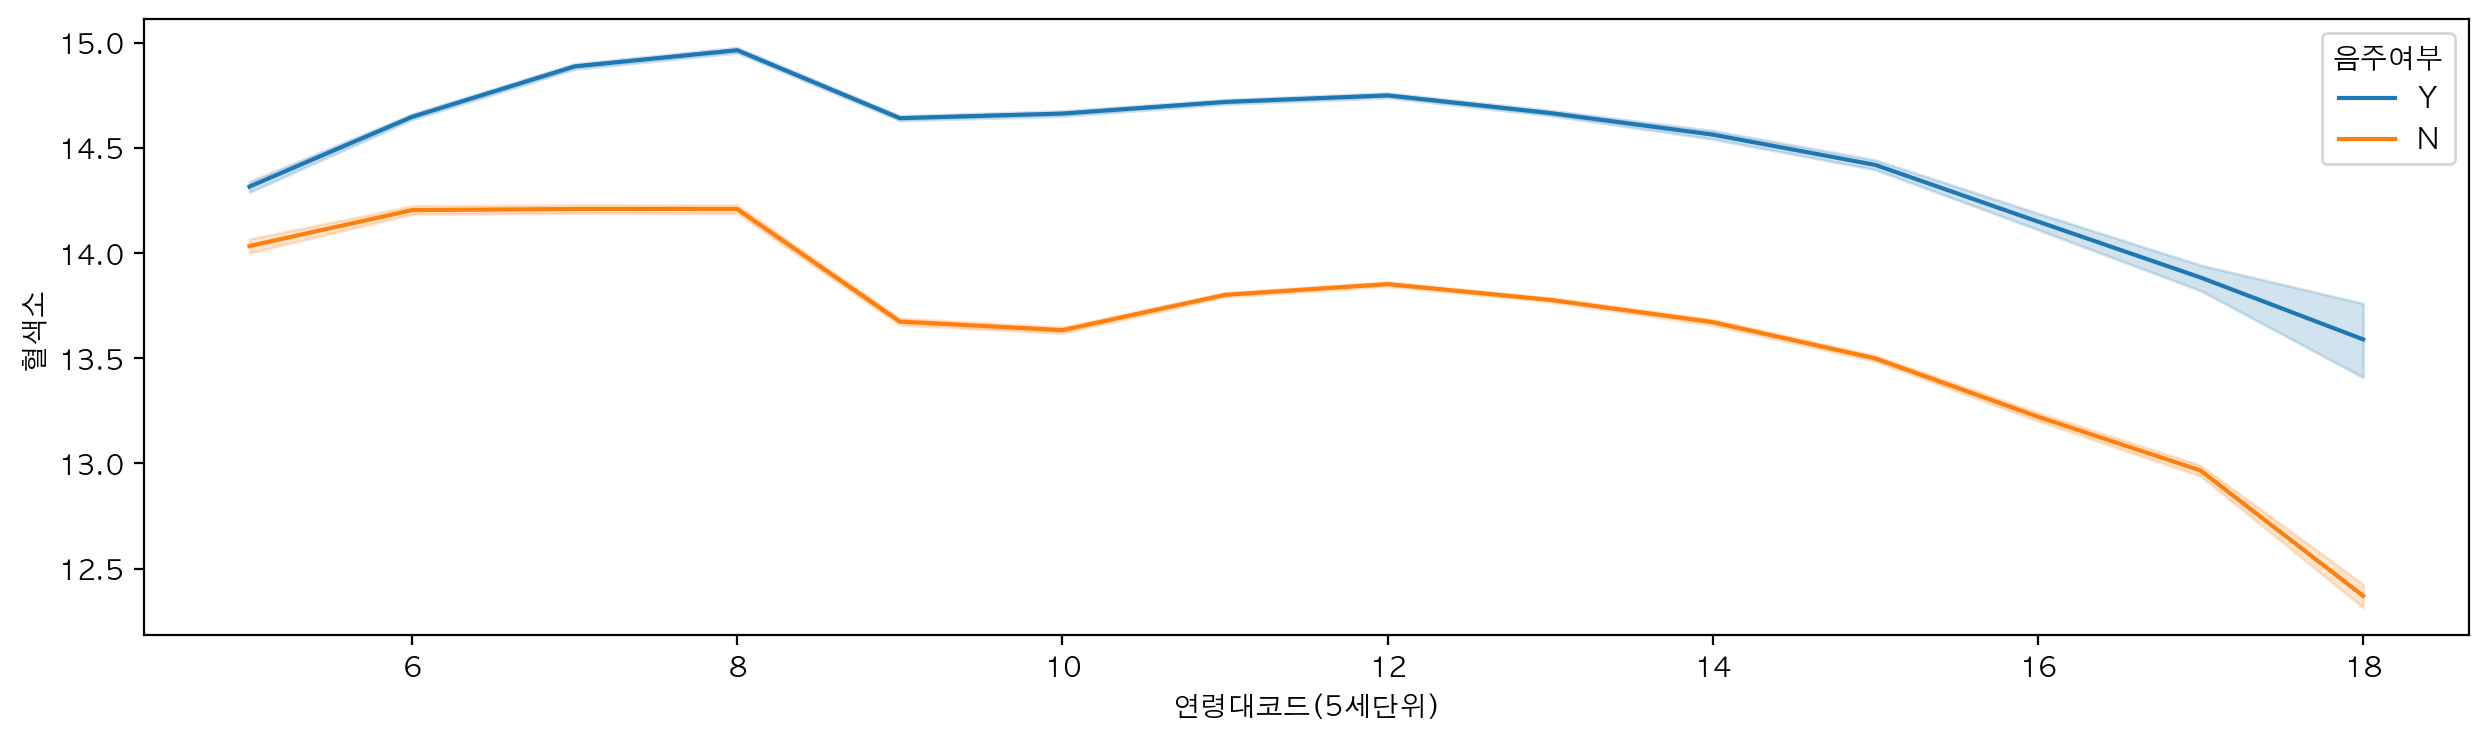

In [100]:
# 연령대코드(5세단위)에 따른 혈색소를 음주여부에 따라 lineplot으로 그리기
plt.figure(figsize=(15,4))
sns.lineplot(data=df, x='연령대코드(5세단위)', y='혈색소', hue='음주여부')

## boxplot

<AxesSubplot: xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

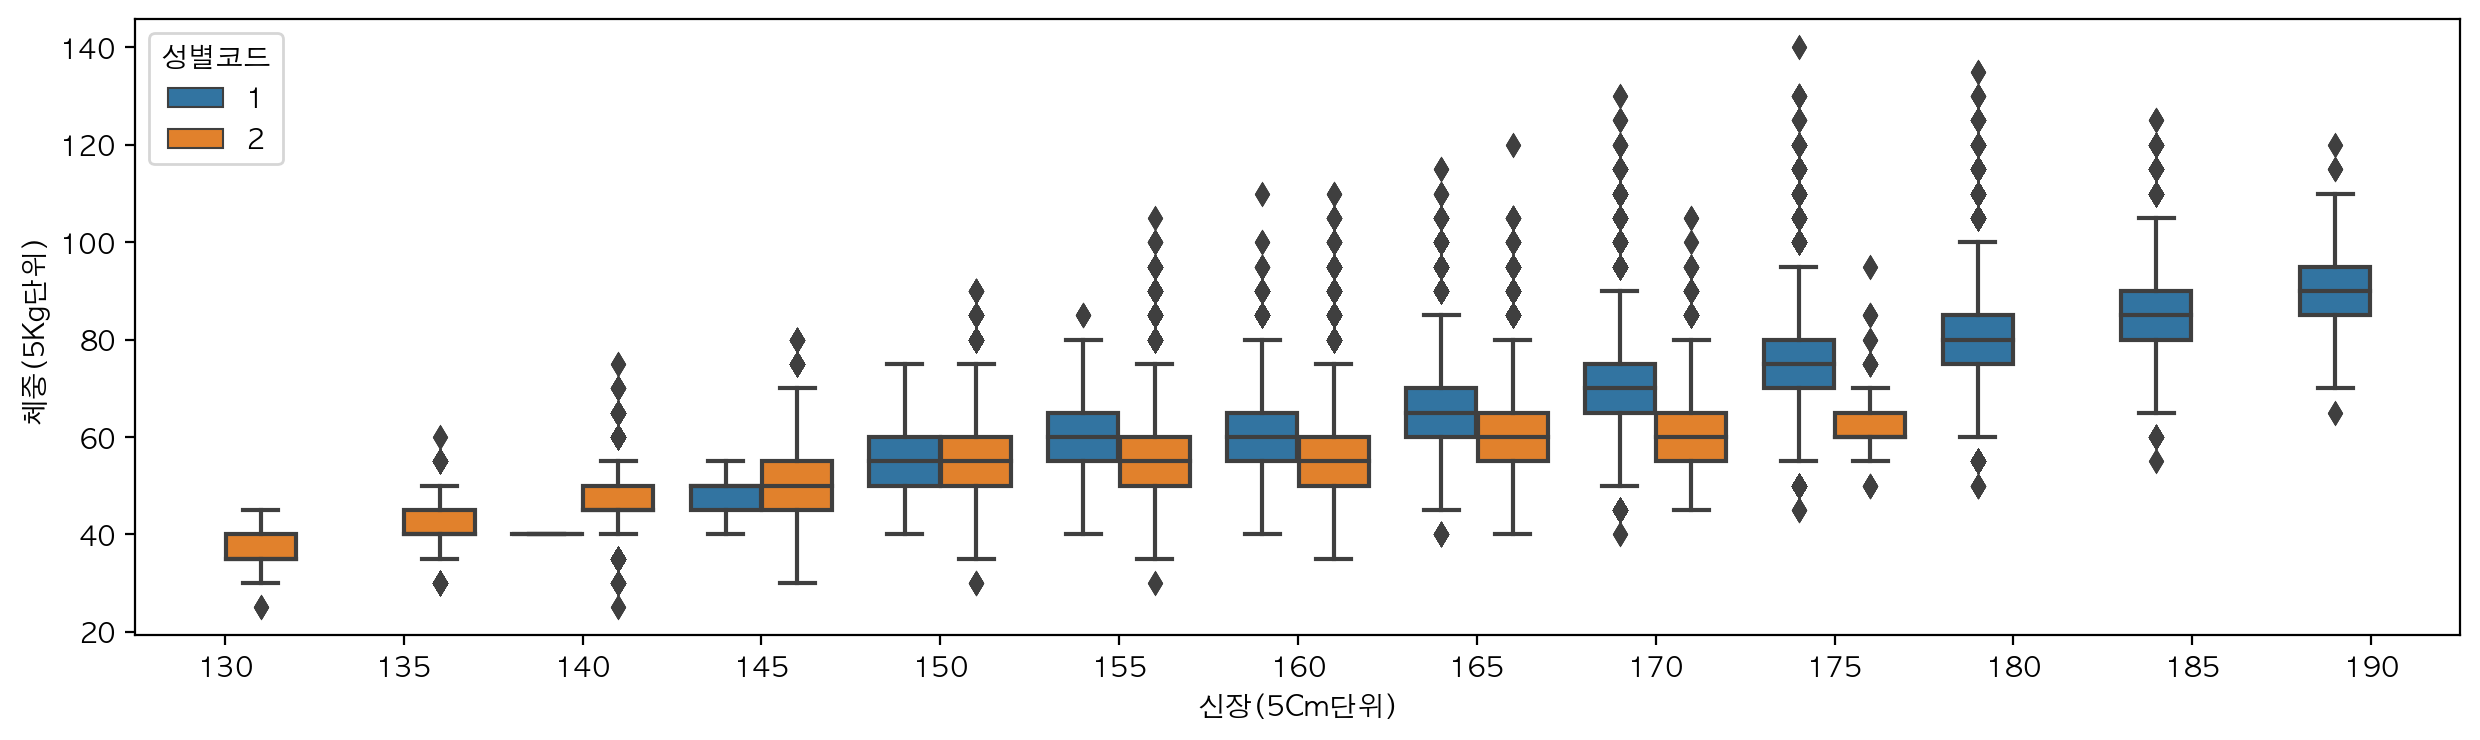

In [102]:
# boxplot으로 신장(5Cm단위)에 따른 체중(5Kg단위)을 그리고,
# 성별코드에 따라 다른 색상으로 표현
plt.figure(figsize=(15,4))
sns.boxplot(data=df, x='신장(5Cm단위)', y='체중(5Kg단위)', hue='성별코드')

## violinplot

<AxesSubplot: xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

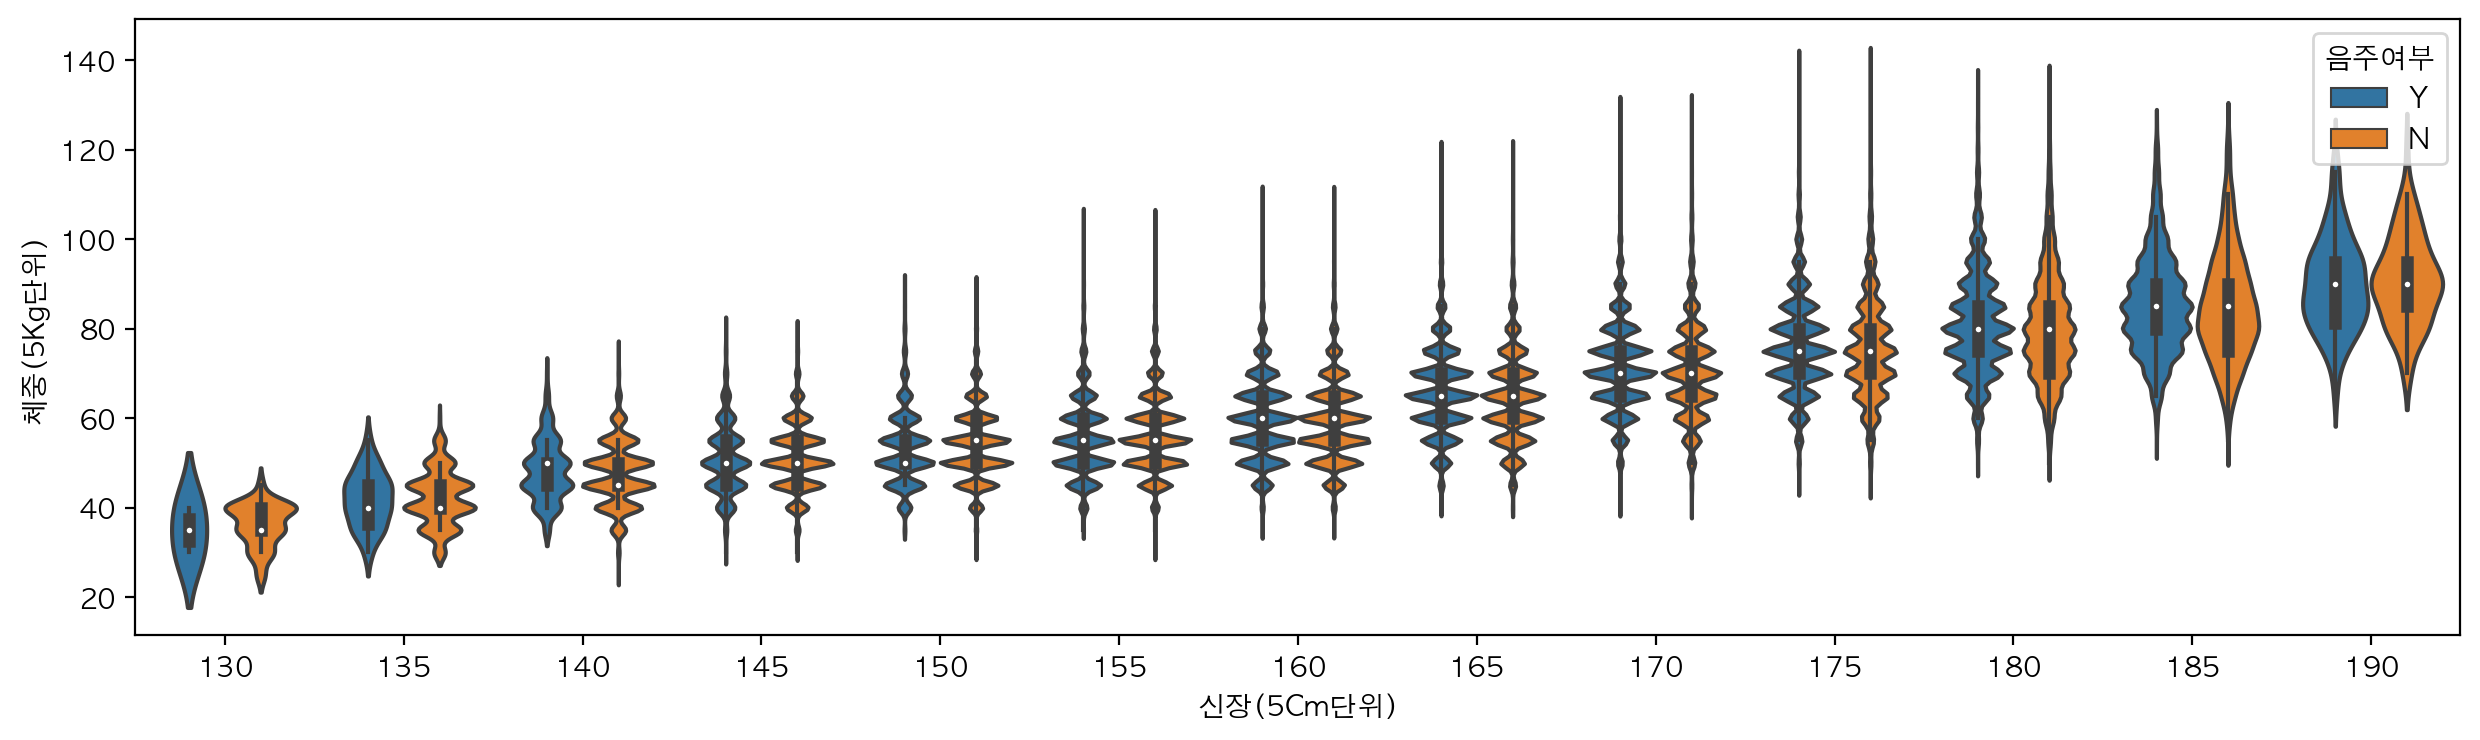

In [103]:
# violinplot으로 신장(5Cm단위)에 따른 체중(5Kg단위)을 그리고,
# 음주여부에 따라 다른 색상으로 표현
plt.figure(figsize=(15,4))
sns.violinplot(data=df, x='신장(5Cm단위)', y='체중(5Kg단위)', hue='음주여부')

<AxesSubplot: xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

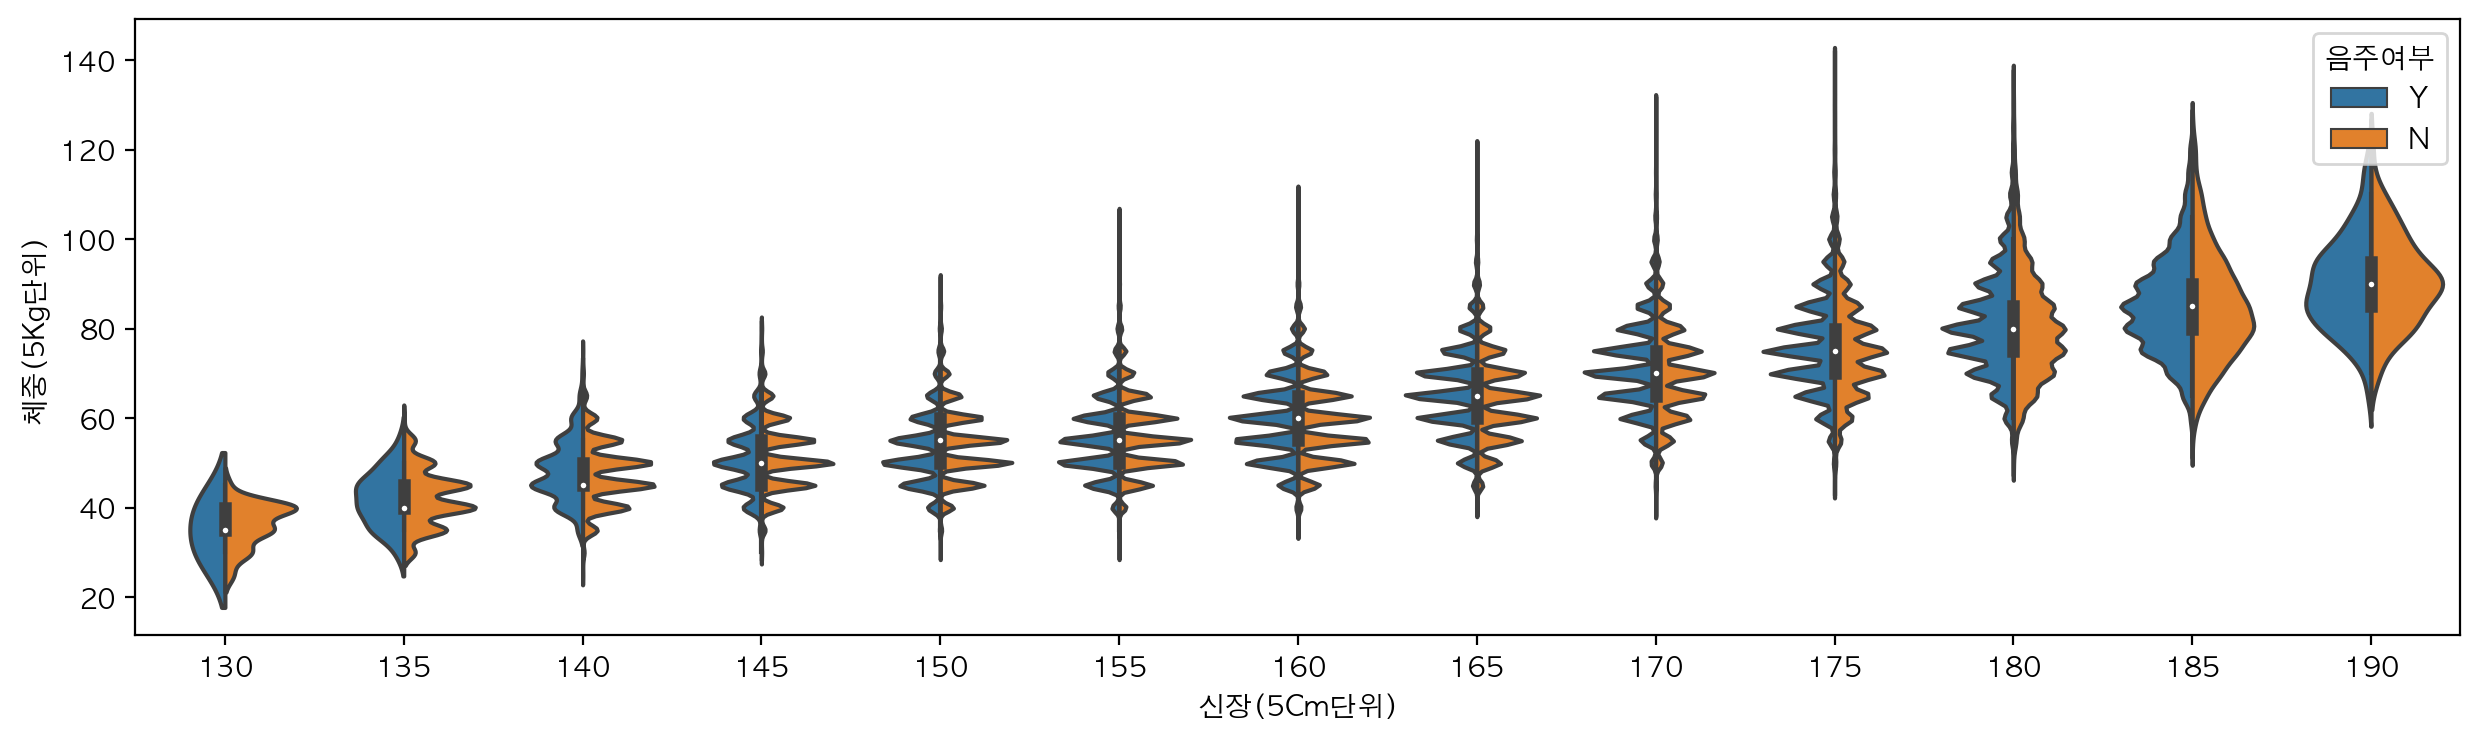

In [104]:
# violinplot의 split기능
plt.figure(figsize=(15,4))
sns.violinplot(data=df, x='신장(5Cm단위)', y='체중(5Kg단위)', hue='음주여부', split=True)

<AxesSubplot: xlabel='연령대코드(5세단위)', ylabel='혈색소'>

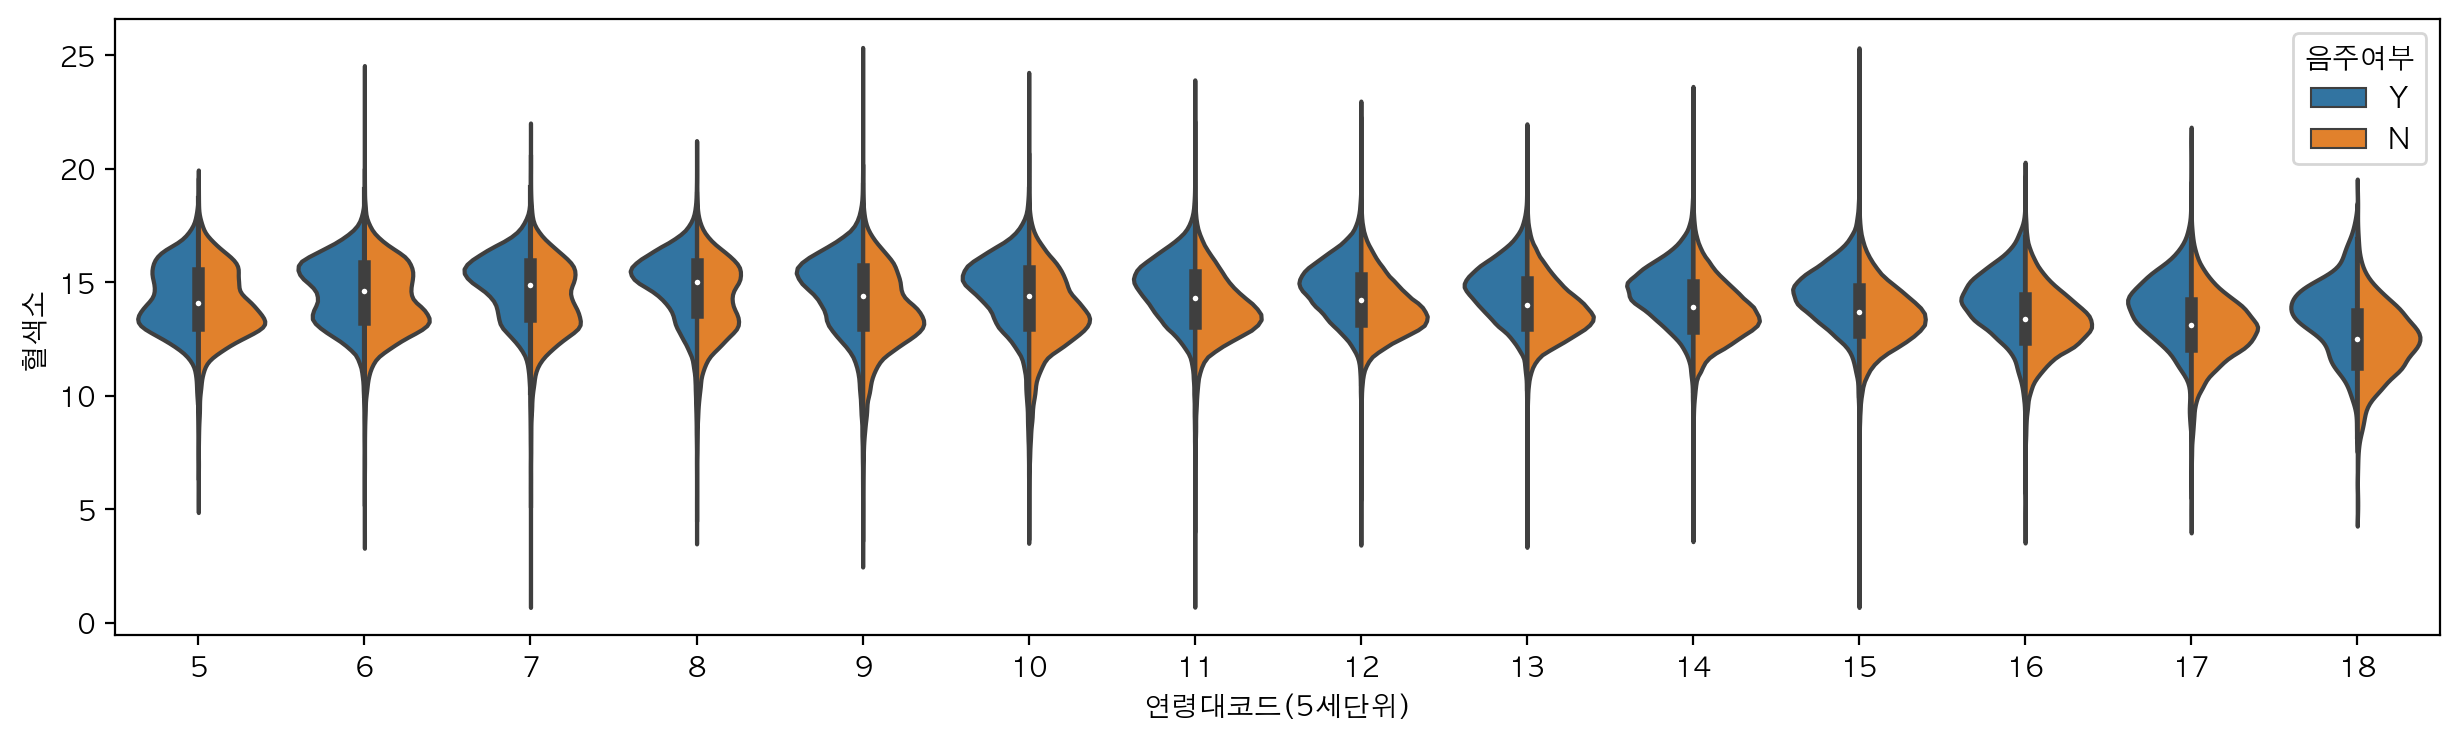

In [105]:
# 연령대코드(5세단위)에 따른 혈색소를 음주여부에 따라 violinplot으로
plt.figure(figsize=(15,4))
sns.violinplot(data=df, x='연령대코드(5세단위)', y='혈색소', hue='음주여부', split=True)

## swarm plot
* 범주형 데이터를 산점도로 시각화하고자 할 때

/Users/sky/.pyenv/versions/3.10.5/lib/python3.10/site-packages/seaborn/categorical.py:3543: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sky/.pyenv/versions/3.10.5/lib/python3.10/site-packages/seaborn/categorical.py:3543: UserWarning: 36.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sky/.pyenv/versions/3.10.5/lib/python3.10/site-packages/seaborn/categorical.py:3543: UserWarning: 43.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sky/.pyenv/versions/3.10.5/lib/python3.10/site-packages/seaborn/categorical.py:3543: UserWarning: 48.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sky/.pyenv/version

<AxesSubplot: xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

/Users/sky/.pyenv/versions/3.10.5/lib/python3.10/site-packages/seaborn/categorical.py:3543: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sky/.pyenv/versions/3.10.5/lib/python3.10/site-packages/seaborn/categorical.py:3543: UserWarning: 36.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sky/.pyenv/versions/3.10.5/lib/python3.10/site-packages/seaborn/categorical.py:3543: UserWarning: 43.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sky/.pyenv/versions/3.10.5/lib/python3.10/site-packages/seaborn/categorical.py:3543: UserWarning: 48.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/sky/.pyenv/version

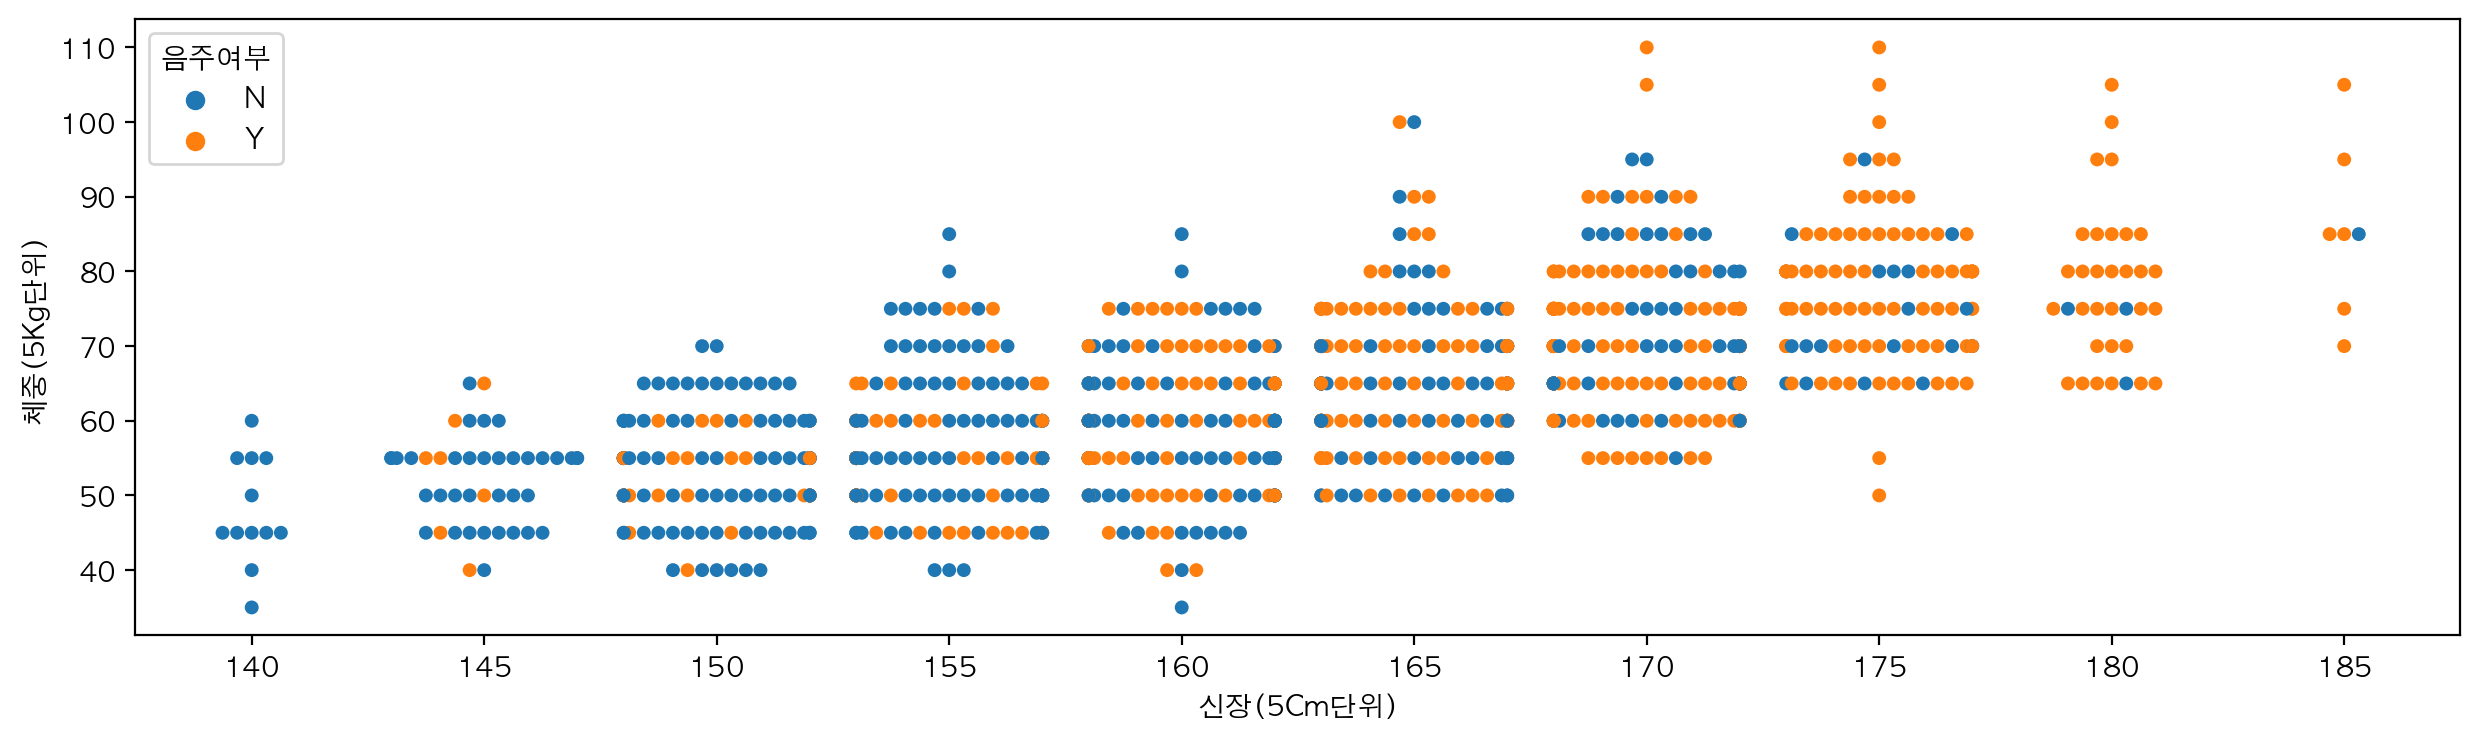

In [112]:
# 점을 하나씩 찍기 떄문에 전체 데이터보다는 일부를 먼저 그려본다.
plt.figure(figsize=(15,4))
sns.swarmplot(data=df_sample, x='신장(5Cm단위)', y='체중(5Kg단위)', hue='음주여부')

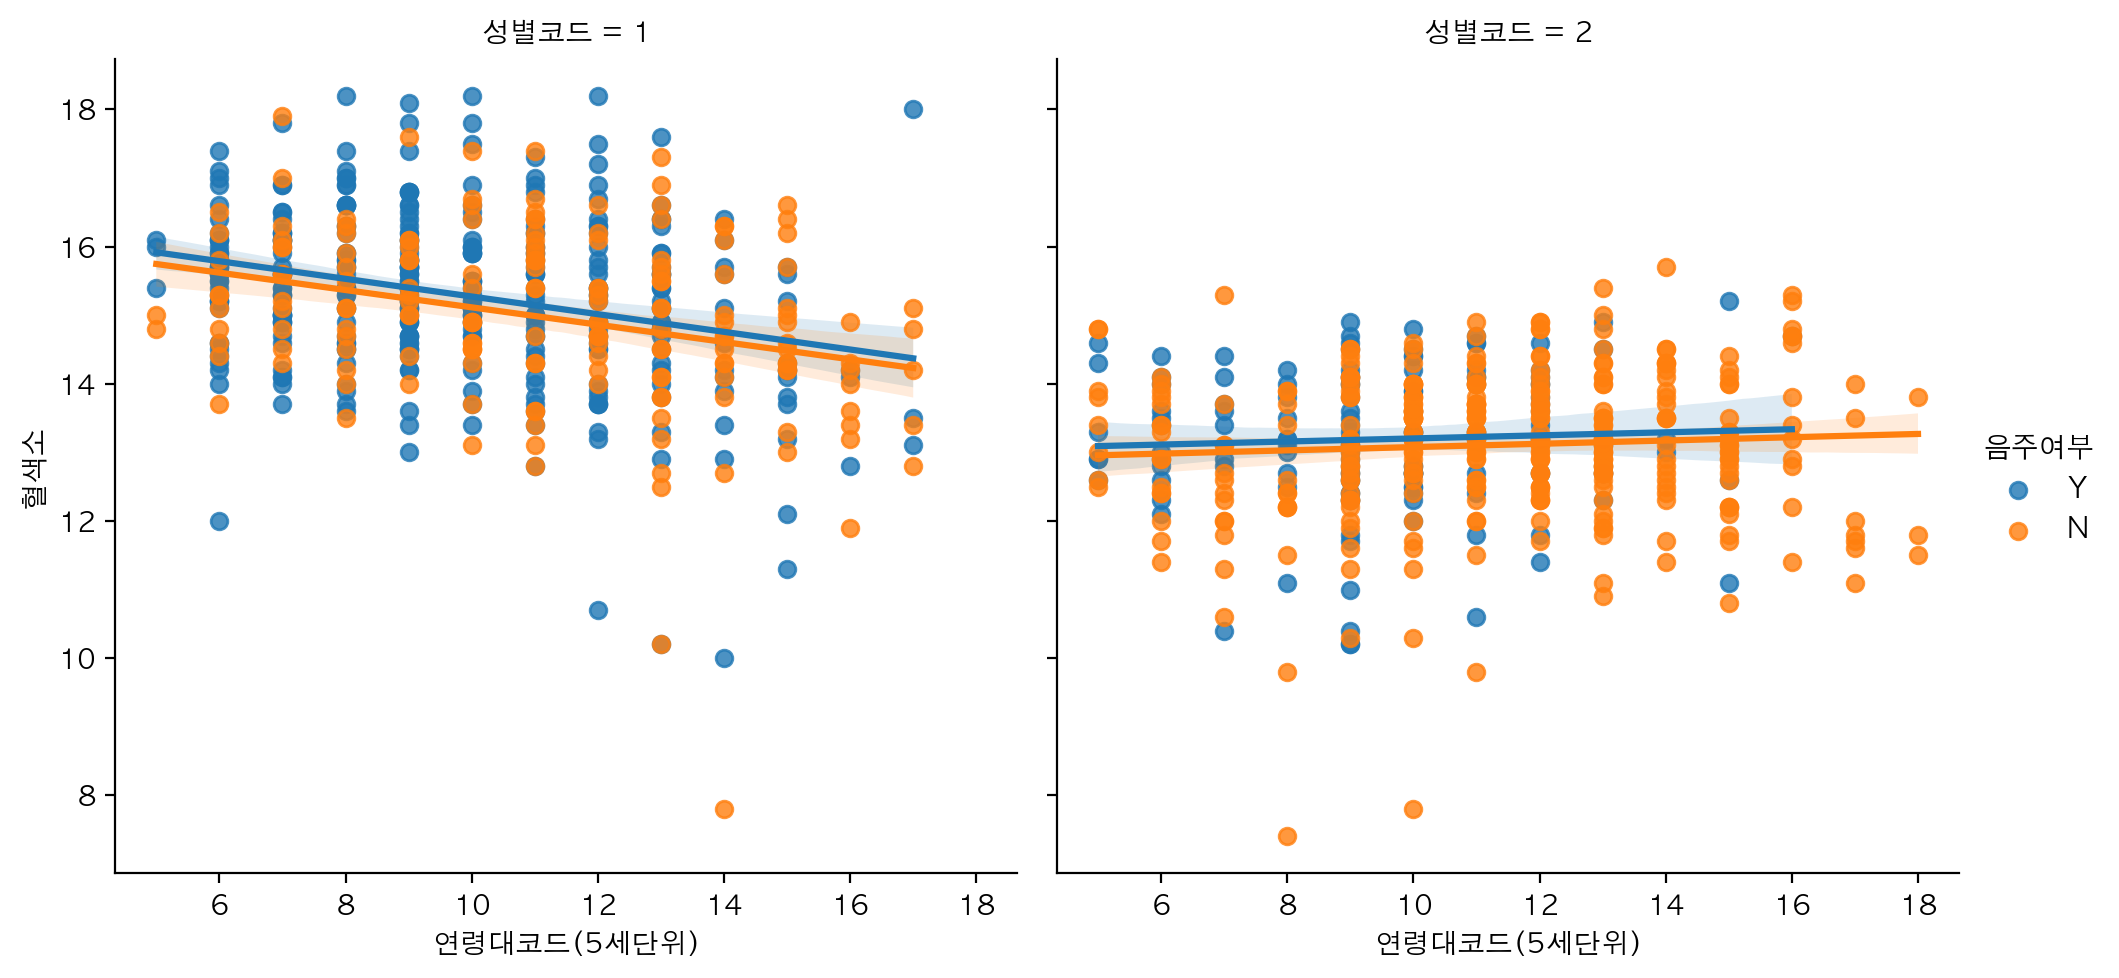

In [114]:
# lmplot
sns.lmplot(data=df_sample, x='연령대코드(5세단위)', y='혈색소', hue='음주여부', col='성별코드')

# 수치형 데이터 시각화

## scatterplot - 산점도
* 수치형 vs 수치형 데이터의 상관관계를 확인할 때
* 점의 크기를 수치에 따라 다르게 볼 수 있다.

<AxesSubplot: xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

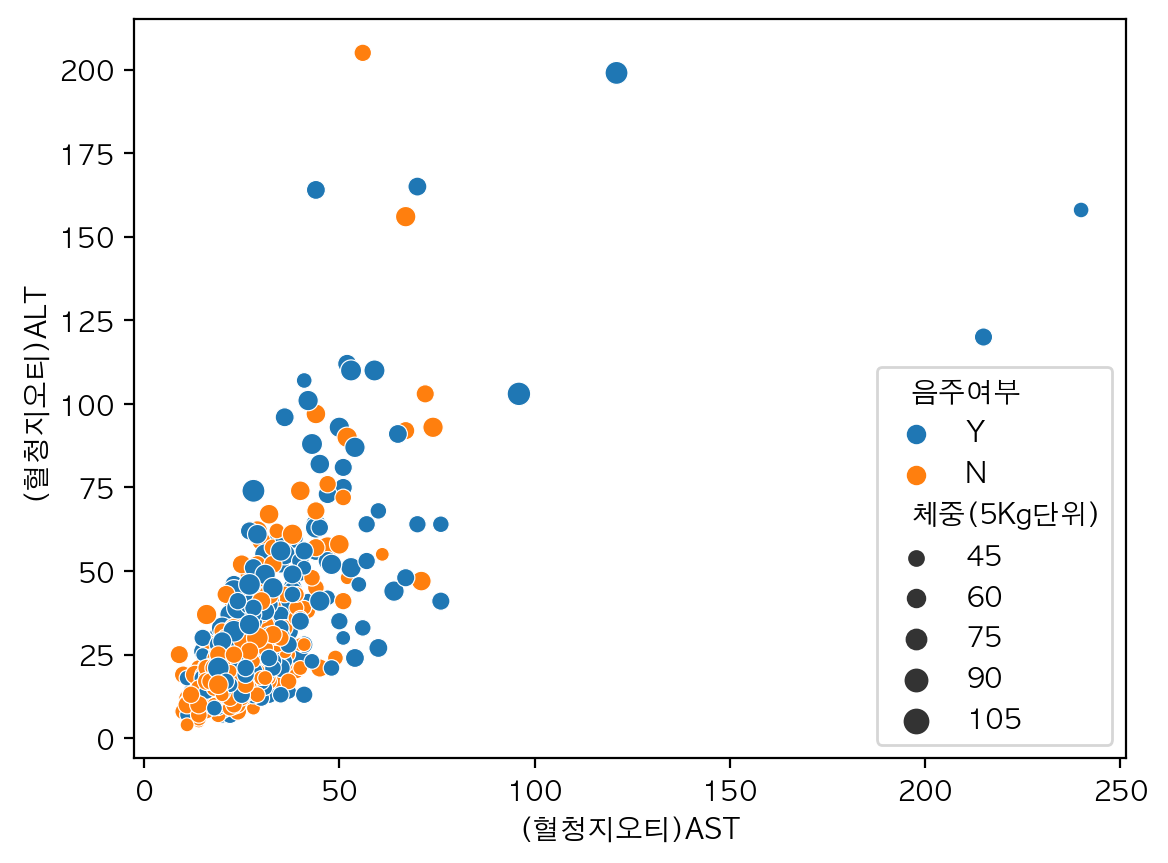

In [117]:
# scatterplot으로 "(혈청지오티)AST", "(혈청지오티)ALT"를
# 음주여부에 따라 다른 색상으로 표현
sns.scatterplot(data=df_sample, x='(혈청지오티)AST', y='(혈청지오티)ALT', hue='음주여부', 
                size='체중(5Kg단위)')

## lmplot - 상관관계확인


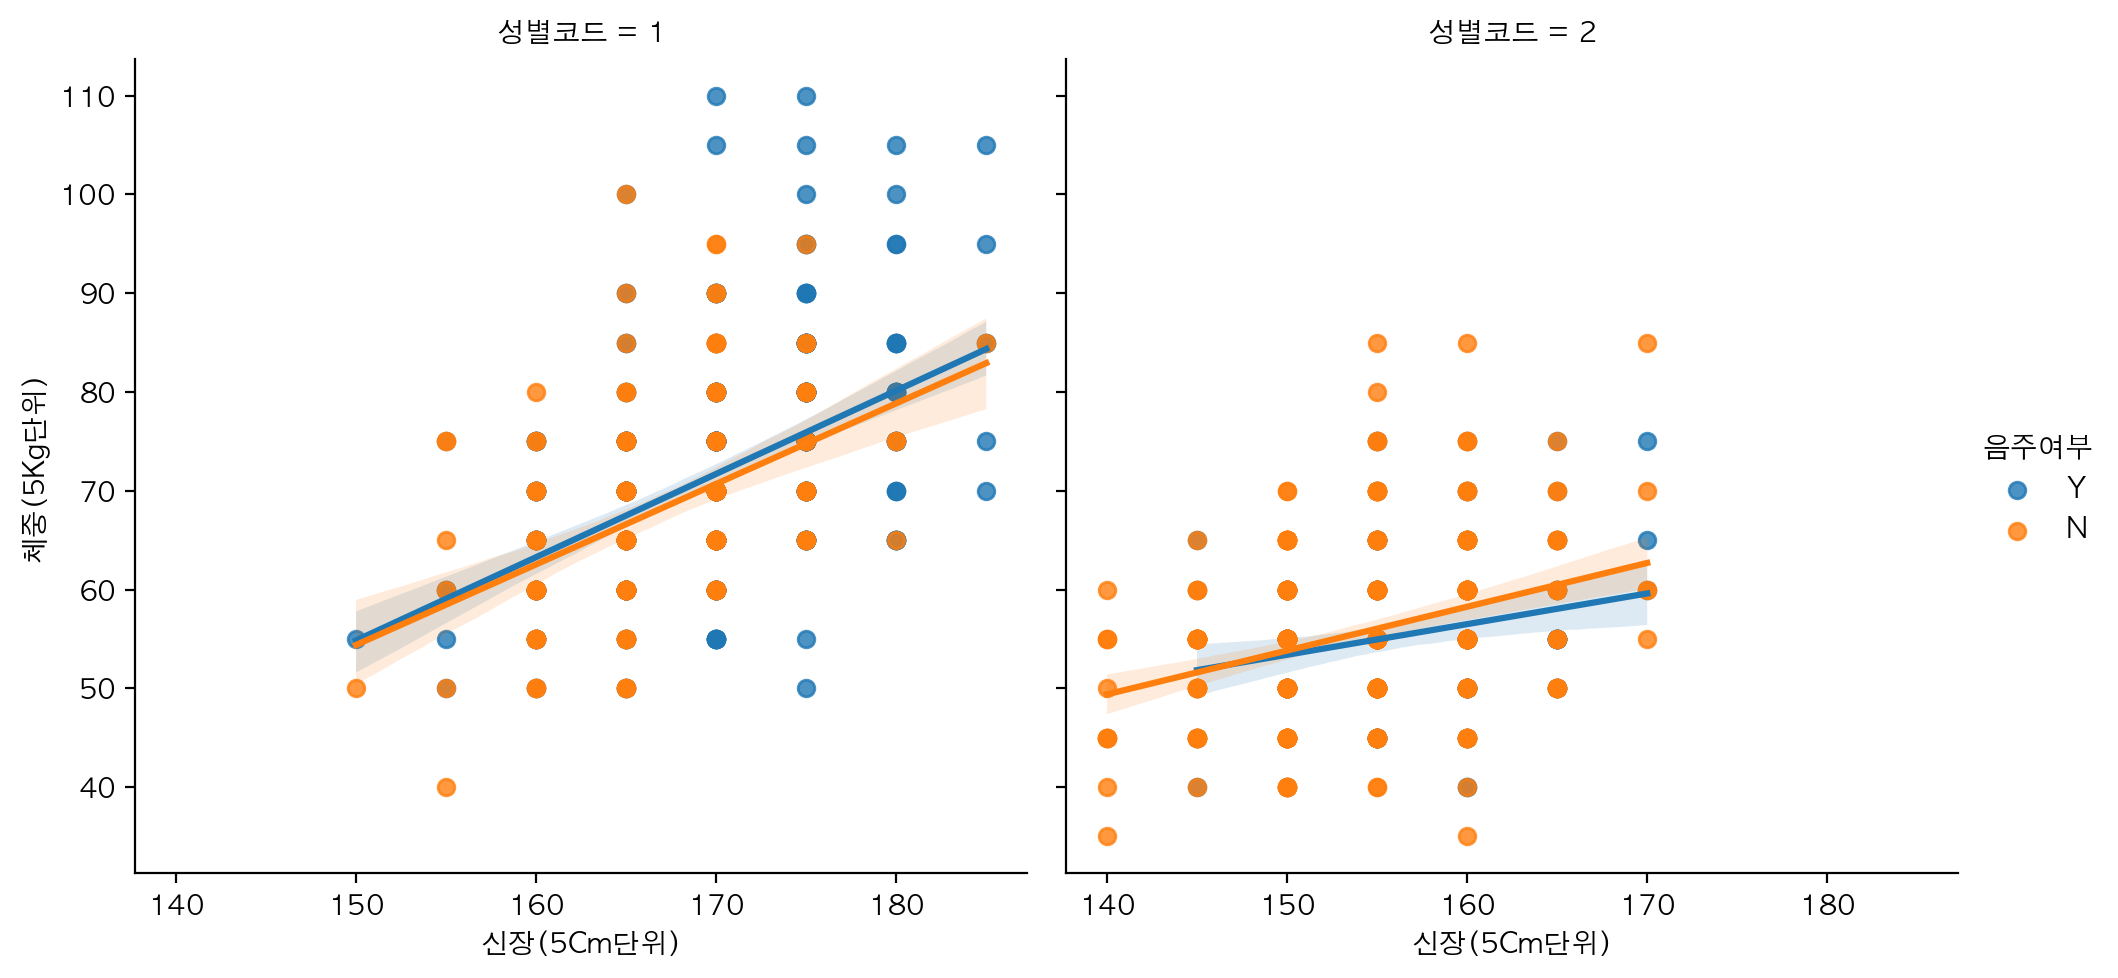

In [123]:
# lmplot, 신장(5Cm단위)에 따른 체중(5Kg단위)를 그리고
# 음주여부에 따라, 다른 색상으로 표현
sns.lmplot(data=df_sample, x='신장(5Cm단위)', y='체중(5Kg단위)', hue='음주여부', col='성별코드')

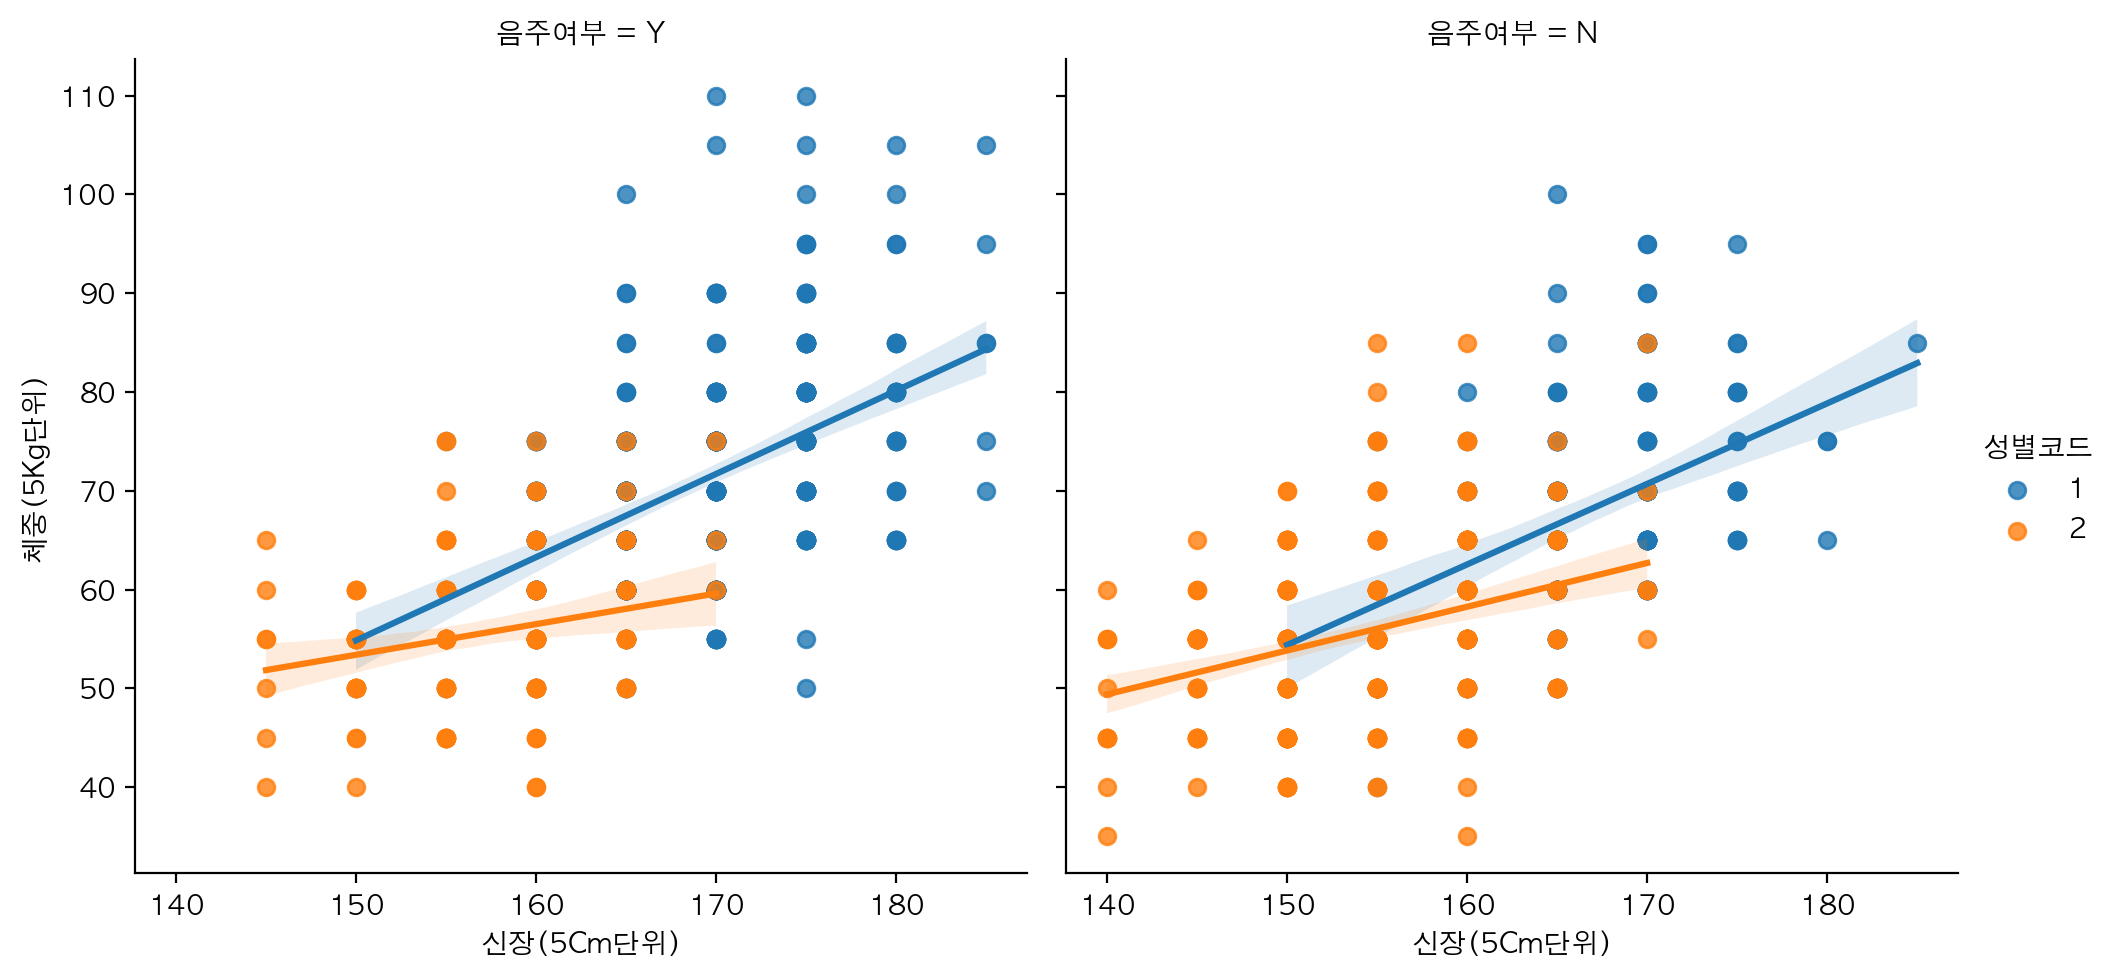

In [125]:
# lmplot의 col기능을 통해 음주여부에 따라 서브플롯을 작성해보기
sns.lmplot(data=df_sample, x='신장(5Cm단위)', y='체중(5Kg단위)', hue='성별코드', col='음주여부')

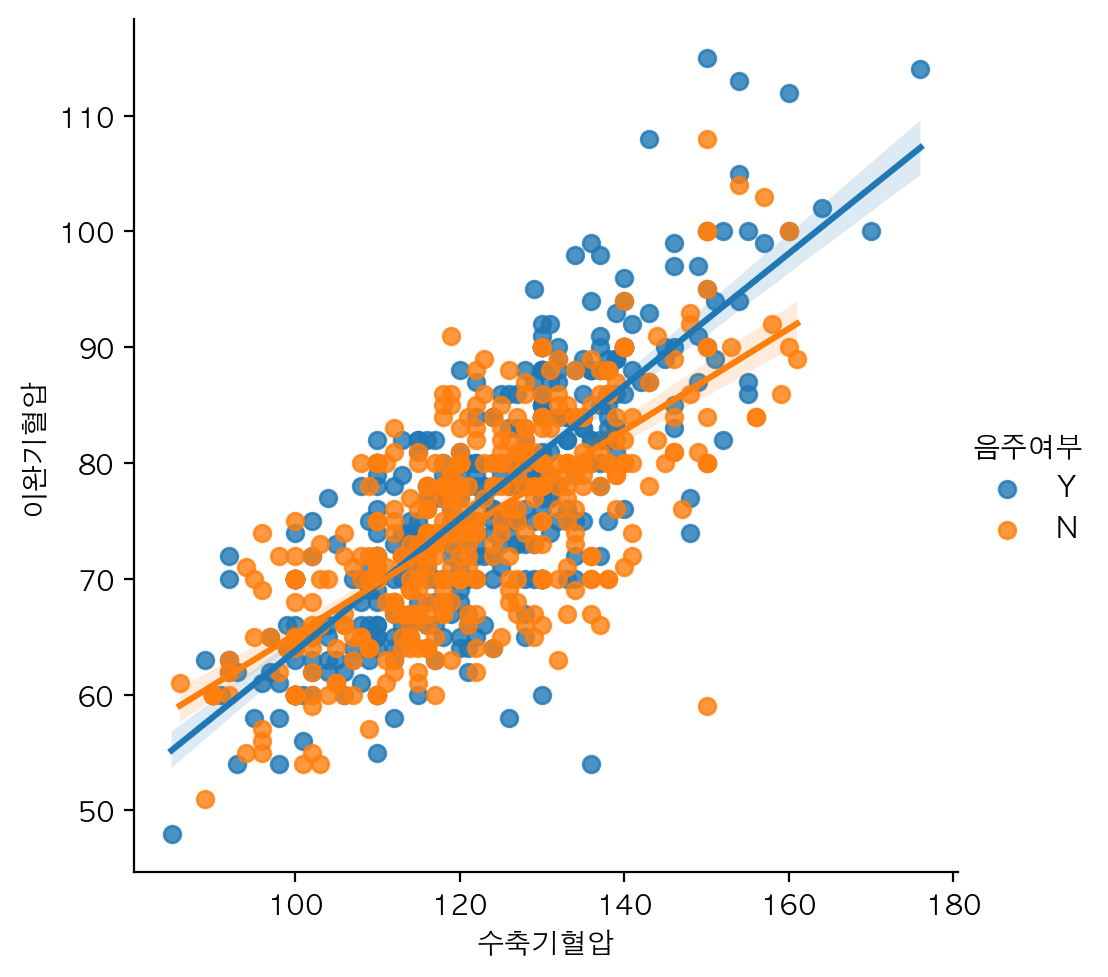

In [127]:
# lmplot으로 수축기, 이완기혈압을 그리고 음주여부에 따라 다른 색상으로 표현
sns.lmplot(data=df_sample, x='수축기혈압', y='이완기혈압', hue='음주여부')

(<seaborn.axisgrid.FacetGrid at 0x28fe747c0>,)

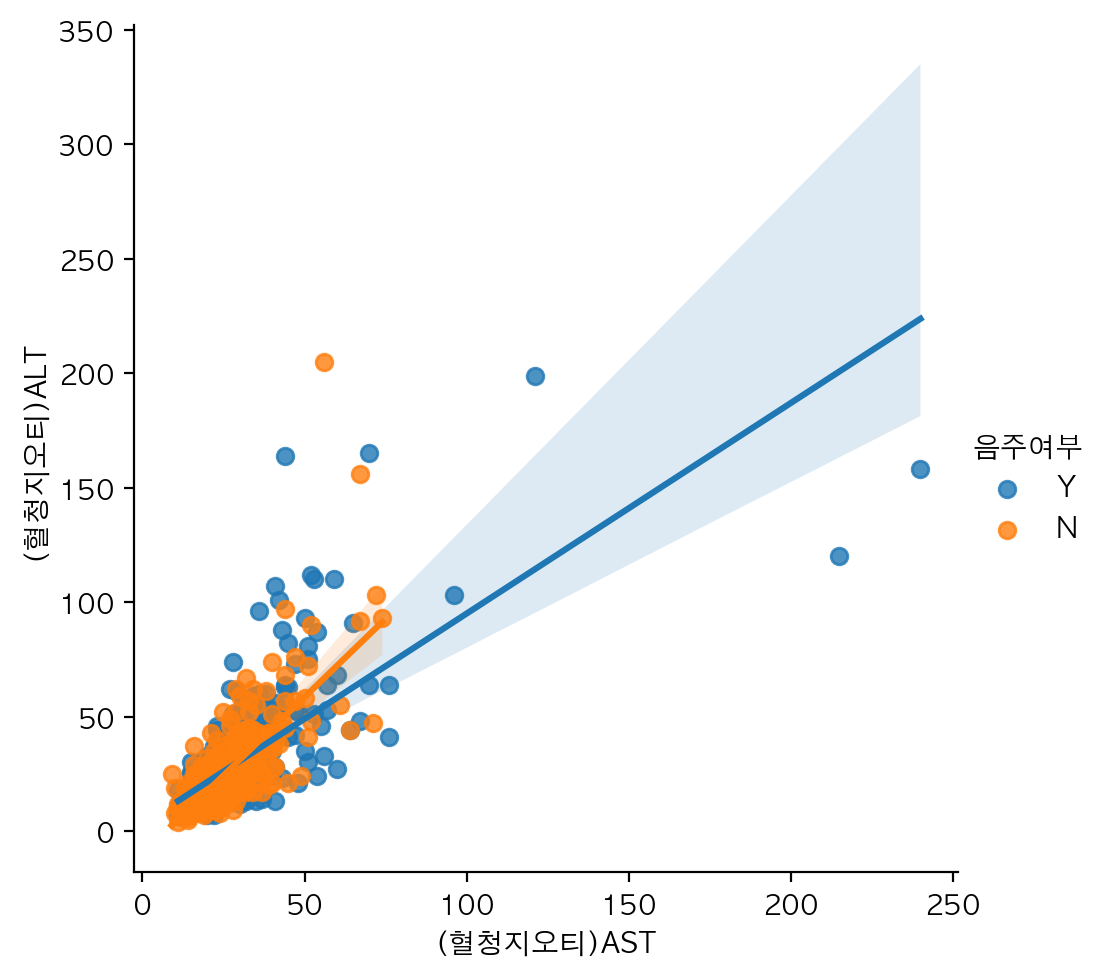

In [132]:
# lmplot으로 '(혈청지오티)AST', '(혈청지오티)ALT'를 그리고
# 음주여부에 따라 다른 색상으로 표현
sns.lmplot(data=df_sample, x='(혈청지오티)AST', y='(혈청지오티)ALT', hue='음주여부'),

## 이상치 다루기

In [140]:
# '(혈청지오티)AST', '(혈청지오티)ALT'가 400이하인 값만 데이터프레임 형태로 추출해서
# df_ASLT라는 변수에 담기
df_ASLT = df_sample[(df_sample['(혈청지오티)AST'] <= 400) & (df_sample['(혈청지오티)ALT'] <= 400)]
df_ASLT.head(1)

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  \
276826  2017   276827     1           12    41        160         55  77.0   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
276826    0.9    0.9  ...   38.0   3.0     Y         N      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석     데이터공개일자  
276826      NaN           NaN  NaN  2018-11-26  

[1 rows x 34 columns]

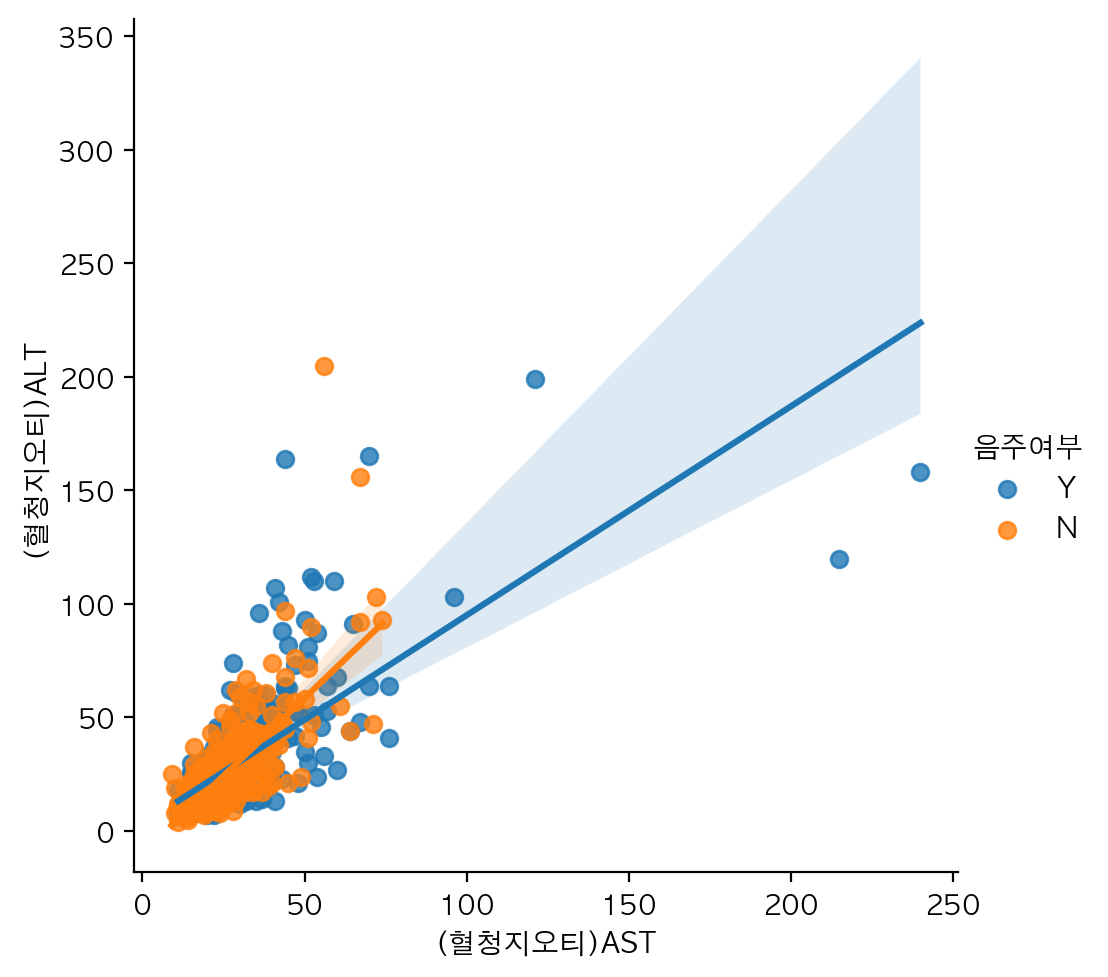

In [141]:
# 이상치를 제거한 df_ASLT 변수를 lmplot으로 그리고 
# 음주여부에 따라 다른색으로 표현
sns.lmplot(data=df_ASLT, x='(혈청지오티)AST', y='(혈청지오티)ALT', hue='음주여부')

In [149]:
# '(혈청지오티)AST', '(혈청지오티)ALT'가 400 초과인 값만 데이터프레임 형태로 추출해서
# df_ASLT_high라는 변수에 담기
df_ASLT_high = df[(df['(혈청지오티)AST'] > 400) | (df['(혈청지오티)ALT'] > 400)]
len(df_ASLT_high)

381

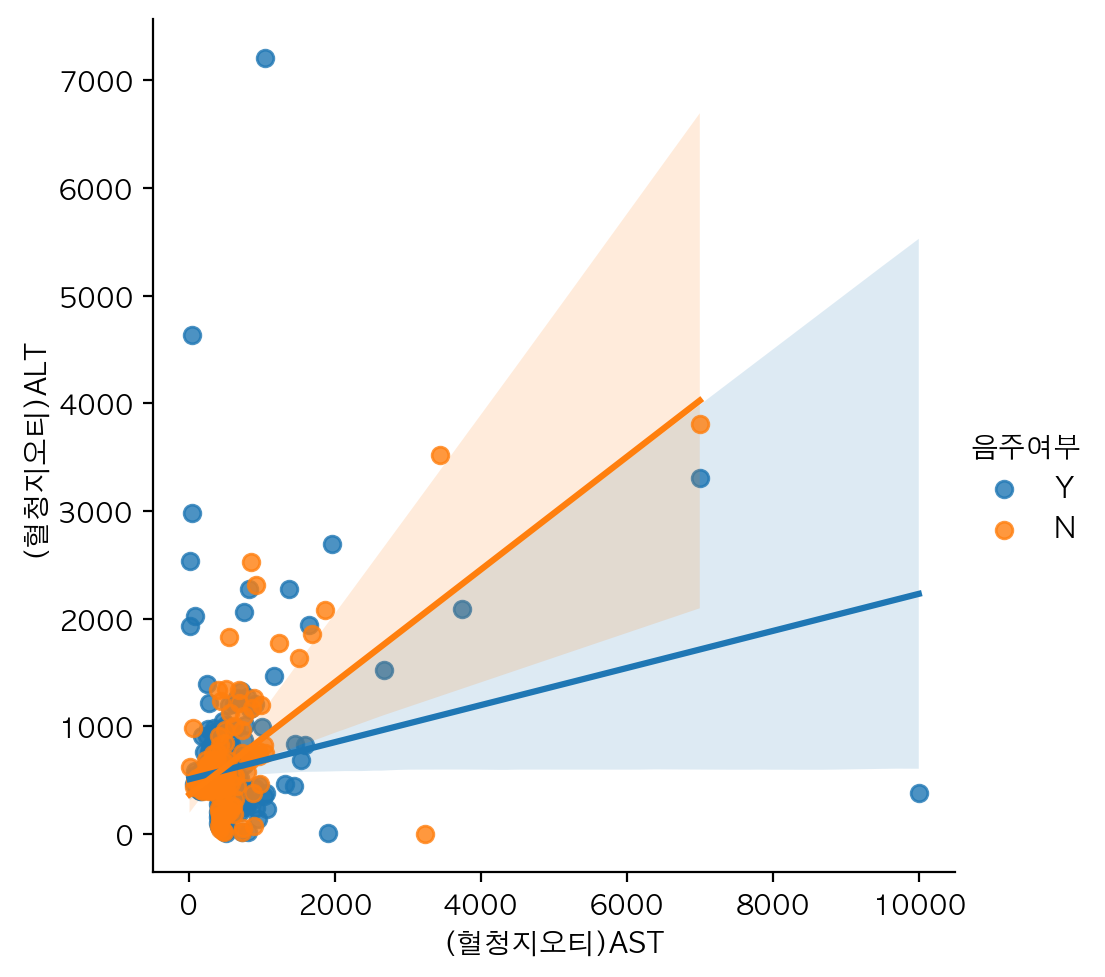

In [150]:
sns.lmplot(data=df_ASLT_high, x='(혈청지오티)AST', y='(혈청지오티)ALT', hue='음주여부')

In [156]:
df_ASLT_high_8000 = df_ASLT_high[df_ASLT_high['(혈청지오티)AST'] > 8000]
df_ASLT_high_8000.iloc[:, 10:27]

청력(좌)  청력(우)  수축기혈압  이완기혈압  식전혈당(공복혈당)  총콜레스테롤  트리글리세라이드  HDL콜레스테롤  \
541757    1.0    1.0   96.0   74.0        93.0   161.0      67.0      78.0   

        LDL콜레스테롤   혈색소  요단백  혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT  감마지티피  흡연상태 음주여부  
541757      69.0  15.4  1.0      1.2      9999.0       380.0  419.0   3.0    Y

## distplot

In [158]:
# 수치형 타입 컬럼을 찾기위해 컬럼명만 따로 출력
#df.columns
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)         int64
체중(5Kg단위)         int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부             object
구강검진수검여부         object
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석               object
데이터공개일자          object
dtype: object

In [176]:
df_chol = df.loc[df['총콜레스테롤'].notnull(), '총콜레스테롤']

In [177]:
df_chol.describe()

count    999957.000000
mean        195.548251
std          38.718205
min          30.000000
25%         169.000000
50%         193.000000
75%         219.000000
max        2344.000000
Name: 총콜레스테롤, dtype: float64

/var/folders/9s/t04w6g091zlcvn1bbhf9dj040000gn/T/ipykernel_20583/3455946144.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_chol, bins=100)


<AxesSubplot: xlabel='총콜레스테롤', ylabel='Density'>

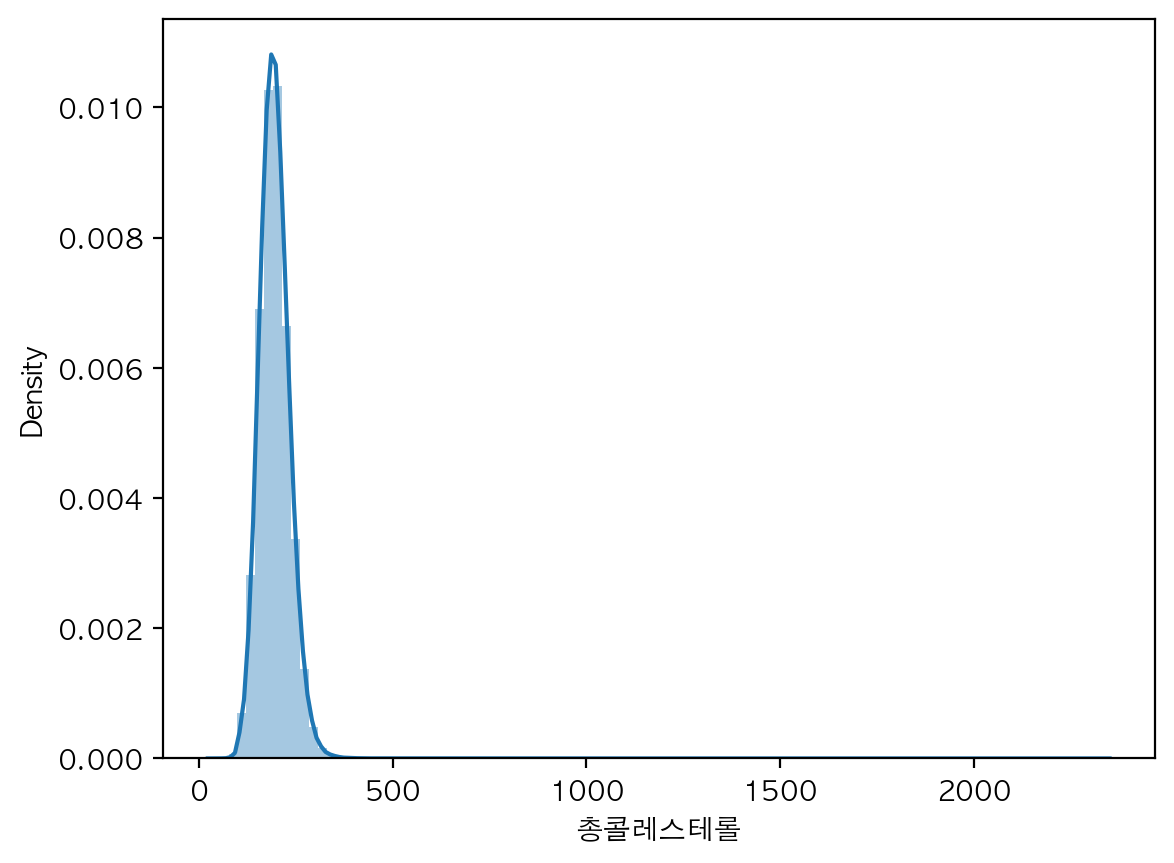

In [178]:
# 총콜레스테롤에 따른 displot
sns.distplot(df_chol, bins=100)

/var/folders/9s/t04w6g091zlcvn1bbhf9dj040000gn/T/ipykernel_20583/4275352245.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df['총콜레스테롤'].notnull() & (df['음주여부'] == 'Y'), '총콜레스테롤'])


<AxesSubplot: xlabel='총콜레스테롤', ylabel='Density'>

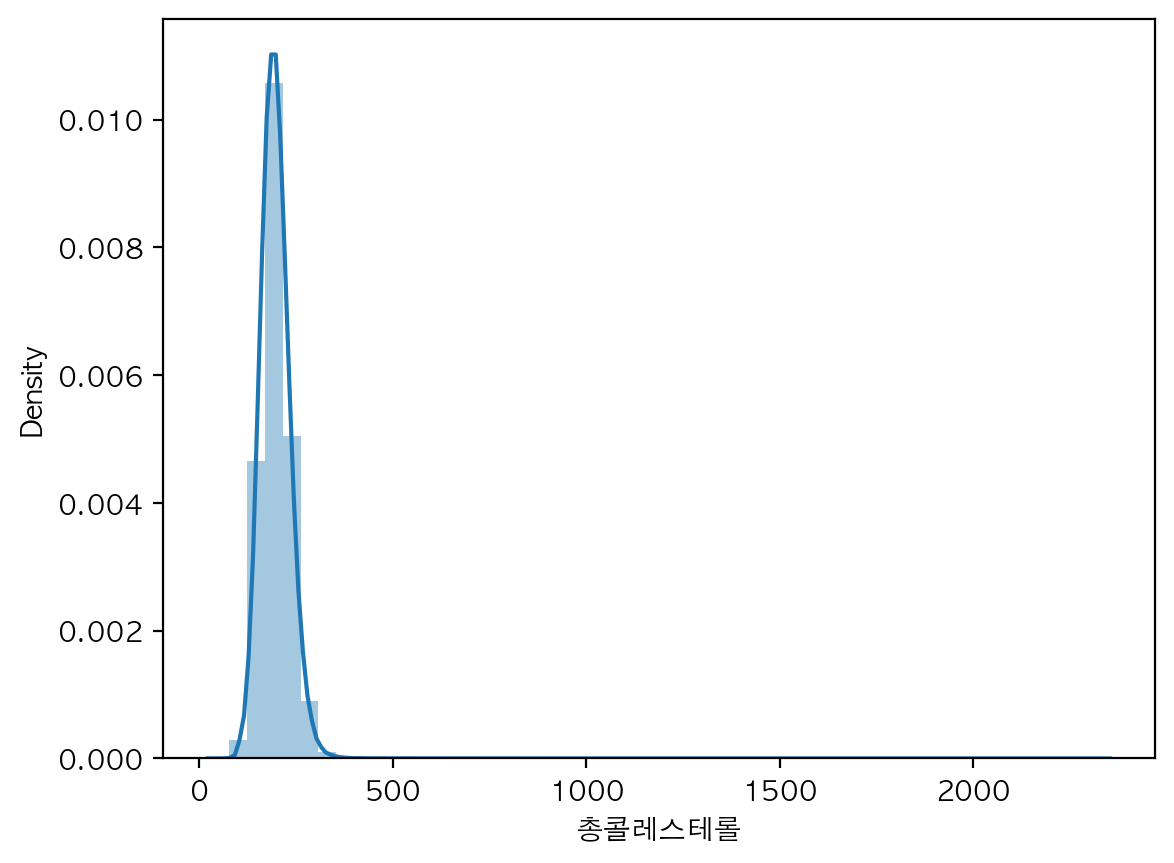

In [197]:
# 음주여부가 1인 값에 대해 '총콜레스테롤'을 displot으로 그리기
sns.distplot(df.loc[df['총콜레스테롤'].notnull() & (df['음주여부'] == 'Y'), '총콜레스테롤'])

/var/folders/9s/t04w6g091zlcvn1bbhf9dj040000gn/T/ipykernel_20583/20928621.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[df['총콜레스테롤'].notnull() & (df['음주여부'] == 'N'), '총콜레스테롤'])


<AxesSubplot: xlabel='총콜레스테롤', ylabel='Density'>

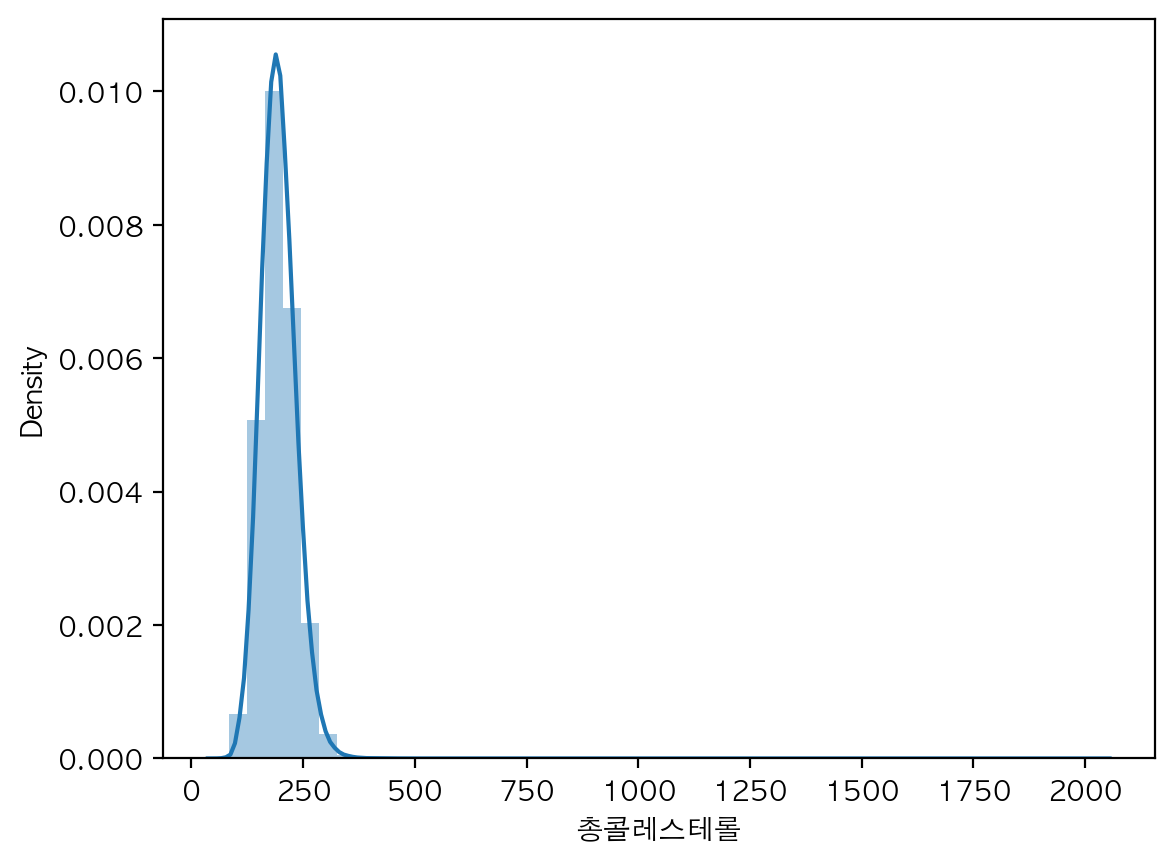

In [198]:
# 음주여부가 0인 값에 대해 '총콜레스테롤'을 displot으로 그리기
sns.distplot(df.loc[df['총콜레스테롤'].notnull() & (df['음주여부'] == 'N'), '총콜레스테롤'])

<AxesSubplot: xlabel='총콜레스테롤', ylabel='Density'>

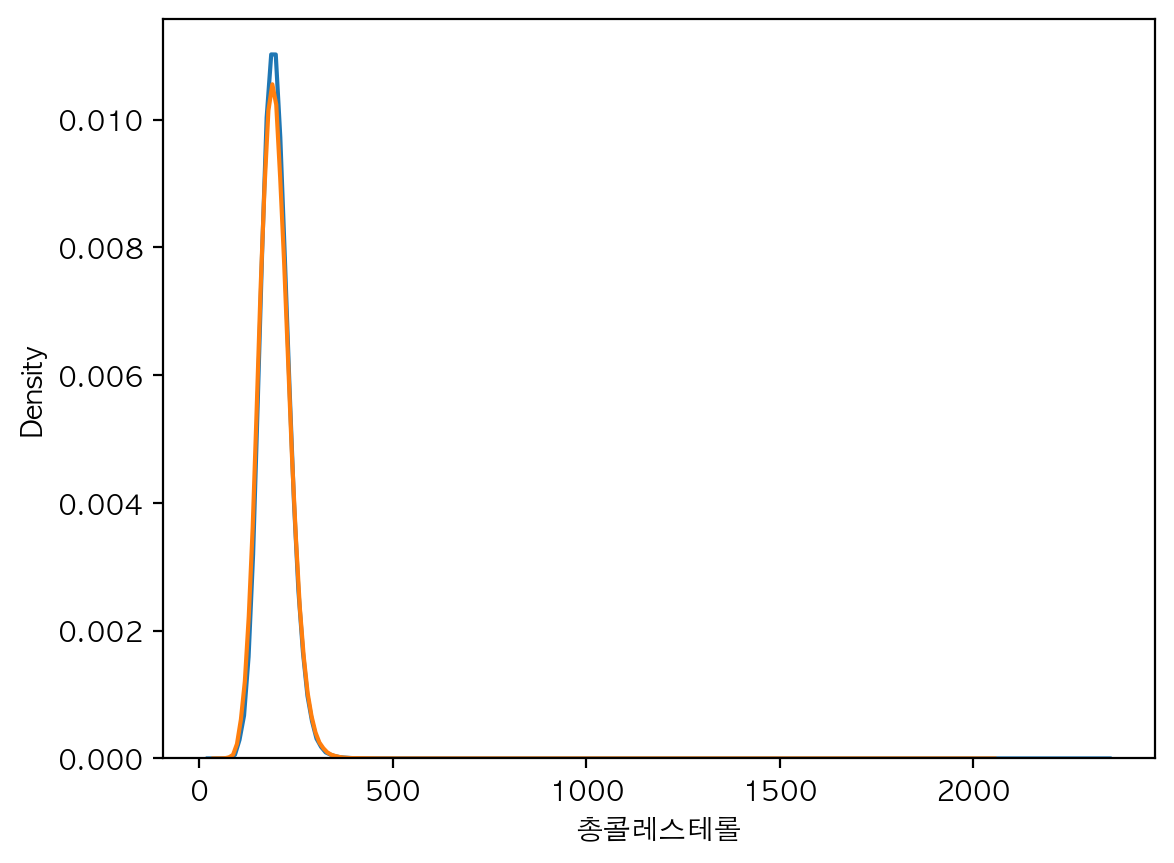

In [203]:
# 음주여부가 값에 대해 '총콜레스테롤'을 distplot으로 그리며, 하나의 그래프에 표시
sns.kdeplot(df.loc[df['총콜레스테롤'].notnull() & (df['음주여부'] == 'Y'), '총콜레스테롤'])
sns.kdeplot(df.loc[df['총콜레스테롤'].notnull() & (df['음주여부'] == 'N'), '총콜레스테롤'])

# 상관분석

## 상관계수 구하기

In [207]:
columns = ['연령대코드(5세단위)','체중(5Kg단위)','신장(5Cm단위)','허리둘레','시력(좌)','시력(우)','청력(좌)','청력(우)','수축기혈압','이완기혈압','식전혈당(공복혈당)','총콜레스테롤','트리글리세라이드','HDL콜레스테롤','LDL콜레스테롤','혈색소','요단백','혈청크레아티닌','(혈청지오티)ALT','(혈청지오티)AST','감마지티피','흡연상태','음주여부']
columns

['연령대코드(5세단위)',
 '체중(5Kg단위)',
 '신장(5Cm단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)ALT',
 '(혈청지오티)AST',
 '감마지티피',
 '흡연상태',
 '음주여부']

In [219]:
# 키에 대한 상관계수가 특정 수치 이상인 데이터를 확인
df_corr.loc[df_corr['신장(5Cm단위)'] > 0.3, '신장(5Cm단위)']

체중(5Kg단위)    0.665067
신장(5Cm단위)    1.000000
허리둘레         0.312230
혈색소          0.541155
흡연상태         0.512294
Name: 신장(5Cm단위), dtype: float64

In [230]:
# 혈색소에 대한 상관계수가 특정 수치 이상인 데이터를 보기
df_corr['혈색소'].sort_values(ascending=False).head(8)

혈색소           1.000000
신장(5Cm단위)     0.541155
체중(5Kg단위)     0.540191
흡연상태          0.434467
허리둘레          0.377673
(혈청지오티)ALT    0.331891
이완기혈압         0.255690
감마지티피         0.245109
Name: 혈색소, dtype: float64

## heatmap

<AxesSubplot: >

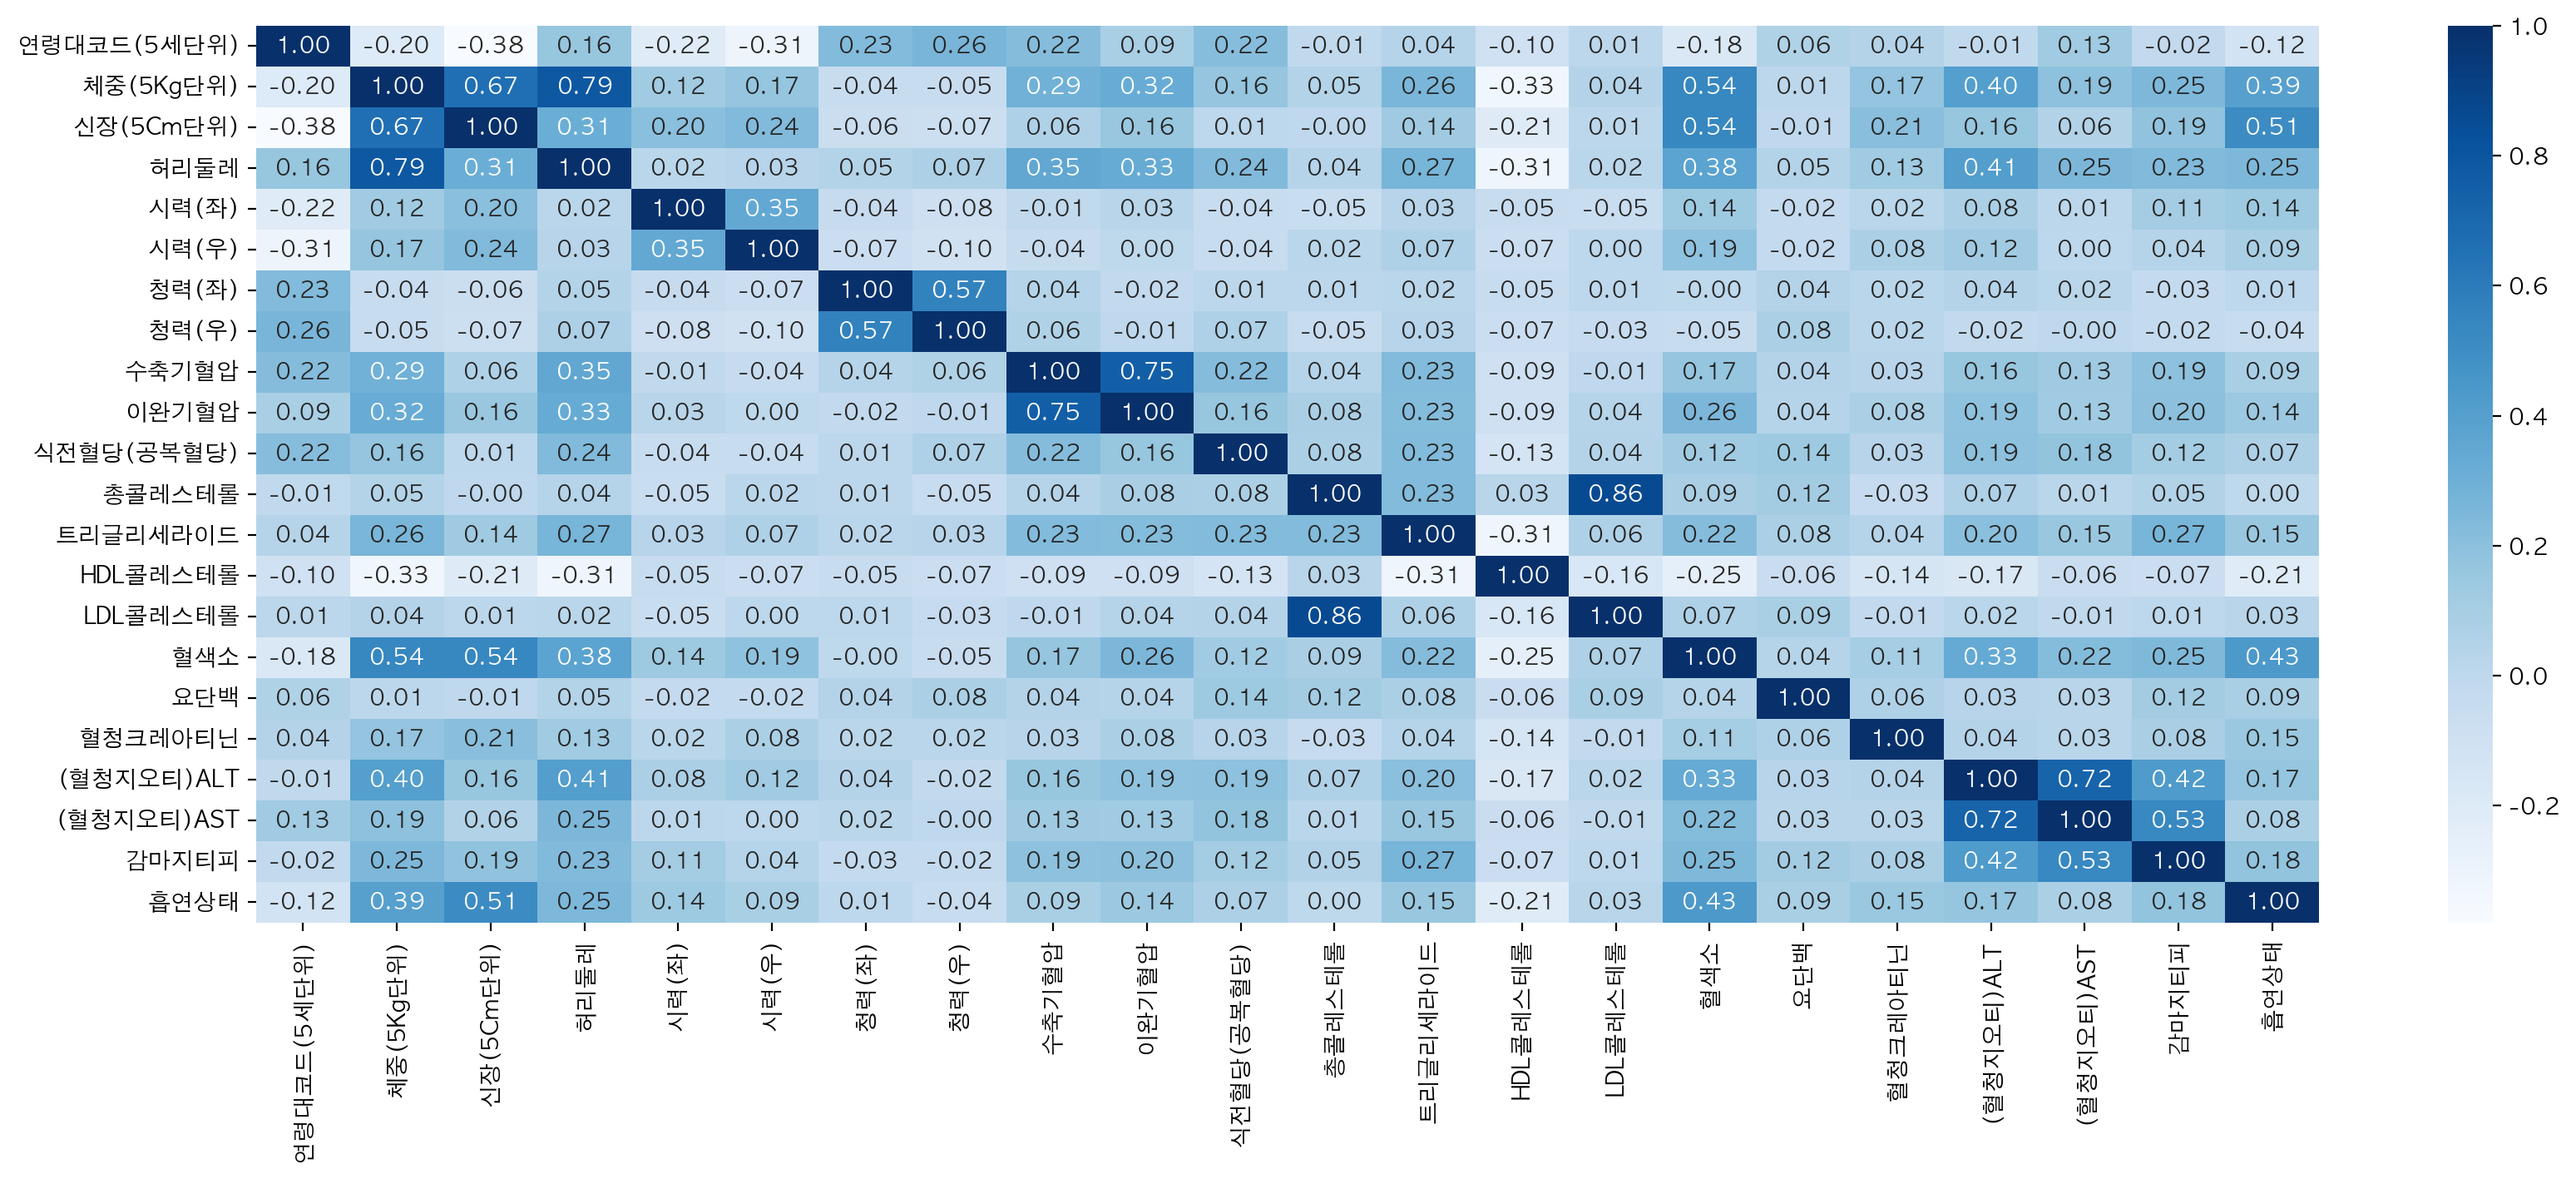

In [237]:
# 상관계수를 heatmap으로 표현
plt.figure(figsize=(20,7))
sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='Blues')

<AxesSubplot: >

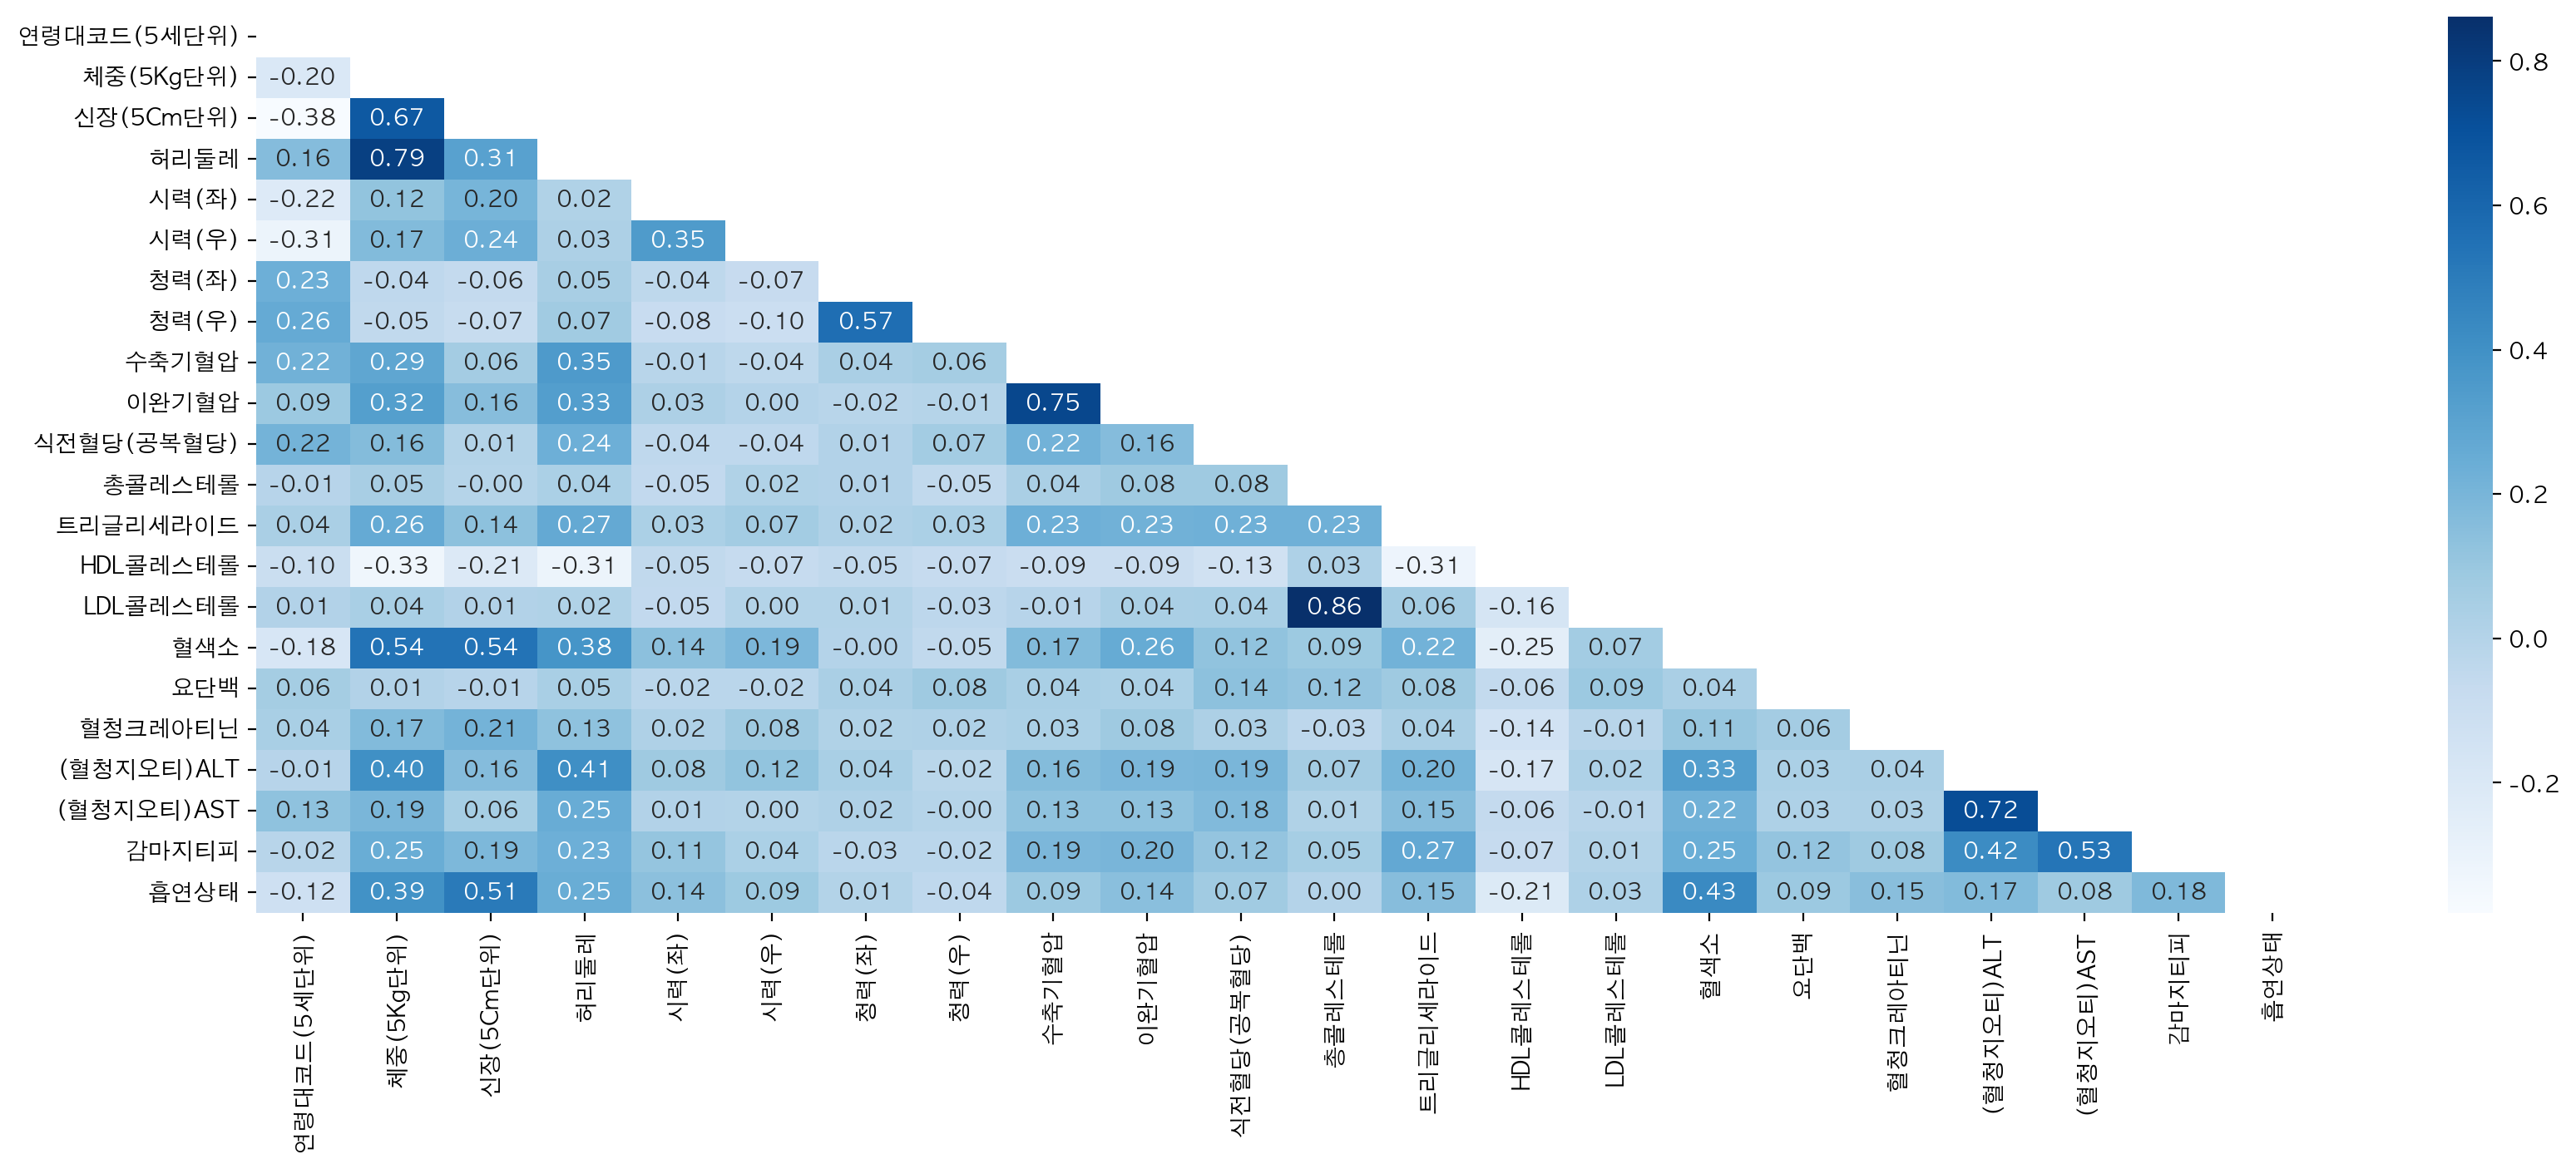

In [239]:
mask = np.triu(np.ones_like(df_corr, dtype=bool))

plt.figure(figsize=(20,7))
sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='Blues', mask=mask)